# CAPSTONE PROJECT - MARKET MIX MODELING

### Problem Statement :

The objective here is to develop a market mix model for ElecKart to observe the actual impact of different marketing variables over the last year and recommend the optimal budget allocation for different marketing levers for the next year.

We are required to create market mix models for three different product sub-categories  - 
        a)camera accessory
        b) home audio 
        c) gaming accessories  

We need to observe the actual impact of different marketing variables for the year (2015 -2016) and recommend the optimal budget allocation for the various marketing levers for the next year to ensure that the budget is utilized effectively.


In [628]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [629]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [630]:
#Reading the dataset
consumer = pd.read_csv('ConsumerElectronics.csv',low_memory=False)

In [631]:
#Basic operations on the dataset
consumer.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [632]:
consumer.sample(5)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
740223,AUDE6VG6HPHKG6UJ,2016-02-25 21:07:58,2016,2,2532695186745000.000,2532695186745000.000,276,1,\N,\N,COD,7,1.64953579153089E+018,-7.95263294394565E+018,CE,EntertainmentSmall,AudioMP3Player,AudioMP3Player,400,1
879116,ACCEY353VZ4WV4UW,2016-03-04 14:36:32,2016,3,1539375430292000.000,1539375430292000.000,279,1,\N,\N,COD,5,-3.46975262167931E+017,-1.15029185472344E+018,CE,GamingHardware,GamingAccessory,GamePad,349,3
542226,ACCE8XYJYYWGYHCU,2016-01-21 20:38:15,2016,1,3502439967664300.000,3502439967664300.000,999,1,\N,\N,Prepaid,2,-6.09147461975408E+018,-7.08612767642727E+017,CE,GamingHardware,GamingAccessory,GamePad,1799,0
840873,ACCEBP9MJHCS7G2F,2016-03-16 22:07:07,2016,3,3550010806036600.000,3550010806036600.000,3400,1,\N,\N,COD,2,9.01166901540961E+018,1.5186393088329E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,4599,3
1216137,REMEYSTWEGPSTX6W,2016-05-04 19:13:29,2016,5,2592246607878100.000,2592246607878100.000,199,1,5,6,COD,7,-3.58042070406291E+018,2.66220391671577E+018,CE,EntertainmentSmall,TVVideoSmall,RemoteControl,449,5


In [633]:
consumer.describe(percentiles = [0.05, 0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])

,Year,Month,order_id,order_item_id,units,sla,product_mrp,product_procurement_sla
count,1648824.000,1648824.000,1648824.000,1648824.000,1648824.000,1648824.000,1648824.000,1648824.000
mean,2015.519,6.586,2842444674146328.500,13756277530325384.000,1.022,5.688,4108.309,5.403
std,0.500,3.623,1269134332596894.250,55945981798631008.000,0.254,2.983,8510.918,53.466
min,2015.000,1.000,76331515.000,108016495.000,1.000,0.000,0.000,-1.000
5%,2015.000,1.000,177947031.450,224396284.850,1.000,2.000,340.000,0.000
10%,2015.000,2.000,1421201940325120.000,1425286976283410.000,1.000,2.000,449.000,1.000
30%,2015.000,4.000,2390874962339900.000,2396042477152200.000,1.000,4.000,950.000,2.000
50%,2016.000,6.000,2611824528743350.000,2619185472741150.000,1.000,6.000,1599.000,2.000
60%,2016.000,9.000,3430702998094960.000,3472885575693200.000,1.000,6.000,1999.000,3.000
70%,2016.000,10.000,3548644575975120.000,3592364174828510.000,1.000,7.000,2999.000,3.000


In [634]:
#Checking for nulls in the dataset
round(100*(consumer.isnull().sum()/len(consumer.index)),2)

fsn_id                            0.000
order_date                        0.000
Year                              0.000
Month                             0.000
order_id                          0.000
order_item_id                     0.000
gmv                               0.000
units                             0.000
deliverybdays                     0.000
deliverycdays                     0.000
s1_fact.order_payment_type        0.000
sla                               0.000
cust_id                           0.000
pincode                           0.000
product_analytic_super_category   0.000
product_analytic_category         0.000
product_analytic_sub_category     0.000
product_analytic_vertical         0.000
product_mrp                       0.000
product_procurement_sla           0.000
dtype: float64

In [635]:
consumer.dtypes

fsn_id                              object
order_date                          object
Year                                 int64
Month                                int64
order_id                           float64
order_item_id                      float64
gmv                                 object
units                                int64
deliverybdays                       object
deliverycdays                       object
s1_fact.order_payment_type          object
sla                                  int64
cust_id                             object
pincode                             object
product_analytic_super_category     object
product_analytic_category           object
product_analytic_sub_category       object
product_analytic_vertical           object
product_mrp                          int64
product_procurement_sla              int64
dtype: object

In [636]:
#checking for special characters in gmv column
import string
alphabet =  string.ascii_letters+string.punctuation
consumer.gmv.str.strip(alphabet).astype(bool).any()

True

In [637]:
#we have characters in the gmv column
consumer['gmv'] = consumer['gmv'].replace(' ','NA',regex=True)

In [638]:
consumer.loc[consumer['gmv'] == 'NA']

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
8,ACCCX3S5JGAJETYR,2015-10-16 00:49:14,2015,10,2417869738304300.000,2417869738304300.000,NA,1,\N,\N,Prepaid,9,,,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
95,ACCCX3SGAR6NNBMR,2015-10-05 13:25:48,2015,10,2408841604128700.000,2408841604128700.000,NA,1,\N,\N,Prepaid,3,,,CE,CameraAccessory,CameraAccessory,Lens,7150,5
124,ACCCX3SGDGPZAQXD,2015-10-16 01:49:30,2015,10,4417909463097400.000,4417909463097400.000,NA,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5
142,ACCCX3SGDGPZAQXD,2015-10-16 22:59:20,2015,10,4418716822733100.000,4418716822733100.000,NA,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5
186,ACCCX3SGDGPZAQXD,2015-10-16 07:30:25,2015,10,4418157854811200.000,4418157854811200.000,NA,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5
398,ACCCX3SGDGPZAQXD,2015-10-17 14:50:26,2015,10,2419285394414700.000,2419285394414700.000,NA,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5
473,ACCCX3SGEP6YD7SW,2015-10-16 17:37:25,2015,10,3418523584533100.000,3418523584533100.000,NA,1,\N,\N,Prepaid,8,,,CE,CameraAccessory,CameraAccessory,Lens,10490,1
494,ACCCX3SGFMC9ZMZC,2015-10-29 00:47:37,2015,10,3429149771606800.000,3429149771606800.000,NA,1,\N,\N,Prepaid,5,,,CE,CameraAccessory,CameraAccessory,Lens,38450,1
679,ACCCX3SU22JG8NJX,2015-10-04 15:41:06,2015,10,2408083412997600.000,2408083412997600.000,NA,2,\N,\N,Prepaid,11,,,CE,CameraAccessory,CameraAccessory,CameraBattery,1545,1
778,ACCCX3SU5VYKHSZG,2015-10-14 08:17:59,2015,10,2416458636677600.000,2416458636677600.000,NA,1,\N,\N,Prepaid,5,,,CE,CameraAccessory,CameraAccessory,CameraBattery,3810,13


In [639]:
consumer = consumer.loc[consumer['gmv'] != 'NA']

In [640]:
consumer['gmv'] = consumer['gmv'].astype(float)

In [641]:
#Dropping columns since they do not appear to be relevant as they contain more than 80% missing values
consumer.drop(['deliverybdays','deliverycdays'],axis=1,inplace=True)

In [642]:
from datetime import datetime as dt
#consumer['order_time'] = consumer['order_date'].dt.time()
consumer['order_date_time'] = pd.to_datetime(consumer['order_date'])
consumer['order_date'] = consumer['order_date_time'].dt.normalize()

In [643]:
consumer.dtypes

fsn_id                                     object
order_date                         datetime64[ns]
Year                                        int64
Month                                       int64
order_id                                  float64
order_item_id                             float64
gmv                                       float64
units                                       int64
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                    object
pincode                                    object
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                                 int64
product_procurement_sla                     int64
order_date_time                    datetime64[ns]
dtype: object

In [644]:
consumer.sample(5)


,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_time
1203714,GAMEAGMMZHD22KZ9,2016-05-29,2016,5,3613891340428100.000,3613891340428100.000,1783.000,1,COD,5,2.20065671327767E+017,1.18406566515747E+018,CE,GameCDDVD,Game,PhysicalGame,2499,1,2016-05-29 20:36:56
535807,ACCE7FHXX6YH9RZF,2016-01-07,2016,1,3489997687554700.000,3489997687554700.000,154.000,1,COD,6,1.32673155246415E+017,7.3969746007853E+018,CE,GamingHardware,GamingAccessory,GamePad,250,3,2016-01-07 11:06:07
612250,CAMDUGSSHXQ9FDHM,2016-01-20,2016,1,4501397429844700.000,4501397429844700.000,44980.000,2,COD,3,-9.12204387818889E+016,-7.59332381794251E+018,CE,Camera,Camera,DSLR,40000,2,2016-01-20 15:43:14
132908,ACCEFDTFVQMZ8CKN,2015-10-19,2015,10,1421062937065700.000,1421062937065700.000,1095.000,1,COD,7,4.01732390380194E+015,3.71221309469184E+018,CE,CameraAccessory,CameraAccessory,Binoculars,2000,1,2015-10-19 16:08:35
1188499,CAMDUGSSHXQ9FDHM,2016-05-25,2016,5,1610359563137100.000,1610359563137100.000,24490.000,1,COD,2,-2.49302810147741E+018,-7.59332381794251E+018,CE,Camera,Camera,DSLR,40000,2,2016-05-25 18:24:15


In [645]:
#Checking for unique values in the columns
consumer['s1_fact.order_payment_type'].unique()

array(['COD', 'Prepaid'], dtype=object)

In [646]:
consumer['s1_fact.order_payment_type'].describe()

count     1643920
unique          2
top           COD
freq      1191443
Name: s1_fact.order_payment_type, dtype: object

In [647]:
#id and pincode are dropped as it has no much significance
consumer.drop(['fsn_id','order_id','cust_id','pincode'],axis=1,inplace=True)

In [648]:
# Removing free items(items that have MRP as 0) from the dataset
consumer = consumer.loc[consumer['product_mrp'] != 0]

In [649]:
#Calculating and creating a new feature called 'LISTING PRICE' which is the result of GMV/Units
consumer['listing_price'] = consumer['gmv']/consumer['units']

In [650]:
#Calculating and creating a new feature called 'DISCOUNT' which is the result of MRP-Listing Price
consumer['discount'] = consumer['product_mrp'] - consumer['listing_price']

In [651]:
#Calculating Discount%
consumer['discount_percent'] = round(consumer['discount']*100/consumer['product_mrp'],2)

In [652]:
#Printing the head of the dataset with the newly added features
consumer.sample(5)

,order_date,Year,Month,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_time,listing_price,discount,discount_percent
1221226,2016-05-02,2016,5,4590151270191600.000,3399.000,1,COD,3,CE,EntertainmentSmall,TVVideoSmall,SelectorBox,3999,2,2016-05-02 09:05:50,3399.000,600.000,15.000
1446800,2015-09-25,2015,9,2400565341728600.000,360.000,1,COD,4,CE,GamingHardware,GamingAccessory,GamePad,399,0,2015-09-25 22:45:48,360.000,39.000,9.770
1617743,2015-09-11,2015,9,300037347714574016.000,380.000,1,COD,4,CE,EntertainmentSmall,AudioMP3Player,AudioMP3Player,399,3,2015-09-11 00:26:42,380.000,19.000,4.760
1620351,2015-09-03,2015,9,3381470357564810.000,475.000,1,COD,6,CE,EntertainmentSmall,AudioMP3Player,AudioMP3Player,999,1,2015-09-03 23:22:28,475.000,524.000,52.450
1623448,2015-09-10,2015,9,300037347714280000.000,899.000,1,COD,2,CE,GameCDDVD,Game,PhysicalGame,4299,5,2015-09-10 13:03:16,899.000,3400.000,79.090


In [653]:
#we cannot have negative discount offered
consumer = consumer.loc[consumer['discount'] > 0]

In [654]:
consumer['order_date'].min()

Timestamp('2015-05-19 00:00:00')

In [655]:
# As mentioned year shoould start from july 2015 
res = consumer.loc[(consumer['Year'] == 2015) & (consumer['Month'] < 7)].index

In [656]:
res

Int64Index([1358453, 1376093, 1385002, 1398258, 1402659, 1429828, 1436634], dtype='int64')

In [657]:
consumer.drop(res,inplace=True)

In [658]:
#Flagging the holidays and the paydays since the general trend observed is that sales and correspondingly
#revenue increases during Holidays and Paydays
dec = pd.date_range('2015-12-25','2016-01-03')
jul = pd.date_range('2015-07-18','2015-07-19')
aug = pd.date_range('2015-08-15','2015-08-17')
aug1 = pd.date_range('2015-08-28','2015-08-30')
oc = pd.date_range('2015-10-15','2015-10-17')
nov = pd.date_range('2015-11-07','2015-11-14')
jan = pd.date_range('2016-01-20','2016-01-22')
feb = pd.date_range('2016-02-01','2016-02-02')
feb1 = pd.date_range('2016-02-20','2016-02-21')
feb2 = pd.date_range('2016-02-14','2016-02-15')
mar = pd.date_range('2016-03-07','2016-03-09')
may = pd.date_range('2016-05-25','2016-05-27')

In [659]:
#flagging paydays 
a=pd.DataFrame(pd.date_range('2015-07-01', periods=15, freq='MS') + pd.DateOffset(days=14), columns=['PayDate'])
b=pd.DataFrame(pd.date_range('2015-07-01', periods=15, freq='MS') + pd.DateOffset(days=0), columns=['PayDate'])

In [660]:
#converting them to list for easier calculation
dec.tolist()
jul.tolist()
aug.tolist()
aug1.tolist()
oc.tolist()
nov.tolist()
jan.tolist()
feb.tolist()
feb1.tolist()
feb2.tolist()
mar.tolist()
may.tolist()
a = a['PayDate'].tolist()
b = b['PayDate'].tolist()

In [661]:
#function for flagging
def list_name(l):
    hol = []
    for j in l:
        for i in j:
            #print(i)
            hol.append(i)
    return(hol)

In [662]:
l = [dec,jul,aug,aug1,oc,nov,jan,feb,feb1,feb2,mar,may,a,b]
hol = list_name(l)

In [663]:
consumer['holiday'] = consumer['order_date'].isin(hol)

In [664]:
consumer.loc[consumer['holiday'] == True]

,order_date,Year,Month,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_time,listing_price,discount,discount_percent,holiday
0,2015-10-17,2015,10,3419300926147000.000,6400.000,1,COD,5,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,6400.000,790.000,10.990,True
4,2015-10-17,2015,10,4419525153426400.000,1618.000,1,Prepaid,6,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,1618.000,481.000,22.920,True
5,2015-10-17,2015,10,3419188825145600.000,3324.000,1,Prepaid,5,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-17 12:07:24,3324.000,720.000,17.800,True
6,2015-10-16,2015,10,3418428515041500.000,3695.000,1,Prepaid,6,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-16 14:59:57,3695.000,349.000,8.630,True
7,2015-10-15,2015,10,3417799002820700.000,3695.000,1,COD,5,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-15 23:41:39,3695.000,349.000,8.630,True
15,2015-10-15,2015,10,2417574862763100.000,6749.000,1,COD,5,CE,CameraAccessory,CameraAccessory,Lens,7150,0,2015-10-15 16:54:54,6749.000,401.000,5.610,True
16,2015-10-16,2015,10,3418344978897200.000,6075.000,1,Prepaid,4,CE,CameraAccessory,CameraAccessory,Lens,7150,0,2015-10-16 12:39:30,6075.000,1075.000,15.030,True
17,2015-10-16,2015,10,2418725455503400.000,6670.000,1,COD,9,CE,CameraAccessory,CameraAccessory,Lens,7150,0,2015-10-16 23:11:15,6670.000,480.000,6.710,True
18,2015-10-17,2015,10,3419395841926100.000,6749.000,1,COD,6,CE,CameraAccessory,CameraAccessory,Lens,7150,0,2015-10-17 17:48:29,6749.000,401.000,5.610,True
19,2015-10-15,2015,10,4417632063072200.000,6749.000,1,Prepaid,5,CE,CameraAccessory,CameraAccessory,Lens,7150,0,2015-10-15 21:32:44,6749.000,401.000,5.610,True


In [665]:
consumer['holiday'].dtypes

dtype('bool')

In [666]:
consumer.holiday = consumer.holiday.astype(int)

In [667]:
consumer.head(5)

,order_date,Year,Month,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_time,listing_price,discount,discount_percent,holiday
0,2015-10-17,2015,10,3419300926147000.000,6400.000,1,COD,5,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,6400.000,790.000,10.990,1
1,2015-10-19,2015,10,1420830839915200.000,6900.000,1,COD,7,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,6900.000,290.000,4.030,0
2,2015-10-20,2015,10,2421912925714800.000,1990.000,1,COD,10,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,1990.000,109.000,5.190,0
3,2015-10-14,2015,10,4416592101738400.000,1690.000,1,Prepaid,4,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,1690.000,409.000,19.490,0
4,2015-10-17,2015,10,4419525153426400.000,1618.000,1,Prepaid,6,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,1618.000,481.000,22.920,1


In [668]:
#converting to weeks
def week_num(x):
    if x.year == 2015:
        week_num = x.week -26
        return(week_num)
    elif x.year == 2016:
        if x.week < 53:
            week_num = x.week +26
            return(week_num)
        else:
            week_num = x.week-26
            return(week_num)


In [669]:
consumer['Week'] = consumer['order_date'].apply(week_num)

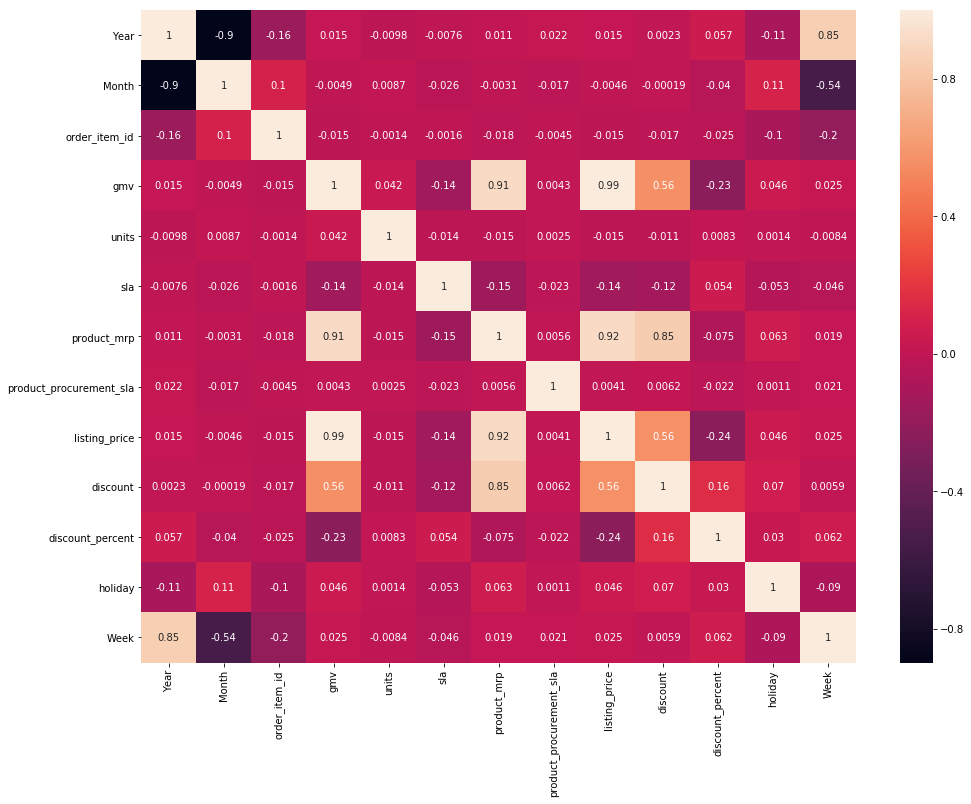

In [670]:
plt.figure(figsize=(16,12))
sns.heatmap(consumer.corr(), annot=True)

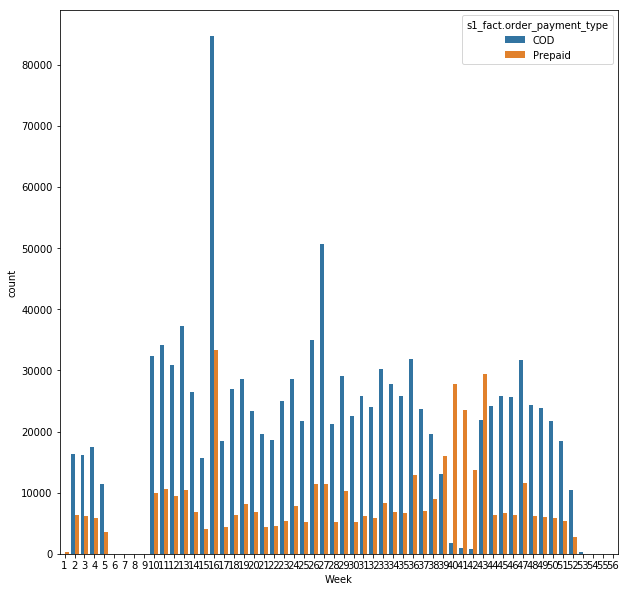

In [671]:
# cod and prepaid w.r.t to weeks
#week 6,7,8,9 have very less orders of COD and Prepaid and y-axis scale is huge
plt.figure(figsize=(10,10))
sns.countplot(x = "Week", hue = "s1_fact.order_payment_type", data = consumer)

In [672]:
consumer[(consumer['Week'] == 6)& (consumer['s1_fact.order_payment_type']== 'Prepaid')]

,order_date,Year,Month,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_time,listing_price,discount,discount_percent,holiday,Week
1362238,2015-08-04,2015,8,222075987.000,999.000,1,Prepaid,4,CE,EntertainmentSmall,Speaker,MobileSpeaker,4990,5,2015-08-04 20:34:12,999.000,3991.000,79.980,0,6
1362584,2015-08-04,2015,8,223281571.000,1820.000,1,Prepaid,7,CE,EntertainmentSmall,Speaker,MobileSpeaker,4999,4,2015-08-04 21:59:36,1820.000,3179.000,63.590,0,6
1374509,2015-08-06,2015,8,219730290.000,999.000,1,Prepaid,9,CE,GamingHardware,GamingAccessory,TVOutCableAccessory,1700,3,2015-08-06 00:46:14,999.000,701.000,41.240,0,6
1393285,2015-08-06,2015,8,221186318.000,949.000,1,Prepaid,1,CE,EntertainmentSmall,Speaker,LaptopSpeaker,1599,3,2015-08-06 16:03:15,949.000,650.000,40.650,0,6
1394474,2015-08-03,2015,8,223823196.000,2599.000,1,Prepaid,9,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,3099,2,2015-08-03 15:10:38,2599.000,500.000,16.130,0,6
1402792,2015-08-03,2015,8,213498072.000,199.000,1,Prepaid,8,CE,EntertainmentSmall,Speaker,LaptopSpeaker,999,3,2015-08-03 09:54:25,199.000,800.000,80.080,0,6
1434498,2015-08-03,2015,8,223230001.000,2499.000,1,Prepaid,2,CE,EntertainmentSmall,TVVideoSmall,SelectorBox,4999,3,2015-08-03 20:36:10,2499.000,2500.000,50.010,0,6
1511065,2015-08-08,2015,8,3388991061501800.000,1749.000,1,Prepaid,3,CE,EntertainmentSmall,AudioMP3Player,AudioMP3Player,1995,2,2015-08-08 18:55:26,1749.000,246.000,12.330,0,6
1515484,2015-08-08,2015,8,2389001428490000.000,475.000,1,Prepaid,7,CE,EntertainmentSmall,AudioMP3Player,AudioMP3Player,999,1,2015-08-08 18:55:26,475.000,524.000,52.450,0,6
1615892,2015-08-08,2015,8,3388991061501800.000,1749.000,1,Prepaid,3,CE,EntertainmentSmall,AudioMP3Player,AudioMP3Player,1995,2,2015-08-08 18:55:26,1749.000,246.000,12.330,0,6


In [673]:
consumer.columns

Index(['order_date', 'Year', 'Month', 'order_item_id', 'gmv', 'units',
       's1_fact.order_payment_type', 'sla', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'order_date_time', 'listing_price', 'discount', 'discount_percent',
       'holiday', 'Week'],
      dtype='object')

In [674]:
#KPI for price tag by Vertical using Units MRP and listing price with the help of Cluster Analysis
Cluster = pd.pivot_table(consumer,index=['product_analytic_vertical'],values=['units','product_mrp'],aggfunc=np.sum).reset_index()

### Clustering :

We use clusters to create the new feature called as 'Product Premiumness' which specifies whether the Product is a Premium, Aspiring or Mass product. We create clusters on the basis of Product MRP and the number of units sold and then based on the highest value of MRP in each cluster, we categorize it into the above mentioned 3 types.

In [675]:
#understanding product based on kmeans cluster
np.random.seed(0)
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
Y_Pred = kmean.fit_predict(Cluster[['units','product_mrp']])
Cluster['Cluster'] = Y_Pred
Cluster.head(5)

,product_analytic_vertical,product_mrp,units,Cluster
0,AmplifierReceiver,12328217,4030,1
1,AudioMP3Player,308277628,112772,0
2,Binoculars,45222700,14178,1
3,BoomBox,10903112,2788,1
4,Camcorders,18777893,834,1


In [676]:
Cluster.columns

Index(['product_analytic_vertical', 'product_mrp', 'units', 'Cluster'], dtype='object')

In [677]:
cluster_0 = Cluster.loc[Cluster['Cluster'] == 0]

In [678]:
a_0 = max(cluster_0['product_mrp'])

In [679]:
Cluster.loc[Cluster['Cluster'] == 1].head(5)

,product_analytic_vertical,product_mrp,units,Cluster
0,AmplifierReceiver,12328217,4030,1
2,Binoculars,45222700,14178,1
3,BoomBox,10903112,2788,1
4,Camcorders,18777893,834,1
5,CameraAccessory,2315713,1997,1


In [680]:
cluster_1 = Cluster.loc[Cluster['Cluster'] == 1]

In [681]:
b_1=max(cluster_1['product_mrp'])

In [682]:
Cluster.loc[Cluster['Cluster'] == 2]

,product_analytic_vertical,product_mrp,units,Cluster
21,DSLR,2235232941,56898,2


In [683]:
cluster_2 = Cluster.loc[Cluster['Cluster'] == 2]

In [684]:
c_2=max(cluster_2['product_mrp'])

In [685]:
d = [a_0,b_1,c_2]
#print(d)
dict_clus = {}
dict_clus[0] = a_0
dict_clus[1] = b_1
dict_clus[2] = c_2
d.sort(reverse = True)

In [686]:
for i in dict_clus.keys():
    if dict_clus[i] == d[0]:
        k = i
        print('Premiumk',k)
    elif dict_clus[i] == d[1]:
        #j = 'Aspiring'
        j = i
        print('Aspiringj',j)
        #print(j,i)
    else:
        #l = 'Mass'
        l = i
        print('Massl',l)

Aspiringj 0
Massl 1
Premiumk 2


In [687]:
Cluster['PriceTag'] = Cluster.apply(lambda x:"Mass" if x.Cluster==l else "Premium" if x.Cluster==k else 'Aspiring',axis=1)
Cluster_new = Cluster.drop(['units','product_mrp','Cluster'],axis=1)

In [688]:
Cluster_new.head(5)

,product_analytic_vertical,PriceTag
0,AmplifierReceiver,Mass
1,AudioMP3Player,Aspiring
2,Binoculars,Mass
3,BoomBox,Mass
4,Camcorders,Mass


In [689]:
consumer=pd.merge(consumer,Cluster_new, on='product_analytic_vertical',how='inner')

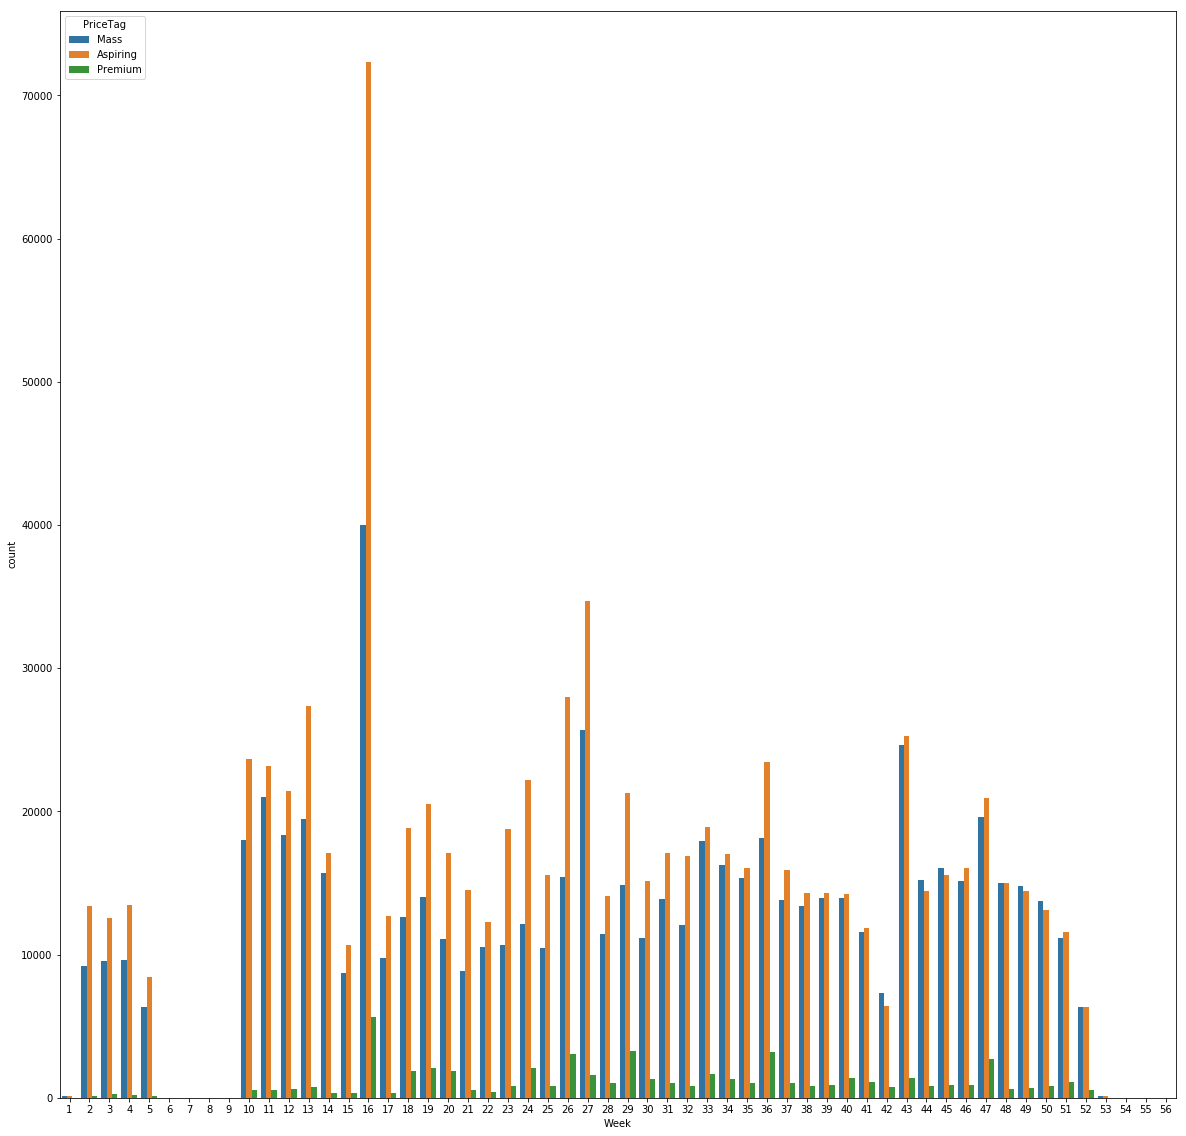

In [690]:
# PLotting a line graph to indicate product premiumness
plt.figure(figsize=(20,20))
sns.countplot(x = "Week", hue ="PriceTag", data = consumer)

### Importing and analyzing the Climate data set

In [691]:
Climate2015DF = pd.read_csv("ONTARIO-2015.csv")
Climate2015DF.head()


,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,†,0.000,NaN,-8.500,NaN,-4.300,...,0.000,NaN,0.000,NaN,0.000,NaN,nan,nan,nan,nan
1,2015-01-02,2015,1,2,†,3.000,NaN,-3.000,NaN,0.000,...,0.000,NaN,0.000,NaN,0.000,NaN,nan,nan,nan,nan
2,2015-01-03,2015,1,3,†,2.500,NaN,-4.000,NaN,-0.800,...,0.000,NaN,24.000,NaN,0.000,NaN,nan,nan,nan,nan
3,2015-01-04,2015,1,4,†,2.500,NaN,0.000,NaN,1.300,...,1.000,NaN,1.000,NaN,0.000,NaN,nan,nan,nan,nan
4,2015-01-05,2015,1,5,†,-10.000,NaN,-13.500,NaN,-11.800,...,3.000,NaN,3.000,NaN,1.000,NaN,nan,nan,nan,nan


In [692]:
Climate2015DF = Climate2015DF.drop(['Day', 'Data Quality', 'Max Temp Flag', 'Min Temp Flag', 
                                        'Mean Temp Flag', 'Heat Deg Days Flag', 'Cool Deg Days Flag', 
                                        'Total Rain Flag', 'Total Snow Flag', 'Total Precip Flag', 
                                        'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag', 
                                        'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag',], 
                                        axis = 1)
Climate2015DF.head()

,Date/Time,Year,Month,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2015-01-01,2015,1,0.000,-8.500,-4.300,22.300,0.000,0.000,0.000,0.000,0.000
1,2015-01-02,2015,1,3.000,-3.000,0.000,18.000,0.000,0.000,0.000,0.000,0.000
2,2015-01-03,2015,1,2.500,-4.000,-0.800,18.800,0.000,24.000,0.000,24.000,0.000
3,2015-01-04,2015,1,2.500,0.000,1.300,16.700,0.000,0.000,1.000,1.000,0.000
4,2015-01-05,2015,1,-10.000,-13.500,-11.800,29.800,0.000,0.000,3.000,3.000,1.000


In [693]:
Climate2015DF.dtypes

Date/Time              object
Year                    int64
Month                   int64
Max Temp (°C)         float64
Min Temp (°C)         float64
Mean Temp (°C)        float64
Heat Deg Days (°C)    float64
Cool Deg Days (°C)    float64
Total Rain (mm)       float64
Total Snow (cm)       float64
Total Precip (mm)     float64
Snow on Grnd (cm)     float64
dtype: object

In [694]:
Climate2015DF.columns

Index(['Date/Time', 'Year', 'Month', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')

In [695]:
Climate2015DF['Date/Time'] = pd.to_datetime(Climate2015DF['Date/Time'])
Climate2015DF['order_date'] = Climate2015DF['Date/Time'].dt.normalize()

In [696]:
Climate2015DF.shape

(365, 13)

In [697]:
#as we have nan values we are filling it with previous day's data to ensure more accurate results
Climate2015DF.fillna(method='ffill',inplace=True)

In [698]:
Climate2015DF.head()

,Date/Time,Year,Month,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),order_date
0,2015-01-01,2015,1,0.000,-8.500,-4.300,22.300,0.000,0.000,0.000,0.000,0.000,2015-01-01
1,2015-01-02,2015,1,3.000,-3.000,0.000,18.000,0.000,0.000,0.000,0.000,0.000,2015-01-02
2,2015-01-03,2015,1,2.500,-4.000,-0.800,18.800,0.000,24.000,0.000,24.000,0.000,2015-01-03
3,2015-01-04,2015,1,2.500,0.000,1.300,16.700,0.000,0.000,1.000,1.000,0.000,2015-01-04
4,2015-01-05,2015,1,-10.000,-13.500,-11.800,29.800,0.000,0.000,3.000,3.000,1.000,2015-01-05


In [699]:
Climate2016DF = pd.read_csv("ONTARIO-2016.csv")
Climate2016DF.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2016-01-01,2016,1,1,NaN,7.000,NaN,-14.000,NaN,-3.500,...,0.000,NaN,9.000,NaN,0.000,NaN,nan,nan,nan,nan
1,2016-01-02,2016,1,2,NaN,7.000,NaN,-14.000,NaN,-3.500,...,0.000,NaN,9.000,NaN,0.000,NaN,nan,nan,nan,nan
2,2016-01-03,2016,1,3,NaN,7.000,NaN,-14.000,NaN,-3.500,...,0.000,NaN,9.000,NaN,0.000,NaN,nan,nan,nan,nan
3,2016-01-04,2016,1,4,NaN,7.000,NaN,-14.000,NaN,-3.500,...,0.000,NaN,9.000,NaN,0.000,NaN,nan,nan,nan,nan
4,2016-01-05,2016,1,5,NaN,7.000,NaN,-14.000,NaN,-3.500,...,0.000,NaN,9.000,NaN,0.000,NaN,nan,nan,nan,nan


In [700]:
Climate2016DF = Climate2016DF.drop(['Day', 'Data Quality', 'Max Temp Flag', 'Min Temp Flag', 
                                        'Mean Temp Flag', 'Heat Deg Days Flag', 'Cool Deg Days Flag', 
                                        'Total Rain Flag', 'Total Snow Flag', 'Total Precip Flag', 
                                        'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag', 
                                        'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'], axis = 1)
Climate2016DF.head()

,Date/Time,Year,Month,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2016-01-01,2016,1,7.000,-14.000,-3.500,21.500,0.000,9.000,0.000,9.000,0.000
1,2016-01-02,2016,1,7.000,-14.000,-3.500,21.500,0.000,9.000,0.000,9.000,0.000
2,2016-01-03,2016,1,7.000,-14.000,-3.500,21.500,0.000,9.000,0.000,9.000,0.000
3,2016-01-04,2016,1,7.000,-14.000,-3.500,21.500,0.000,9.000,0.000,9.000,0.000
4,2016-01-05,2016,1,7.000,-14.000,-3.500,21.500,0.000,9.000,0.000,9.000,0.000


In [701]:
Climate2016DF.shape

(366, 12)

In [702]:
Climate2016DF['Date/Time'] = pd.to_datetime(Climate2016DF['Date/Time'])
Climate2016DF['order_date'] = Climate2016DF['Date/Time'].dt.normalize()

In [703]:
#many missing values are seen hence filling them with the previous day values
Climate2016DF.fillna(method='ffill',inplace=True)

In [704]:
Climate2015DF = Climate2015DF[Climate2015DF['Month'] >= 7]
Climate2015DF.head()

,Date/Time,Year,Month,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),order_date
181,2015-07-01,2015,7,24.500,17.000,20.800,0.000,2.800,0.000,0.000,0.000,0.000,2015-07-01
182,2015-07-02,2015,7,24.000,14.000,19.000,0.000,1.000,0.000,0.000,0.000,0.000,2015-07-02
183,2015-07-03,2015,7,25.000,10.000,17.500,0.500,0.000,0.000,0.000,0.000,0.000,2015-07-03
184,2015-07-04,2015,7,26.000,11.000,18.500,0.000,0.500,0.000,0.000,0.000,0.000,2015-07-04
185,2015-07-05,2015,7,28.000,14.000,21.000,0.000,3.000,0.000,0.000,0.000,0.000,2015-07-05


In [705]:
Climate2016DF = Climate2016DF[Climate2016DF['Month'] <= 6]
Climate2016DF.head()

,Date/Time,Year,Month,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),order_date
0,2016-01-01,2016,1,7.000,-14.000,-3.500,21.500,0.000,9.000,0.000,9.000,0.000,2016-01-01
1,2016-01-02,2016,1,7.000,-14.000,-3.500,21.500,0.000,9.000,0.000,9.000,0.000,2016-01-02
2,2016-01-03,2016,1,7.000,-14.000,-3.500,21.500,0.000,9.000,0.000,9.000,0.000,2016-01-03
3,2016-01-04,2016,1,7.000,-14.000,-3.500,21.500,0.000,9.000,0.000,9.000,0.000,2016-01-04
4,2016-01-05,2016,1,7.000,-14.000,-3.500,21.500,0.000,9.000,0.000,9.000,0.000,2016-01-05


In [706]:
ClimateDF = pd.concat([Climate2015DF, Climate2016DF],ignore_index=True)
ClimateDF.head()

,Date/Time,Year,Month,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),order_date
0,2015-07-01,2015,7,24.500,17.000,20.800,0.000,2.800,0.000,0.000,0.000,0.000,2015-07-01
1,2015-07-02,2015,7,24.000,14.000,19.000,0.000,1.000,0.000,0.000,0.000,0.000,2015-07-02
2,2015-07-03,2015,7,25.000,10.000,17.500,0.500,0.000,0.000,0.000,0.000,0.000,2015-07-03
3,2015-07-04,2015,7,26.000,11.000,18.500,0.000,0.500,0.000,0.000,0.000,0.000,2015-07-04
4,2015-07-05,2015,7,28.000,14.000,21.000,0.000,3.000,0.000,0.000,0.000,0.000,2015-07-05


In [707]:
### NPS SCORE 
NPSScoreDF = pd.read_csv("Monthly NPS Score.csv")
NPSScoreDF

,Year,Month,NPS,Stock Index
0,2015,7,54.600,1177
1,2015,8,60.000,1206
2,2015,9,46.900,1101
3,2015,10,44.400,1210
4,2015,11,47.000,1233
5,2015,12,45.800,1038
6,2016,1,47.100,1052
7,2016,2,50.300,1222
8,2016,3,49.000,1015
9,2016,4,51.800,1242


In [708]:
DF1 = pd.merge(ClimateDF, NPSScoreDF, on = 'Month')
DF1.head()

,Date/Time,Year_x,Month,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),order_date,Year_y,NPS,Stock Index
0,2015-07-01,2015,7,24.500,17.000,20.800,0.000,2.800,0.000,0.000,0.000,0.000,2015-07-01,2015,54.600,1177
1,2015-07-02,2015,7,24.000,14.000,19.000,0.000,1.000,0.000,0.000,0.000,0.000,2015-07-02,2015,54.600,1177
2,2015-07-03,2015,7,25.000,10.000,17.500,0.500,0.000,0.000,0.000,0.000,0.000,2015-07-03,2015,54.600,1177
3,2015-07-04,2015,7,26.000,11.000,18.500,0.000,0.500,0.000,0.000,0.000,0.000,2015-07-04,2015,54.600,1177
4,2015-07-05,2015,7,28.000,14.000,21.000,0.000,3.000,0.000,0.000,0.000,0.000,2015-07-05,2015,54.600,1177


In [709]:
FinalDF = pd.merge(consumer, DF1, on = 'order_date')
FinalDF.head(5)

,order_date,Year,Month_x,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_analytic_super_category,product_analytic_category,...,Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Year_y,NPS,Stock Index
0,2015-10-17,2015,10,3419300926147000.000,6400.000,1,COD,5,CE,CameraAccessory,...,9.800,8.200,0.000,0.000,0.000,0.000,0.000,2015,44.400,1210
1,2015-10-17,2015,10,4419525153426400.000,1618.000,1,Prepaid,6,CE,CameraAccessory,...,9.800,8.200,0.000,0.000,0.000,0.000,0.000,2015,44.400,1210
2,2015-10-17,2015,10,3419188825145600.000,3324.000,1,Prepaid,5,CE,CameraAccessory,...,9.800,8.200,0.000,0.000,0.000,0.000,0.000,2015,44.400,1210
3,2015-10-17,2015,10,4419119804807100.000,1097.000,1,COD,6,CE,CameraAccessory,...,9.800,8.200,0.000,0.000,0.000,0.000,0.000,2015,44.400,1210
4,2015-10-17,2015,10,4419300996247500.000,2890.000,2,COD,5,CE,CameraAccessory,...,9.800,8.200,0.000,0.000,0.000,0.000,0.000,2015,44.400,1210


In [710]:
FinalDF.shape

(1578956, 36)

In [711]:
FinalDF.columns

Index(['order_date', 'Year', 'Month_x', 'order_item_id', 'gmv', 'units',
       's1_fact.order_payment_type', 'sla', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'order_date_time', 'listing_price', 'discount', 'discount_percent',
       'holiday', 'Week', 'PriceTag', 'Date/Time', 'Year_x', 'Month_y',
       'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'Year_y',
       'NPS', 'Stock Index'],
      dtype='object')

In [712]:
FinalDF.drop(['Year_x','Year_y','Month_y','Date/Time'],axis=1,inplace=True)

In [713]:
# Filtering by sub categories since we only need results fro the camera,gaming and audio sub categories
SubCategry_dist = consumer.pivot_table(index = 'product_analytic_sub_category',values = 'units',aggfunc = 'count')

In [714]:
SubCategry_dist = SubCategry_dist.reset_index()
SubCategry_dist

,product_analytic_sub_category,units
0,AmplifierReceiver,4004
1,AudioAccessory,10267
2,AudioMP3Player,111042
3,Camera,99397
4,CameraAccessory,228931
5,CameraStorage,17664
6,Game,90797
7,GameMembershipCards,97
8,GamingAccessory,195514
9,GamingConsole,27568


In [715]:
FinalDF.columns

Index(['order_date', 'Year', 'Month_x', 'order_item_id', 'gmv', 'units',
       's1_fact.order_payment_type', 'sla', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'order_date_time', 'listing_price', 'discount', 'discount_percent',
       'holiday', 'Week', 'PriceTag', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'NPS', 'Stock Index'],
      dtype='object')

In [716]:
FinalDF.rename(columns={'Month_x':'Month'}, inplace=True)


In [717]:
consumer_camera = FinalDF.loc[FinalDF['product_analytic_sub_category'] == 'CameraAccessory']

In [718]:
consumer_camera.shape

(228846, 32)

In [719]:
consumer_camera.columns

Index(['order_date', 'Year', 'Month', 'order_item_id', 'gmv', 'units',
       's1_fact.order_payment_type', 'sla', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'order_date_time', 'listing_price', 'discount', 'discount_percent',
       'holiday', 'Week', 'PriceTag', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'NPS', 'Stock Index'],
      dtype='object')

In [720]:
consumer_audio = FinalDF.loc[FinalDF['product_analytic_sub_category'] == 'HomeAudio']

In [721]:
consumer_audio.shape

(118097, 32)

In [722]:
consumer_gaming = FinalDF.loc[FinalDF['product_analytic_sub_category'] == 'GamingAccessory']

In [723]:
consumer_gaming.shape

(195442, 32)

### Importing and Analyzing Media Investment Data

In [724]:
MediaInvDF = pd.read_csv("Media Investment.csv")

In [725]:
MediaInvDF.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.100,0.200,2.500,7.400,0.000,1.300,0.500,5.000,nan,nan
1,2015,8,5.100,0.000,1.300,1.100,0.000,0.100,0.100,2.500,nan,nan
2,2015,9,96.300,3.900,1.400,62.800,0.600,16.400,5.000,6.200,nan,nan
3,2015,10,170.200,6.100,12.600,84.700,3.400,24.400,7.000,31.900,nan,nan
4,2015,11,51.200,4.200,1.300,14.200,0.200,19.600,6.600,5.200,nan,nan


In [726]:
MediaInvDF = MediaInvDF.rename(columns = {" Affiliates":"Affiliates"})

In [727]:
# Converting units from crores to normal values

MediaInvDF['Total Investment'] = MediaInvDF['Total Investment']*100
MediaInvDF['TV'] = MediaInvDF['TV']*100
MediaInvDF['Digital'] = MediaInvDF['Digital']*100
MediaInvDF['Sponsorship'] = MediaInvDF['Sponsorship']*100
MediaInvDF['Content Marketing'] = MediaInvDF['Content Marketing']*100
MediaInvDF['Online marketing'] = MediaInvDF['Online marketing']*100
MediaInvDF['Affiliates'] = MediaInvDF['Affiliates']*100
MediaInvDF['SEM'] = MediaInvDF['SEM']*100
MediaInvDF['Radio'] = MediaInvDF['Radio']*100
MediaInvDF['Other'] = MediaInvDF['Other']*100

In [728]:
MediaInvDF.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,1710.000,20.000,250.000,740.000,0.000,130.000,50.000,500.000,nan,nan
1,2015,8,510.000,0.000,130.000,110.000,0.000,10.000,10.000,250.000,nan,nan
2,2015,9,9630.000,390.000,140.000,6280.000,60.000,1640.000,500.000,620.000,nan,nan
3,2015,10,17020.000,610.000,1260.000,8470.000,340.000,2440.000,700.000,3190.000,nan,nan
4,2015,11,5120.000,420.000,130.000,1420.000,20.000,1960.000,660.000,520.000,nan,nan


In [729]:
#Merging media investment DF with camera Dataframe
consumer_camera1 = pd.merge(consumer_camera,MediaInvDF, on = 'Month')
consumer_camera1.head()
consumer_camera1 .rename(columns={'Year_x':'Year'}, inplace=True)

In [730]:
#Merging media investment DF with Gaming Dataframe
consumer_gaming1 = pd.merge(consumer_gaming,MediaInvDF, on = 'Month')
consumer_gaming1.head()
consumer_gaming1 .rename(columns={'Year_x':'Year'}, inplace=True)

In [731]:
#Merging media investment DF with Audio Dataframe
consumer_audio1 = pd.merge(consumer_audio,MediaInvDF, on = 'Month')
consumer_audio1.head()
consumer_audio1 .rename(columns={'Year_x':'Year'}, inplace=True)

In [732]:
consumer_audio1.columns

Index(['order_date', 'Year', 'Month', 'order_item_id', 'gmv', 'units',
       's1_fact.order_payment_type', 'sla', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'order_date_time', 'listing_price', 'discount', 'discount_percent',
       'holiday', 'Week', 'PriceTag', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'NPS', 'Stock Index', 'Year_y', 'Total Investment',
       'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other'],
      dtype='object')

In [733]:
consumer_gaming1.drop(['order_item_id','Year_y','product_analytic_super_category'],axis=1,inplace=True)
consumer_camera1.drop(['order_item_id','Year_y','product_analytic_super_category'],axis=1,inplace=True)
consumer_audio1.drop(['order_item_id','Year_y','product_analytic_super_category'],axis=1,inplace=True)

<Figure size 720x720 with 0 Axes>

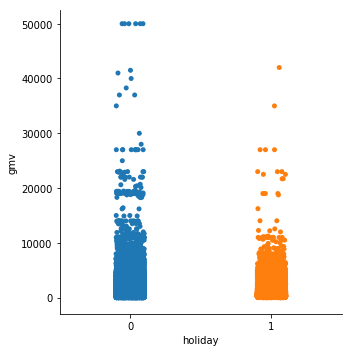

In [734]:
#Graph which shows how holiday and workday affect gmv for gaming
plt.figure(figsize=(10,10))
sns.catplot(x="holiday", y="gmv", data=consumer_gaming1)

<Figure size 720x720 with 0 Axes>

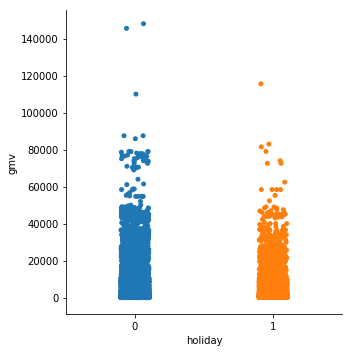

In [735]:
# Graph which shows how holiday and workday affect gmv for camera
plt.figure(figsize=(10,10))
sns.catplot(x="holiday", y="gmv", data=consumer_camera1)

<Figure size 720x720 with 0 Axes>

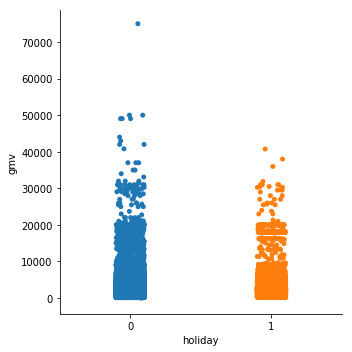

In [736]:
#Graph which shows how holiday and workday affect gmv for audio
plt.figure(figsize=(10,10))
sns.catplot(x="holiday", y="gmv", data=consumer_audio1)

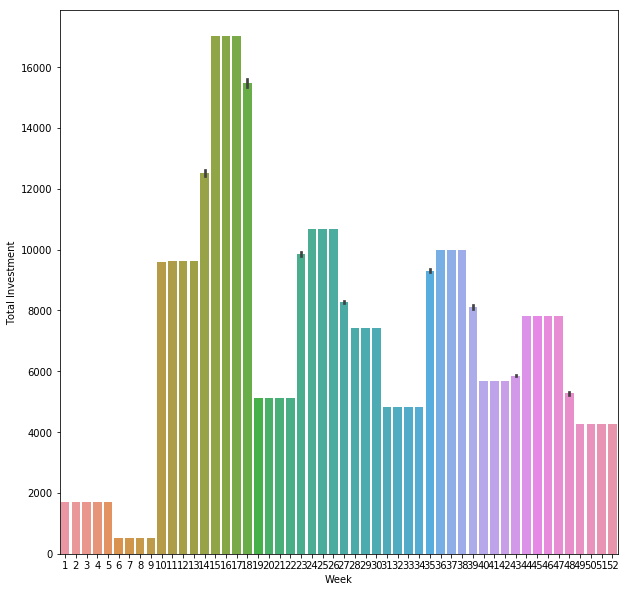

In [737]:
#analyzing total investment on weekly basis for gaming 
plt.figure(figsize=(10,10))
sns.barplot(x="Week", y="Total Investment", data=consumer_gaming1)

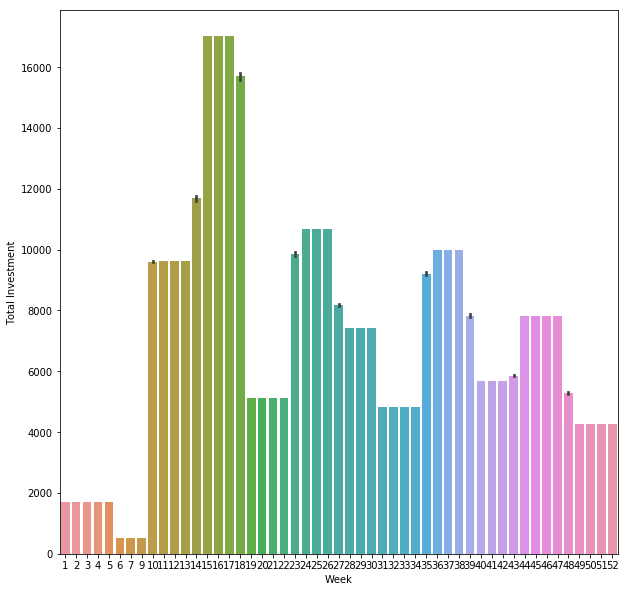

In [738]:
#analyzing total investment on weekly basis for camera
plt.figure(figsize=(10,10))
sns.barplot(x="Week", y="Total Investment", data=consumer_camera1)

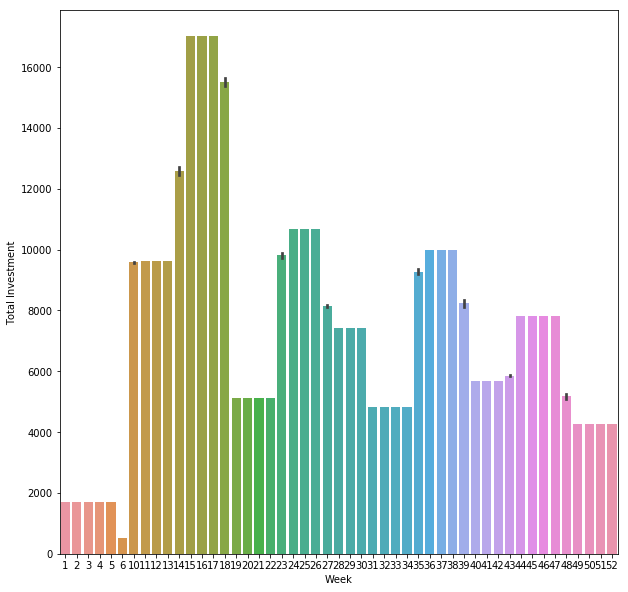

In [739]:
#analyzing total investment on weekly basis for audio
plt.figure(figsize=(10,10))
sns.barplot(x="Week", y="Total Investment", data=consumer_audio1)

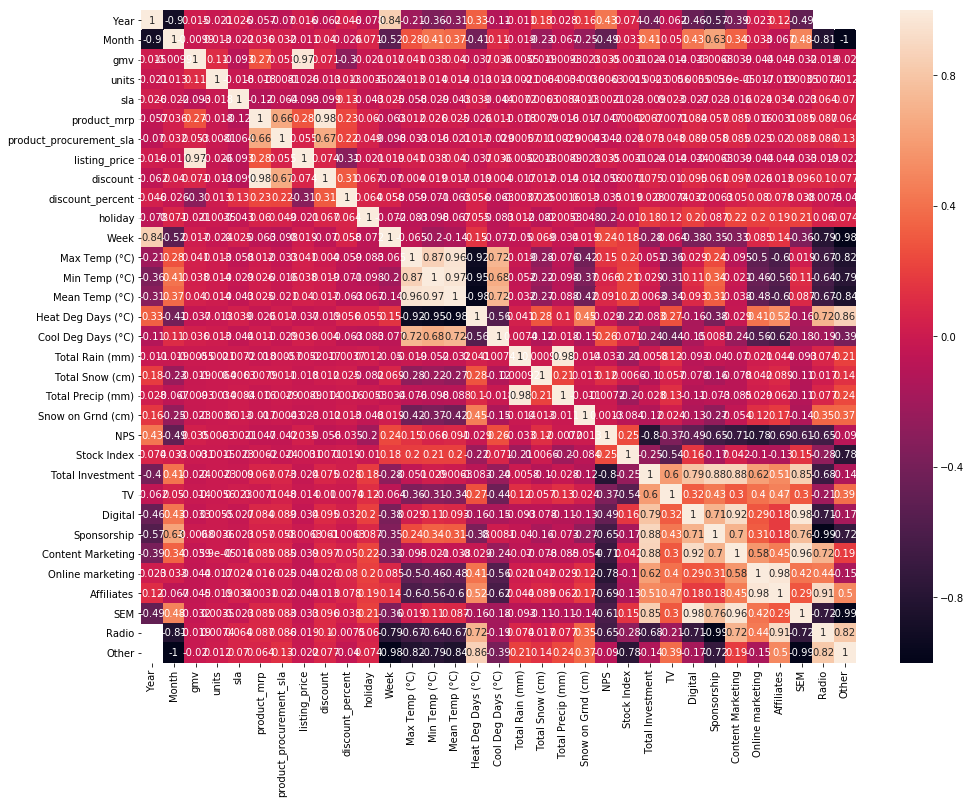

In [740]:
#Heatmap shows the correlation for gaming
plt.figure(figsize=(16,12))
sns.heatmap(consumer_gaming1.corr(), annot=True)

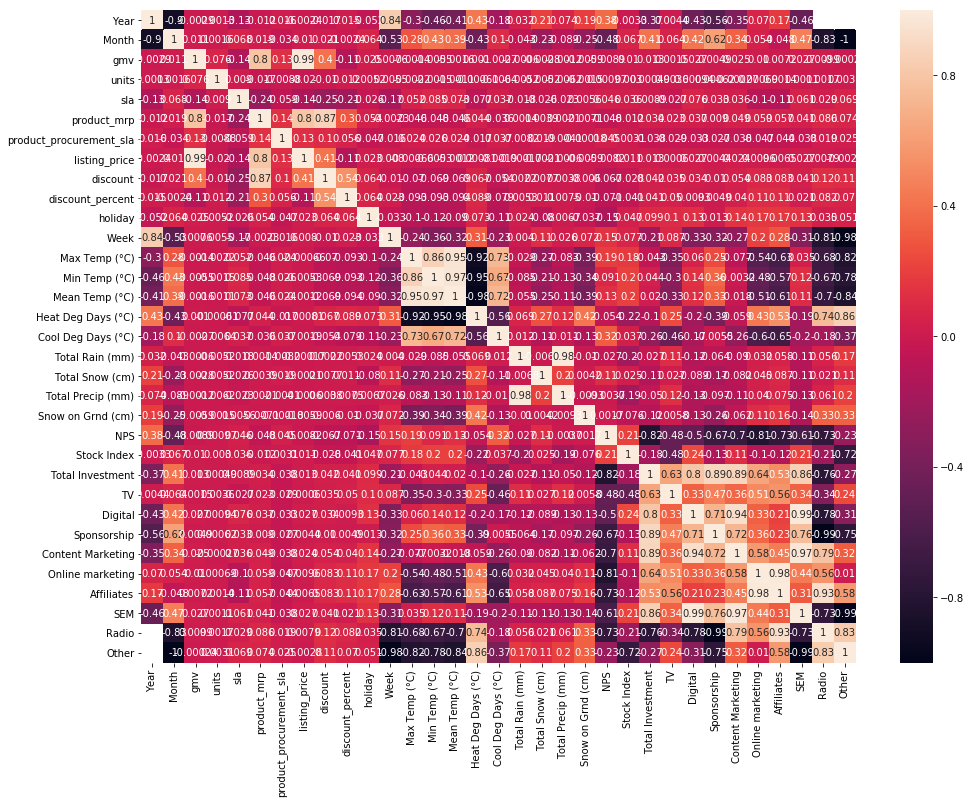

In [741]:
#Heatmap shows the correlation for audio
plt.figure(figsize=(16,12))
sns.heatmap(consumer_audio1.corr(), annot=True)

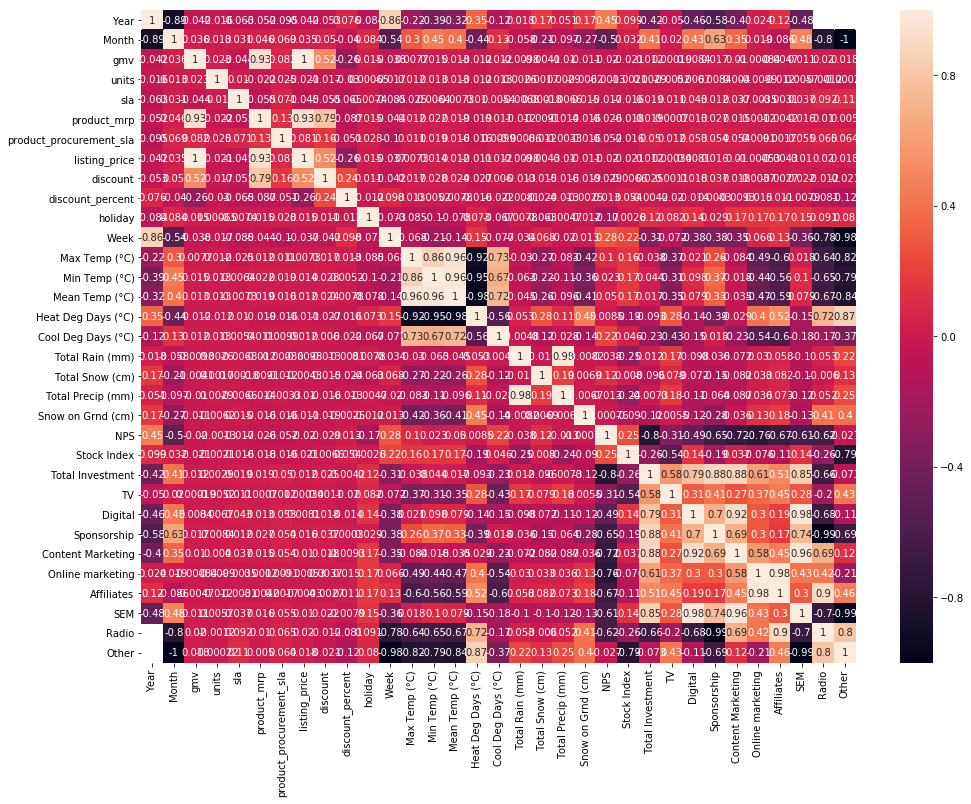

In [742]:
#Heatmap shows the correlation for camera
plt.figure(figsize=(16,12))
sns.heatmap(consumer_camera1.corr(), annot=True)

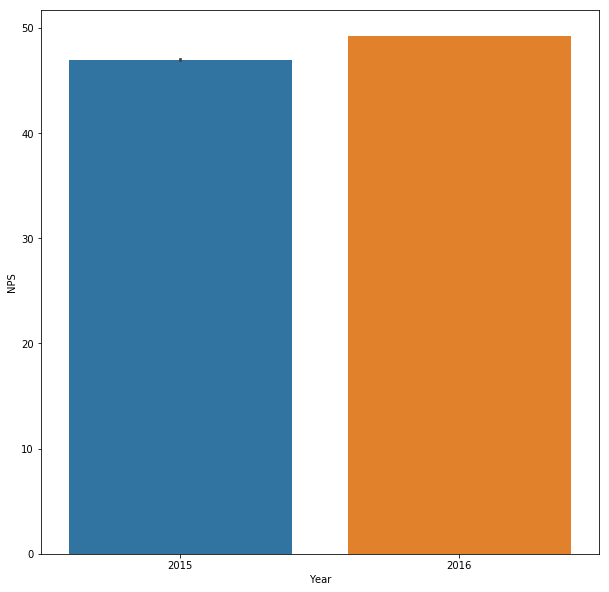

In [743]:
#for both the years NPS variation for gaming
plt.figure(figsize=(10,10))
sns.barplot(x="Year", y="NPS", data=consumer_gaming1)

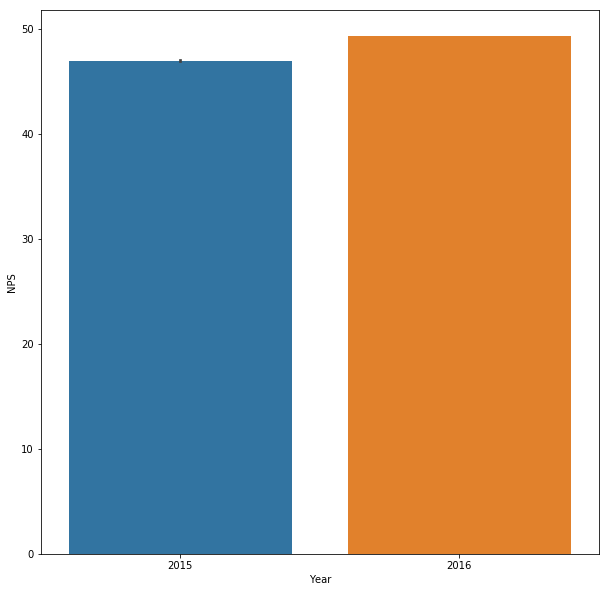

In [744]:
#for both the years NPS variation for camera
plt.figure(figsize=(10,10))
sns.barplot(x="Year", y="NPS", data=consumer_camera1)

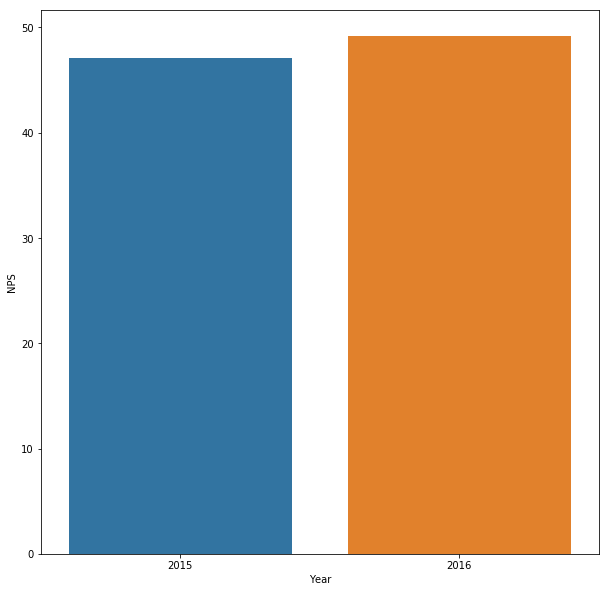

In [745]:
#for both the years NPS variation for audio
plt.figure(figsize=(10,10))
sns.barplot(x="Year", y="NPS", data=consumer_audio1)

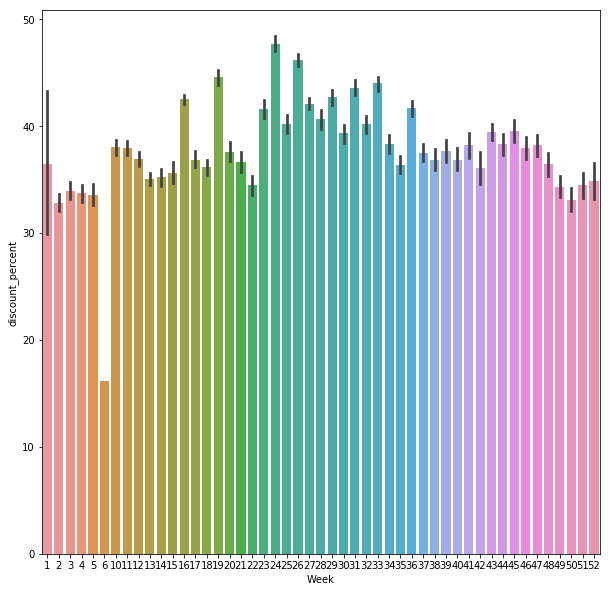

In [746]:
#weekly basis % of discount offered for audio
plt.figure(figsize=(10,10))
sns.barplot(x="Week", y="discount_percent", data=consumer_audio1)

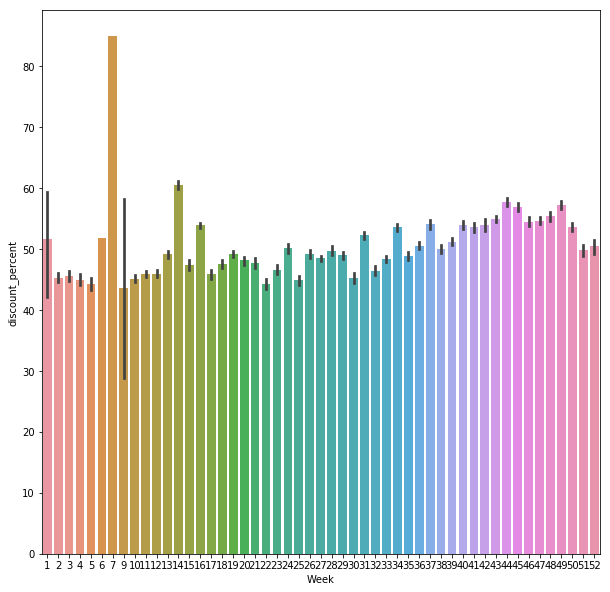

In [747]:
#weekly basis % of discount offered for camera
plt.figure(figsize=(10,10))
sns.barplot(x="Week", y="discount_percent", data=consumer_camera1)

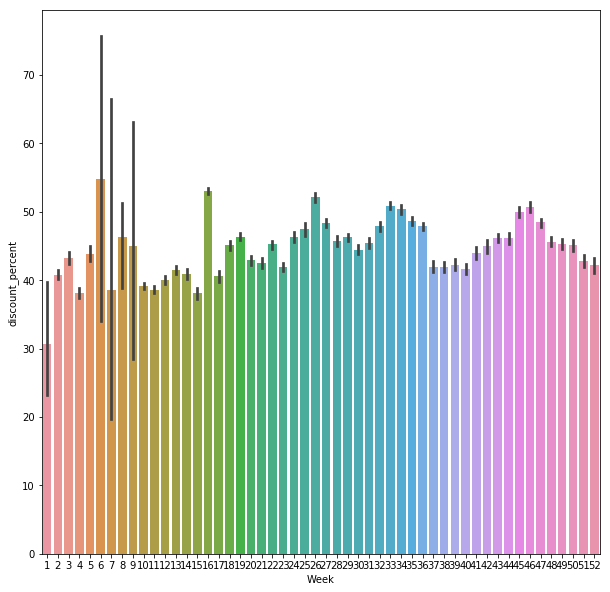

In [748]:
#weekly basis % of discount offered for gaming
plt.figure(figsize=(10,10))
sns.barplot(x="Week", y="discount_percent", data=consumer_gaming1)

<Figure size 720x720 with 0 Axes>

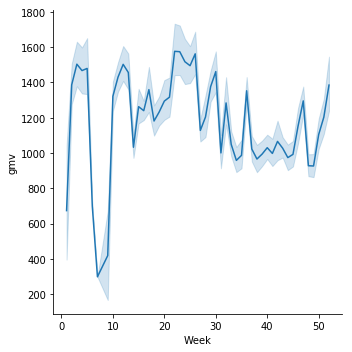

In [749]:
#weekly basis gmv variation
plt.figure(figsize=(10,10))
sns.relplot(x="Week", y="gmv",kind='line', data=consumer_camera1)

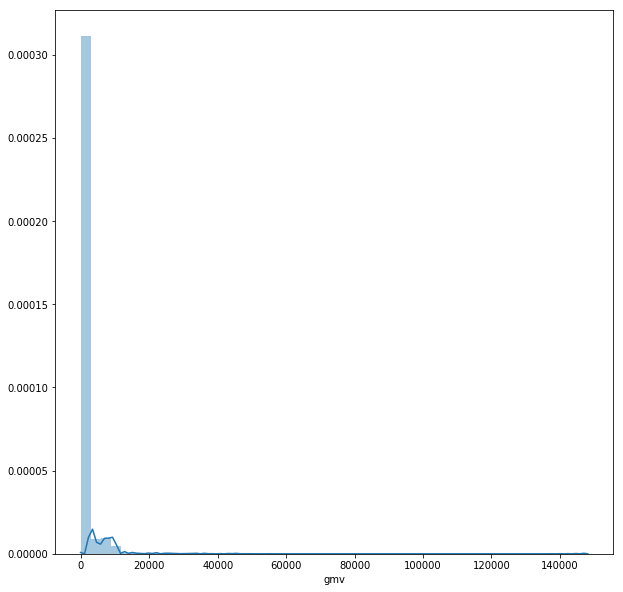

In [750]:
#Target variable in camera accessory
#A Density Plot visualises the distribution of data over a continuous interval or time period.
plt.figure(figsize=(10,10))
sns.distplot(consumer_camera1['gmv'])

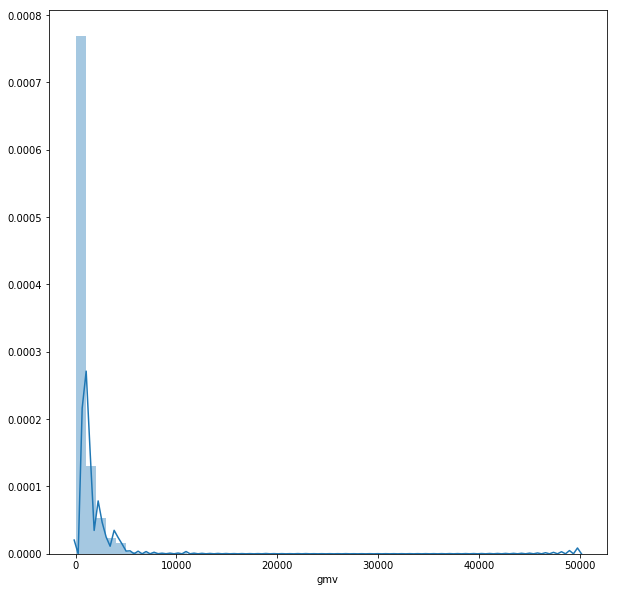

In [751]:
#Target variable for gaming
plt.figure(figsize=(10,10))
sns.distplot(consumer_gaming1['gmv'])

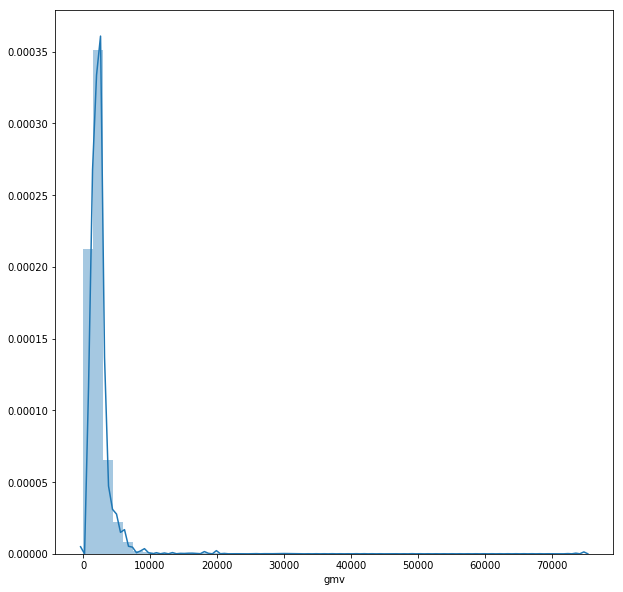

In [752]:
#Target variable for audio
plt.figure(figsize=(10,10))
sns.distplot(consumer_audio1['gmv'])

In [753]:
consumer_audio1.columns

Index(['order_date', 'Year', 'Month', 'gmv', 'units',
       's1_fact.order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla', 'order_date_time',
       'listing_price', 'discount', 'discount_percent', 'holiday', 'Week',
       'PriceTag', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'NPS',
       'Stock Index', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio',
       'Other'],
      dtype='object')

## Feature Engineering

### Calculating the Moving average and lag

### Camera

In [754]:
#moving avg
consumer_camera1['moving_avg_2'] = consumer_camera1['units'].rolling(window=2).mean()
consumer_camera1['moving_avg_3'] = consumer_camera1['units'].rolling(window=3).mean()

In [755]:
# lag for nps score,holidays
nps_lag = pd.concat([consumer_camera1['NPS'].shift(-1),consumer_camera1['NPS'].shift(-2)],axis=1)
nps_lag.columns = ['nps_lag1','nps_lag2']

holiday_lag = pd.concat([consumer_camera1['holiday'].shift(-1),consumer_camera1['holiday'].shift(-2)],axis=1)
holiday_lag.columns = ['holiday_lag1','holiday_lag2']

consumer_camera1 = pd.concat ([consumer_camera1.reset_index(drop=True),nps_lag],axis=1)
consumer_camera1 = pd.concat ([consumer_camera1.reset_index(drop=True),holiday_lag],axis=1)

In [756]:
consumer_camera1.columns

Index(['order_date', 'Year', 'Month', 'gmv', 'units',
       's1_fact.order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla', 'order_date_time',
       'listing_price', 'discount', 'discount_percent', 'holiday', 'Week',
       'PriceTag', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'NPS',
       'Stock Index', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio',
       'Other', 'moving_avg_2', 'moving_avg_3', 'nps_lag1', 'nps_lag2',
       'holiday_lag1', 'holiday_lag2'],
      dtype='object')

### Audio

In [757]:
#moving avg
consumer_audio1['moving_avg_2'] = consumer_audio1['units'].rolling(window=2).mean()
consumer_audio1['moving_avg_3'] = consumer_audio1['units'].rolling(window=3).mean()

In [758]:
# lag for nps score,holidays
nps_lag = pd.concat([consumer_audio1['NPS'].shift(-1),consumer_audio1['NPS'].shift(-2)],axis=1)
nps_lag.columns = ['nps_lag1','nps_lag2']

holiday_lag = pd.concat([consumer_audio1['holiday'].shift(-1),consumer_audio1['holiday'].shift(-2)],axis=1)
holiday_lag.columns = ['holiday_lag1','holiday_lag2']

consumer_audio1 = pd.concat ([consumer_audio1.reset_index(drop=True),nps_lag],axis=1)
consumer_audio1 = pd.concat ([consumer_audio1.reset_index(drop=True),holiday_lag],axis=1)

###  Gaming

In [759]:
#moving avg
consumer_gaming1['moving_avg_2'] = consumer_gaming1['units'].rolling(window=2).mean()
consumer_gaming1['moving_avg_3'] = consumer_gaming1['units'].rolling(window=3).mean()

In [760]:
# lag for nps score,holidays
nps_lag = pd.concat([consumer_gaming1['NPS'].shift(-1),consumer_gaming1['NPS'].shift(-2)],axis=1)
nps_lag.columns = ['nps_lag1','nps_lag2']

holiday_lag = pd.concat([consumer_gaming1['holiday'].shift(-1),consumer_gaming1['holiday'].shift(-2)],axis=1)
holiday_lag.columns = ['holiday_lag1','holiday_lag2']

consumer_gaming1 = pd.concat ([consumer_gaming1.reset_index(drop=True),nps_lag],axis=1)
consumer_gaming1 = pd.concat ([consumer_gaming1.reset_index(drop=True),holiday_lag],axis=1)

In [761]:
consumer_camera1.sample(5)

,order_date,Year,Month,gmv,units,s1_fact.order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,...,Affiliates,SEM,Radio,Other,moving_avg_2,moving_avg_3,nps_lag1,nps_lag2,holiday_lag1,holiday_lag2
137554,2016-04-27,2016,4,199.000,1,Prepaid,7,CameraAccessory,CameraAccessory,CameraBattery,...,570.000,420.000,nan,nan,1.000,1.000,51.800,51.800,0.000,0.000
52359,2015-09-04,2015,9,849.000,1,COD,5,CameraAccessory,CameraAccessory,Binoculars,...,500.000,620.000,nan,nan,1.000,1.000,46.900,46.900,0.000,0.000
22981,2015-10-02,2015,10,670.000,1,Prepaid,10,CameraAccessory,CameraAccessory,CameraBattery,...,700.000,3190.000,nan,nan,1.000,1.000,44.400,44.400,0.000,0.000
114914,2016-03-17,2016,3,179.000,1,Prepaid,5,CameraAccessory,CameraAccessory,CameraBatteryCharger,...,620.000,520.000,90.000,1590.000,1.000,1.000,49.000,49.000,0.000,0.000
148191,2016-04-08,2016,4,210.000,1,Prepaid,5,CameraAccessory,CameraAccessory,Flash,...,570.000,420.000,nan,nan,1.000,1.000,51.800,51.800,0.000,0.000


In [762]:
consumer_camera1.columns

Index(['order_date', 'Year', 'Month', 'gmv', 'units',
       's1_fact.order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla', 'order_date_time',
       'listing_price', 'discount', 'discount_percent', 'holiday', 'Week',
       'PriceTag', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)', 'NPS',
       'Stock Index', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio',
       'Other', 'moving_avg_2', 'moving_avg_3', 'nps_lag1', 'nps_lag2',
       'holiday_lag1', 'holiday_lag2'],
      dtype='object')

In [763]:
consumer_camera1['product_analytic_vertical'].unique()

array(['CameraTripod', 'Lens', 'CameraBag', 'Flash', 'CameraBattery',
       'CameraBatteryCharger', 'CameraRemoteControl', 'Binoculars',
       'Filter', 'Strap', 'CameraBatteryGrip', 'CameraAccessory',
       'CameraFilmRolls', 'CameraMount', 'ExtensionTube', 'Telescope',
       'CameraMicrophone', 'Softbox', 'CameraEyeCup', 'FlashShoeAdapter',
       'ReflectorUmbrella', 'Teleconverter', 'CameraHousing'],
      dtype=object)

In [764]:
consumer_gaming1.sample(5)

,order_date,Year,Month,gmv,units,s1_fact.order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,...,Affiliates,SEM,Radio,Other,moving_avg_2,moving_avg_3,nps_lag1,nps_lag2,holiday_lag1,holiday_lag2
36220,2016-02-07,2016,2,275.000,1,COD,3,GamingHardware,GamingAccessory,GamePad,...,650.000,490.000,nan,nan,1.000,1.000,50.300,50.300,0.000,0.000
306,2015-10-17,2015,10,250.000,1,Prepaid,6,GamingHardware,GamingAccessory,GamePad,...,700.000,3190.000,nan,nan,1.000,1.000,44.400,44.400,1.000,1.000
103330,2016-03-05,2016,3,309.000,1,Prepaid,5,GamingHardware,GamingAccessory,GamePad,...,620.000,520.000,90.000,1590.000,1.000,1.000,49.000,49.000,0.000,0.000
63506,2016-01-20,2016,1,439.000,1,Prepaid,6,GamingHardware,GamingAccessory,GamingHeadset,...,740.000,420.000,270.000,2710.000,1.000,1.000,47.100,47.100,1.000,1.000
175705,2016-06-13,2016,6,300.000,1,COD,8,GamingHardware,GamingAccessory,GamingHeadset,...,280.000,370.000,nan,nan,1.000,1.000,50.500,50.500,0.000,0.000


In [765]:
consumer_audio1.sample(5)

,order_date,Year,Month,gmv,units,s1_fact.order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,...,Affiliates,SEM,Radio,Other,moving_avg_2,moving_avg_3,nps_lag1,nps_lag2,holiday_lag1,holiday_lag2
57127,2015-11-08,2015,11,568.000,1,Prepaid,9,EntertainmentSmall,HomeAudio,FMRadio,...,660.000,520.000,nan,nan,1.000,1.000,47.000,47.000,1.000,1.000
47193,2016-01-17,2016,1,499.000,1,COD,6,EntertainmentSmall,HomeAudio,Dock,...,740.000,420.000,270.000,2710.000,1.000,1.000,47.100,47.100,0.000,0.000
42820,2015-09-14,2015,9,899.000,1,COD,2,EntertainmentSmall,HomeAudio,BoomBox,...,500.000,620.000,nan,nan,1.000,1.000,46.900,46.900,0.000,0.000
57255,2015-11-02,2015,11,1545.000,1,Prepaid,12,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,660.000,520.000,nan,nan,1.000,1.000,47.000,47.000,0.000,0.000
85454,2015-12-19,2015,12,1499.000,1,COD,10,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,...,680.000,1120.000,nan,nan,1.000,1.000,45.800,45.800,0.000,0.000


In [766]:
#Creating Dummies
consumer_camera1_dummies=consumer_camera1[['product_analytic_category','product_analytic_sub_category','product_analytic_vertical','s1_fact.order_payment_type','PriceTag']]
consumer_gaming1_dummies=consumer_gaming1[['product_analytic_category','product_analytic_sub_category','product_analytic_vertical','s1_fact.order_payment_type','PriceTag']]
consumer_audio1_dummies=consumer_audio1[['product_analytic_category','product_analytic_sub_category','product_analytic_vertical','s1_fact.order_payment_type','PriceTag']]

In [767]:
consumer_gaming1_dummies.head(5)

,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,s1_fact.order_payment_type,PriceTag
0,GamingHardware,GamingAccessory,GamePad,Prepaid,Mass
1,GamingHardware,GamingAccessory,GamePad,COD,Mass
2,GamingHardware,GamingAccessory,GamePad,COD,Mass
3,GamingHardware,GamingAccessory,GamePad,COD,Mass
4,GamingHardware,GamingAccessory,GamePad,COD,Mass


In [768]:
consumer_camera1_dummies.head()

,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,s1_fact.order_payment_type,PriceTag
0,CameraAccessory,CameraAccessory,CameraTripod,COD,Mass
1,CameraAccessory,CameraAccessory,CameraTripod,Prepaid,Mass
2,CameraAccessory,CameraAccessory,CameraTripod,Prepaid,Mass
3,CameraAccessory,CameraAccessory,CameraTripod,COD,Mass
4,CameraAccessory,CameraAccessory,CameraTripod,COD,Mass


In [769]:
# Dropping the first column

consumer_camera1_dummies = pd.get_dummies(consumer_camera1_dummies,drop_first = True,columns=['product_analytic_category','product_analytic_sub_category','product_analytic_vertical','s1_fact.order_payment_type','PriceTag'])
consumer_camera1_dummies.head()

,product_analytic_vertical_CameraAccessory,product_analytic_vertical_CameraBag,product_analytic_vertical_CameraBattery,product_analytic_vertical_CameraBatteryCharger,product_analytic_vertical_CameraBatteryGrip,product_analytic_vertical_CameraEyeCup,product_analytic_vertical_CameraFilmRolls,product_analytic_vertical_CameraHousing,product_analytic_vertical_CameraMicrophone,product_analytic_vertical_CameraMount,...,product_analytic_vertical_Filter,product_analytic_vertical_Flash,product_analytic_vertical_FlashShoeAdapter,product_analytic_vertical_Lens,product_analytic_vertical_ReflectorUmbrella,product_analytic_vertical_Softbox,product_analytic_vertical_Strap,product_analytic_vertical_Teleconverter,product_analytic_vertical_Telescope,s1_fact.order_payment_type_Prepaid
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [770]:
# Append the results to the main dataframe
ConsumerCamera = pd.concat([consumer_camera1,consumer_camera1_dummies], axis = 1)

In [771]:
#Drop the cols
ConsumerCamera=ConsumerCamera.drop(['order_date_time','order_date','product_analytic_category','product_analytic_sub_category','product_analytic_vertical','s1_fact.order_payment_type','PriceTag'],axis=1)

In [772]:
ConsumerCamera.shape

(228846, 62)

In [773]:
# Repeating the above steps for the Gaming dataframe
consumer_gaming1_dummies = pd.get_dummies(consumer_gaming1_dummies,drop_first = True,columns=['product_analytic_category','product_analytic_sub_category','product_analytic_vertical','s1_fact.order_payment_type','PriceTag'])
consumer_gaming1_dummies.head()

,product_analytic_vertical_GameControlMount,product_analytic_vertical_GamePad,product_analytic_vertical_GamingAccessoryKit,product_analytic_vertical_GamingAdapter,product_analytic_vertical_GamingChargingStation,product_analytic_vertical_GamingHeadset,product_analytic_vertical_GamingKeyboard,product_analytic_vertical_GamingMemoryCard,product_analytic_vertical_GamingMouse,product_analytic_vertical_GamingMousePad,product_analytic_vertical_GamingSpeaker,product_analytic_vertical_JoystickGamingWheel,product_analytic_vertical_MotionController,product_analytic_vertical_TVOutCableAccessory,s1_fact.order_payment_type_Prepaid
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [774]:
ConsumerGaming = pd.concat([consumer_gaming1,consumer_gaming1_dummies], axis = 1)

In [775]:
ConsumerGaming=ConsumerGaming.drop(['order_date_time','order_date','product_analytic_category','product_analytic_sub_category','product_analytic_vertical','s1_fact.order_payment_type','PriceTag'],axis=1)

In [776]:
ConsumerGaming.shape

(195442, 54)

In [777]:
ConsumerGaming.columns

Index(['Year', 'Month', 'gmv', 'units', 'sla', 'product_mrp',
       'product_procurement_sla', 'listing_price', 'discount',
       'discount_percent', 'holiday', 'Week', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'NPS', 'Stock Index', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'moving_avg_2', 'moving_avg_3',
       'nps_lag1', 'nps_lag2', 'holiday_lag1', 'holiday_lag2',
       'product_analytic_vertical_GameControlMount',
       'product_analytic_vertical_GamePad',
       'product_analytic_vertical_GamingAccessoryKit',
       'product_analytic_vertical_GamingAdapter',
       'product_analytic_vertical_GamingChargingStation',
       'product_analytic_vertical_GamingHeadset',
       'product_analytic_vertical_GamingKeyboard',
       '

In [778]:
consumer_audio1_dummies.head(5)

,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,s1_fact.order_payment_type,PriceTag
0,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Prepaid,Aspiring
1,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Prepaid,Aspiring
2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Prepaid,Aspiring
3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,COD,Aspiring
4,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Prepaid,Aspiring


In [779]:
#REpeating the steps for homeaudio dataframe
consumer_audio1_dummies = pd.get_dummies(consumer_audio1_dummies,drop_first = True,columns=['product_analytic_category','product_analytic_sub_category','product_analytic_vertical','s1_fact.order_payment_type','PriceTag'])
consumer_audio1_dummies.head()

,product_analytic_vertical_DJController,product_analytic_vertical_Dock,product_analytic_vertical_DockingStation,product_analytic_vertical_FMRadio,product_analytic_vertical_HiFiSystem,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SlingBox,product_analytic_vertical_SoundMixer,product_analytic_vertical_VoiceRecorder,s1_fact.order_payment_type_Prepaid,PriceTag_Mass
0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,1,0


In [780]:
ConsumerAudio = pd.concat([consumer_audio1,consumer_audio1_dummies], axis = 1)

In [781]:
ConsumerAudio=ConsumerAudio.drop(['order_date_time','order_date','product_analytic_category','product_analytic_sub_category','product_analytic_vertical','s1_fact.order_payment_type','PriceTag'],axis=1)

In [782]:
ConsumerAudio.columns

Index(['Year', 'Month', 'gmv', 'units', 'sla', 'product_mrp',
       'product_procurement_sla', 'listing_price', 'discount',
       'discount_percent', 'holiday', 'Week', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'NPS', 'Stock Index', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'moving_avg_2', 'moving_avg_3',
       'nps_lag1', 'nps_lag2', 'holiday_lag1', 'holiday_lag2',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_Dock',
       'product_analytic_vertical_DockingStation',
       'product_analytic_vertical_FMRadio',
       'product_analytic_vertical_HiFiSystem',
       'product_analytic_vertical_HomeAudioSpeaker',
       'product_analytic_vertical_KaraokePlayer',
       'product_analytic_vertical_

In [783]:
#Applying aggregations
ConsumerCamera_weekly_mean=ConsumerCamera.groupby('Week')['units','sla','product_mrp','product_procurement_sla','listing_price',
                                                                 'NPS','Stock Index','discount','discount_percent','moving_avg_2','moving_avg_3','nps_lag1','nps_lag2','holiday_lag1','holiday_lag2',
                                                                 'Max Temp (°C)','Min Temp (°C)','Mean Temp (°C)','Heat Deg Days (°C)','Cool Deg Days (°C)',
                                                                 'Total Rain (mm)','Total Snow (cm)','Total Precip (mm)','Snow on Grnd (cm)','Total Investment',
                                                                 'TV','Digital','Sponsorship','Content Marketing','Online marketing','SEM','Affiliates'].mean()                                                    

In [784]:
ConsumerCamera_weekly_mean=ConsumerCamera_weekly_mean.reset_index()
ConsumerCamera_weekly_mean.head()

,Week,units,sla,product_mrp,product_procurement_sla,listing_price,NPS,Stock Index,discount,discount_percent,...,Total Precip (mm),Snow on Grnd (cm),Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,SEM,Affiliates
0,1,1.000,2.385,1511.962,2.808,673.846,54.600,1177.000,838.115,51.612,...,0.000,0.000,1710.000,20.000,250.000,740.000,0.000,130.000,500.000,50.000
1,2,1.046,7.056,2487.551,2.751,1368.736,54.600,1177.000,1118.815,45.321,...,5.166,0.000,1710.000,20.000,250.000,740.000,0.000,130.000,500.000,50.000
2,3,1.033,6.391,2577.021,2.783,1485.478,54.600,1177.000,1091.543,45.609,...,1.150,0.000,1710.000,20.000,250.000,740.000,0.000,130.000,500.000,50.000
3,4,1.040,6.410,2563.710,2.835,1437.155,54.600,1177.000,1126.554,44.953,...,0.668,0.000,1710.000,20.000,250.000,740.000,0.000,130.000,500.000,50.000
4,5,1.048,6.379,2509.508,2.785,1458.126,54.605,1177.029,1051.382,44.271,...,0.028,0.000,1708.780,19.980,249.878,739.359,0.000,129.878,499.746,49.959


In [785]:
ConsumerGaming_weekly_mean=ConsumerGaming.groupby('Week')['units','sla','product_mrp','product_procurement_sla','listing_price',
                                                                 'NPS','Stock Index','discount','discount_percent','moving_avg_2','moving_avg_3','nps_lag1','nps_lag2','holiday_lag1','holiday_lag2',
                                                                 'Max Temp (°C)','Min Temp (°C)','Mean Temp (°C)','Heat Deg Days (°C)','Cool Deg Days (°C)',
                                                                 'Total Rain (mm)','Total Snow (cm)','Total Precip (mm)','Snow on Grnd (cm)','Total Investment',
                                                                 'TV','Digital','Sponsorship','Content Marketing','Online marketing','SEM','Affiliates'].mean()                                                    

In [786]:
ConsumerGaming_weekly_mean=ConsumerGaming_weekly_mean.reset_index()
ConsumerGaming_weekly_mean.head()

,Week,units,sla,product_mrp,product_procurement_sla,listing_price,NPS,Stock Index,discount,discount_percent,...,Total Precip (mm),Snow on Grnd (cm),Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,SEM,Affiliates
0,1,1.037,3.148,3765.074,3.074,1325.926,54.600,1177.000,2439.148,30.654,...,0.000,0.000,1710.000,20.000,250.000,740.000,0.000,130.000,500.000,50.000
1,2,1.055,5.282,1831.818,2.986,871.721,54.600,1177.000,960.097,40.807,...,6.172,0.000,1710.000,20.000,250.000,740.000,0.000,130.000,500.000,50.000
2,3,1.092,5.211,1812.485,2.543,815.894,54.600,1177.000,996.591,43.232,...,0.953,0.000,1710.000,20.000,250.000,740.000,0.000,130.000,500.000,50.000
3,4,1.041,5.318,2323.653,2.402,1019.417,54.600,1177.000,1304.235,38.152,...,0.716,0.000,1710.000,20.000,250.000,740.000,0.000,130.000,500.000,50.000
4,5,1.054,5.556,5034.090,2.958,1006.378,54.603,1177.016,4027.712,43.878,...,0.000,0.000,1709.326,19.989,249.933,739.646,0.000,129.933,499.860,49.978


In [787]:
ConsumerAudio_weekly_mean=ConsumerAudio.groupby('Week')['units','sla','product_mrp','product_procurement_sla','listing_price',
                                                                 'NPS','Stock Index','discount','discount_percent','moving_avg_2','moving_avg_3','nps_lag1','nps_lag2','holiday_lag1','holiday_lag2',
                                                                 'Max Temp (°C)','Min Temp (°C)','Mean Temp (°C)','Heat Deg Days (°C)','Cool Deg Days (°C)',
                                                                 'Total Rain (mm)','Total Snow (cm)','Total Precip (mm)','Snow on Grnd (cm)','Total Investment',
                                                                 'TV','Digital','Sponsorship','Content Marketing','Online marketing','SEM','Affiliates'].mean()                                                    

In [788]:
ConsumerAudio_weekly_mean=ConsumerAudio_weekly_mean.reset_index()
ConsumerAudio_weekly_mean.head()

,Week,units,sla,product_mrp,product_procurement_sla,listing_price,NPS,Stock Index,discount,discount_percent,...,Total Precip (mm),Snow on Grnd (cm),Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,SEM,Affiliates
0,1,1.000,2.725,4690.300,3.375,2801.100,54.600,1177.000,1889.200,36.420,...,0.000,0.000,1710.000,20.000,250.000,740.000,0.000,130.000,500.000,50.000
1,2,1.011,7.499,3513.454,2.731,2215.101,54.600,1177.000,1298.353,32.845,...,4.444,0.000,1710.000,20.000,250.000,740.000,0.000,130.000,500.000,50.000
2,3,1.007,7.104,3626.419,2.644,2220.376,54.600,1177.000,1406.043,33.968,...,1.207,0.000,1710.000,20.000,250.000,740.000,0.000,130.000,500.000,50.000
3,4,1.009,7.124,3561.670,2.693,2136.792,54.600,1177.000,1424.878,33.777,...,0.710,0.000,1710.000,20.000,250.000,740.000,0.000,130.000,500.000,50.000
4,5,1.006,7.297,3608.451,2.657,2198.956,54.600,1177.000,1409.495,33.579,...,0.000,0.000,1710.000,20.000,250.000,740.000,0.000,130.000,500.000,50.000


In [789]:
#grouping by week for Camera
ConsumerCamera_weekly_count=ConsumerCamera.groupby('Week')['gmv','holiday',
                                                                  'product_analytic_vertical_CameraAccessory','product_analytic_vertical_CameraBag',
                                                                  'product_analytic_vertical_CameraBattery','product_analytic_vertical_CameraBatteryCharger',
                                                                  'product_analytic_vertical_CameraBatteryGrip','product_analytic_vertical_CameraEyeCup',
                                                                  'product_analytic_vertical_CameraFilmRolls','product_analytic_vertical_CameraHousing',
                                                                  'product_analytic_vertical_CameraMicrophone','product_analytic_vertical_CameraMount',
                                                                  'product_analytic_vertical_CameraRemoteControl','product_analytic_vertical_CameraTripod',
                                                                  'product_analytic_vertical_ExtensionTube','product_analytic_vertical_Filter',
                                                                  'product_analytic_vertical_Flash','product_analytic_vertical_FlashShoeAdapter',
                                                                  'product_analytic_vertical_Lens','product_analytic_vertical_ReflectorUmbrella',
                                                                  'product_analytic_vertical_Softbox','product_analytic_vertical_Strap'
                                                                  ,'product_analytic_vertical_Telescope',
                                                                  's1_fact.order_payment_type_Prepaid'].sum()                                                    

In [790]:
#Grouping by Week for Gaming
ConsumerGaming_weekly_count=ConsumerGaming.groupby('Week')['gmv','holiday',
                                                                  'product_analytic_vertical_GameControlMount','product_analytic_vertical_GamePad',
                                                                  'product_analytic_vertical_GamingAccessoryKit','product_analytic_vertical_GamingAdapter',
                                                                  'product_analytic_vertical_GamingChargingStation','product_analytic_vertical_GamingHeadset',
                                                                  'product_analytic_vertical_GamingKeyboard','product_analytic_vertical_GamingMemoryCard',
                                                                  'product_analytic_vertical_GamingMouse','product_analytic_vertical_GamingMousePad',
                                                                  'product_analytic_vertical_GamingSpeaker','product_analytic_vertical_JoystickGamingWheel',
                                                                  'product_analytic_vertical_MotionController','product_analytic_vertical_TVOutCableAccessory',
                                                                  's1_fact.order_payment_type_Prepaid'].sum()   

In [791]:
#Grouping by week for Audio
ConsumerAudio_weekly_count=ConsumerAudio.groupby('Week')['gmv','holiday','product_analytic_vertical_DJController',
                                                                  'product_analytic_vertical_Dock','product_analytic_vertical_DockingStation','product_analytic_vertical_FMRadio',
                                                                  'product_analytic_vertical_HiFiSystem','product_analytic_vertical_HomeAudioSpeaker','product_analytic_vertical_KaraokePlayer',
                                                                  'product_analytic_vertical_SlingBox','product_analytic_vertical_SoundMixer','product_analytic_vertical_VoiceRecorder',
                                                                  's1_fact.order_payment_type_Prepaid'].sum()                                                                                                     

In [792]:
ConsumerCamera_weekly_count=ConsumerCamera_weekly_count.reset_index()
ConsumerCamera_weekly_count.head()

,Week,gmv,holiday,product_analytic_vertical_CameraAccessory,product_analytic_vertical_CameraBag,product_analytic_vertical_CameraBattery,product_analytic_vertical_CameraBatteryCharger,product_analytic_vertical_CameraBatteryGrip,product_analytic_vertical_CameraEyeCup,product_analytic_vertical_CameraFilmRolls,...,product_analytic_vertical_ExtensionTube,product_analytic_vertical_Filter,product_analytic_vertical_Flash,product_analytic_vertical_FlashShoeAdapter,product_analytic_vertical_Lens,product_analytic_vertical_ReflectorUmbrella,product_analytic_vertical_Softbox,product_analytic_vertical_Strap,product_analytic_vertical_Telescope,s1_fact.order_payment_type_Prepaid
0,1,17520.000,0,1.000,2.000,4.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,26.000
1,2,3870865.000,0,42.000,331.000,647.000,220.000,11.000,0.000,0.000,...,0.000,220.000,27.000,0.000,481.000,0.000,0.000,12.000,16.000,914.000
2,3,4509333.000,1334,30.000,351.000,702.000,220.000,6.000,0.000,0.000,...,0.000,187.000,27.000,0.000,525.000,0.000,0.000,22.000,22.000,1011.000
3,4,4350882.000,0,41.000,291.000,732.000,265.000,9.000,0.000,0.000,...,0.000,189.000,31.000,0.000,561.000,0.000,0.000,17.000,30.000,963.000
4,5,2910448.000,0,40.000,188.000,450.000,177.000,9.000,0.000,0.000,...,1.000,115.000,28.000,0.000,328.000,0.000,0.000,18.000,13.000,594.000


In [793]:
ConsumerGaming_weekly_count=ConsumerGaming_weekly_count.reset_index()
ConsumerGaming_weekly_count.head()

,Week,gmv,holiday,product_analytic_vertical_GameControlMount,product_analytic_vertical_GamePad,product_analytic_vertical_GamingAccessoryKit,product_analytic_vertical_GamingAdapter,product_analytic_vertical_GamingChargingStation,product_analytic_vertical_GamingHeadset,product_analytic_vertical_GamingKeyboard,product_analytic_vertical_GamingMemoryCard,product_analytic_vertical_GamingMouse,product_analytic_vertical_GamingMousePad,product_analytic_vertical_GamingSpeaker,product_analytic_vertical_JoystickGamingWheel,product_analytic_vertical_MotionController,product_analytic_vertical_TVOutCableAccessory,s1_fact.order_payment_type_Prepaid
0,1,36239.000,3,0.000,16.000,2.000,0.000,0.000,4.000,1.000,0.000,3.000,1.000,0.000,0.000,0.000,0.000,27.000
1,2,2716095.000,0,0.000,935.000,103.000,48.000,0.000,206.000,428.000,36.000,950.000,175.000,0.000,14.000,26.000,74.000,785.000
2,3,2291919.359,1063,0.000,1573.000,130.000,44.000,0.000,197.000,174.000,31.000,378.000,86.000,0.000,14.000,16.000,97.000,662.000
3,4,2617184.500,0,0.000,1055.000,167.000,35.000,0.000,286.000,192.000,38.000,484.000,102.000,0.000,17.000,21.000,93.000,571.000
4,5,1872963.000,1,0.000,695.000,96.000,31.000,0.000,436.000,85.000,13.000,248.000,63.000,1.000,23.000,13.000,76.000,366.000


In [794]:
ConsumerAudio_weekly_count=ConsumerAudio_weekly_count.reset_index()
ConsumerAudio_weekly_count.head()

,Week,gmv,holiday,product_analytic_vertical_DJController,product_analytic_vertical_Dock,product_analytic_vertical_DockingStation,product_analytic_vertical_FMRadio,product_analytic_vertical_HiFiSystem,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SlingBox,product_analytic_vertical_SoundMixer,product_analytic_vertical_VoiceRecorder,s1_fact.order_payment_type_Prepaid
0,1,112044.000,3,0.000,0.000,0.000,2.000,0.000,32.000,0.000,0.000,0.000,1.000,39.000
1,2,4660773.133,0,8.000,29.000,1.000,478.000,23.000,1419.000,0.000,0.000,0.000,63.000,501.000
2,3,5465829.000,1012,7.000,42.000,1.000,541.000,42.000,1668.000,0.000,0.000,0.000,69.000,565.000
3,4,4724536.000,0,4.000,46.000,0.000,526.000,36.000,1463.000,0.000,0.000,0.000,46.000,466.000
4,5,3425047.000,0,2.000,36.000,0.000,373.000,20.000,1033.000,0.000,0.000,0.000,43.000,345.000


In [795]:
Consumercamera_weekly=pd.merge(ConsumerCamera_weekly_mean,ConsumerCamera_weekly_count,on='Week',how='inner')

In [796]:
Consumercamera_weekly.head()

,Week,units,sla,product_mrp,product_procurement_sla,listing_price,NPS,Stock Index,discount,discount_percent,...,product_analytic_vertical_ExtensionTube,product_analytic_vertical_Filter,product_analytic_vertical_Flash,product_analytic_vertical_FlashShoeAdapter,product_analytic_vertical_Lens,product_analytic_vertical_ReflectorUmbrella,product_analytic_vertical_Softbox,product_analytic_vertical_Strap,product_analytic_vertical_Telescope,s1_fact.order_payment_type_Prepaid
0,1,1.000,2.385,1511.962,2.808,673.846,54.600,1177.000,838.115,51.612,...,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,26.000
1,2,1.046,7.056,2487.551,2.751,1368.736,54.600,1177.000,1118.815,45.321,...,0.000,220.000,27.000,0.000,481.000,0.000,0.000,12.000,16.000,914.000
2,3,1.033,6.391,2577.021,2.783,1485.478,54.600,1177.000,1091.543,45.609,...,0.000,187.000,27.000,0.000,525.000,0.000,0.000,22.000,22.000,1011.000
3,4,1.040,6.410,2563.710,2.835,1437.155,54.600,1177.000,1126.554,44.953,...,0.000,189.000,31.000,0.000,561.000,0.000,0.000,17.000,30.000,963.000
4,5,1.048,6.379,2509.508,2.785,1458.126,54.605,1177.029,1051.382,44.271,...,1.000,115.000,28.000,0.000,328.000,0.000,0.000,18.000,13.000,594.000


In [797]:
ConsumerGaming_weekly=pd.merge(ConsumerGaming_weekly_mean,ConsumerGaming_weekly_count,on='Week',how='inner')
ConsumerGaming_weekly.head()

,Week,units,sla,product_mrp,product_procurement_sla,listing_price,NPS,Stock Index,discount,discount_percent,...,product_analytic_vertical_GamingHeadset,product_analytic_vertical_GamingKeyboard,product_analytic_vertical_GamingMemoryCard,product_analytic_vertical_GamingMouse,product_analytic_vertical_GamingMousePad,product_analytic_vertical_GamingSpeaker,product_analytic_vertical_JoystickGamingWheel,product_analytic_vertical_MotionController,product_analytic_vertical_TVOutCableAccessory,s1_fact.order_payment_type_Prepaid
0,1,1.037,3.148,3765.074,3.074,1325.926,54.600,1177.000,2439.148,30.654,...,4.000,1.000,0.000,3.000,1.000,0.000,0.000,0.000,0.000,27.000
1,2,1.055,5.282,1831.818,2.986,871.721,54.600,1177.000,960.097,40.807,...,206.000,428.000,36.000,950.000,175.000,0.000,14.000,26.000,74.000,785.000
2,3,1.092,5.211,1812.485,2.543,815.894,54.600,1177.000,996.591,43.232,...,197.000,174.000,31.000,378.000,86.000,0.000,14.000,16.000,97.000,662.000
3,4,1.041,5.318,2323.653,2.402,1019.417,54.600,1177.000,1304.235,38.152,...,286.000,192.000,38.000,484.000,102.000,0.000,17.000,21.000,93.000,571.000
4,5,1.054,5.556,5034.090,2.958,1006.378,54.603,1177.016,4027.712,43.878,...,436.000,85.000,13.000,248.000,63.000,1.000,23.000,13.000,76.000,366.000


In [798]:
ConsumerAudio_weekly=pd.merge(ConsumerAudio_weekly_mean,ConsumerAudio_weekly_count,on='Week',how='inner')
ConsumerAudio_weekly.head()

,Week,units,sla,product_mrp,product_procurement_sla,listing_price,NPS,Stock Index,discount,discount_percent,...,product_analytic_vertical_Dock,product_analytic_vertical_DockingStation,product_analytic_vertical_FMRadio,product_analytic_vertical_HiFiSystem,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SlingBox,product_analytic_vertical_SoundMixer,product_analytic_vertical_VoiceRecorder,s1_fact.order_payment_type_Prepaid
0,1,1.000,2.725,4690.300,3.375,2801.100,54.600,1177.000,1889.200,36.420,...,0.000,0.000,2.000,0.000,32.000,0.000,0.000,0.000,1.000,39.000
1,2,1.011,7.499,3513.454,2.731,2215.101,54.600,1177.000,1298.353,32.845,...,29.000,1.000,478.000,23.000,1419.000,0.000,0.000,0.000,63.000,501.000
2,3,1.007,7.104,3626.419,2.644,2220.376,54.600,1177.000,1406.043,33.968,...,42.000,1.000,541.000,42.000,1668.000,0.000,0.000,0.000,69.000,565.000
3,4,1.009,7.124,3561.670,2.693,2136.792,54.600,1177.000,1424.878,33.777,...,46.000,0.000,526.000,36.000,1463.000,0.000,0.000,0.000,46.000,466.000
4,5,1.006,7.297,3608.451,2.657,2198.956,54.600,1177.000,1409.495,33.579,...,36.000,0.000,373.000,20.000,1033.000,0.000,0.000,0.000,43.000,345.000


### Calculating the Adstock for digital and tv platforms

In [799]:
adstock_rate = 0.50
def adstocked_advertising(adstock_rate, advertising):
    
    adstocked_advertising = []
    for i in range(len(advertising)):
        if i == 0: 
            adstocked_advertising.append(advertising[i])
        else:
            adstocked_advertising.append(advertising[i] + adstock_rate * adstocked_advertising[i-1])            
    return adstocked_advertising

In [800]:
# adstock digital for gaming
advertising = ConsumerGaming_weekly['Digital'].tolist()
ConsumerGaming_weekly['Adstock_Digital'] = adstocked_advertising(adstock_rate=0.5, advertising=advertising)

In [801]:
ConsumerGaming_weekly[['Adstock_Digital','Total Investment','Digital']].head(5)

,Adstock_Digital,Total Investment,Digital
0,250.000,1710.000,250.000
1,375.000,1710.000,250.000
2,437.500,1710.000,250.000
3,468.750,1710.000,250.000
4,484.308,1709.326,249.933


In [802]:
#adstock tv for gaming
advertising = ConsumerGaming_weekly['TV'].tolist()
ConsumerGaming_weekly['Adstock_TV'] = adstocked_advertising(adstock_rate=0.5, advertising=advertising)

In [803]:
#adstock for camera
advertising = Consumercamera_weekly['Digital'].tolist()
Consumercamera_weekly['Adstock_Digital'] = adstocked_advertising(adstock_rate=0.5, advertising=advertising)

In [804]:
#adstock tv for camera
advertising = Consumercamera_weekly['TV'].tolist()
Consumercamera_weekly['Adstock_TV'] = adstocked_advertising(adstock_rate=0.5, advertising=advertising)

In [805]:
# adstock digital for audio 
advertising = ConsumerAudio_weekly['Digital'].tolist()
ConsumerAudio_weekly['Adstock_Digital'] = adstocked_advertising(adstock_rate=0.5, advertising=advertising)

In [806]:
#adstock tv for audio
advertising = ConsumerAudio_weekly['TV'].tolist()
ConsumerAudio_weekly['Adstock_TV'] = adstocked_advertising(adstock_rate=0.5, advertising=advertising)

In [807]:
#ploting
title_font={'fontsize': 15,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}

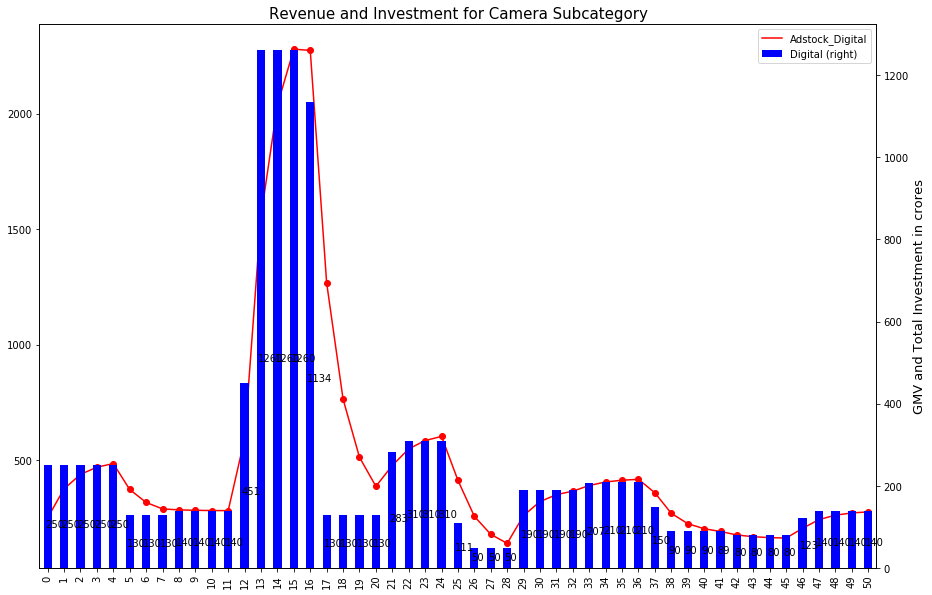

In [808]:
plt.figure(figsize=(15,10))
#Adstock Digital plot for camera
ax6 = Consumercamera_weekly['Adstock_Digital'].plot(x='Week', linestyle='-',color='red', marker='o',legend=True)
ax7=Consumercamera_weekly[['Digital']].plot(kind='bar',stacked=True,color='blue',secondary_y=True,ax=ax6)
plt.title("Revenue and Investment for Camera Subcategory",fontdict=title_font)
plt.xlabel('Week Number(2015-16)',fontsize=13)
plt.ylabel('GMV and Total Investment in crores',fontsize=13)

for p in ax7.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax7.annotate('{:.0f}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

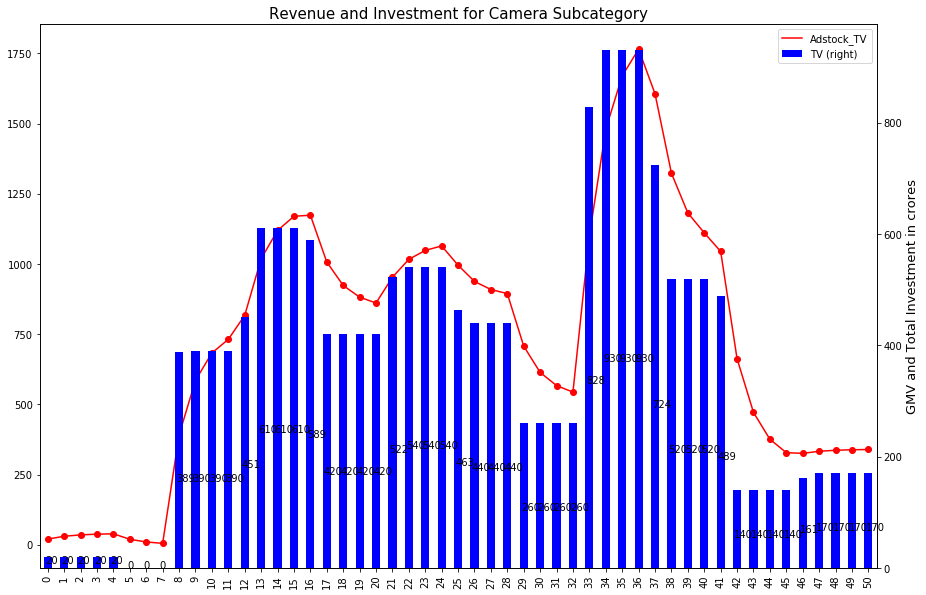

In [809]:
plt.figure(figsize=(15,10))
#Adstock TV plot for camera
ax6 = Consumercamera_weekly['Adstock_TV'].plot(x='Week', linestyle='-',color='red', marker='o',legend=True)
ax7=Consumercamera_weekly[['TV']].plot(kind='bar',stacked=True,color='blue',secondary_y=True,ax=ax6)
plt.title("Revenue and Investment for Camera Subcategory",fontdict=title_font)
plt.xlabel('Week Number(2015-16)',fontsize=13)
plt.ylabel('GMV and Total Investment in crores',fontsize=13)

for p in ax7.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax7.annotate('{:.0f}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

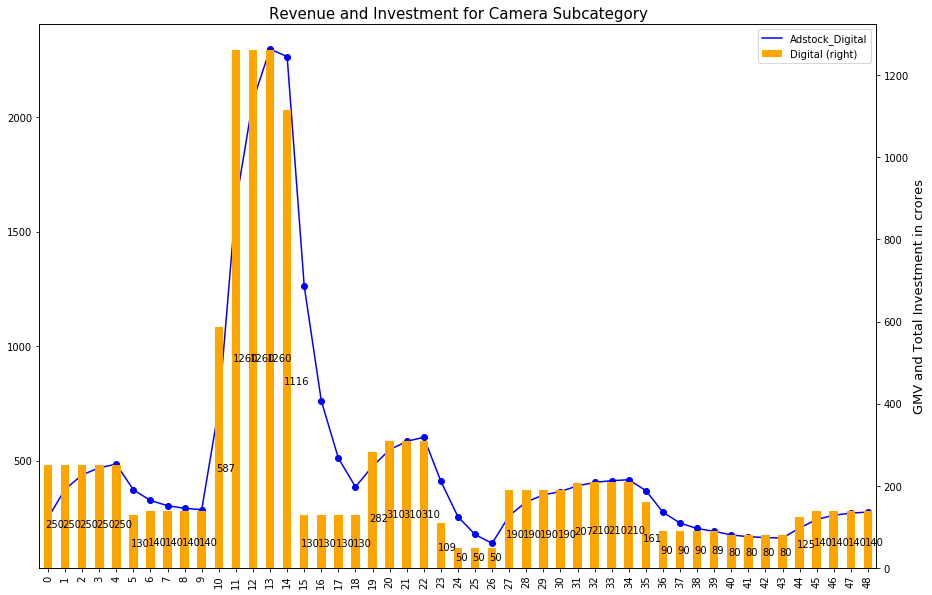

In [810]:
plt.figure(figsize=(15,10))
#Adstock Digital plot for audio
ax6 = ConsumerAudio_weekly['Adstock_Digital'].plot(x='Week', linestyle='-',color='blue', marker='o',legend=True)
ax7=ConsumerAudio_weekly[['Digital']].plot(kind='bar',stacked=True,color='orange',secondary_y=True,ax=ax6)
plt.title("Revenue and Investment for Camera Subcategory",fontdict=title_font)
plt.xlabel('Week Number(2015-16)',fontsize=13)
plt.ylabel('GMV and Total Investment in crores',fontsize=13)

for p in ax7.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax7.annotate('{:.0f}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

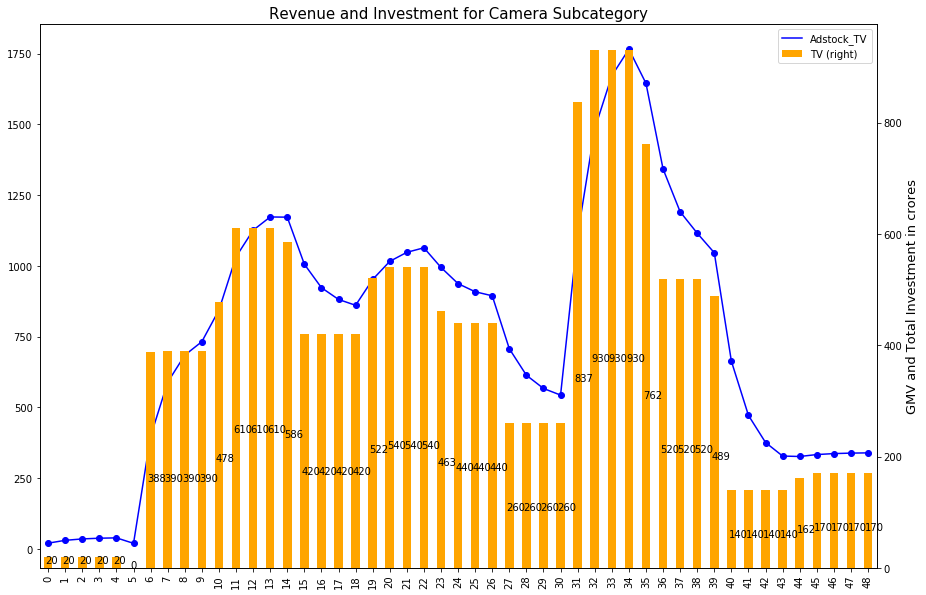

In [811]:
plt.figure(figsize=(15,10))
#Adstock TV plot for Audio
ax6 = ConsumerAudio_weekly['Adstock_TV'].plot(x='Week', linestyle='-',color='blue', marker='o',legend=True)
ax7=ConsumerAudio_weekly[['TV']].plot(kind='bar',stacked=True,color='orange',secondary_y=True,ax=ax6)
plt.title("Revenue and Investment for Camera Subcategory",fontdict=title_font)
plt.xlabel('Week Number(2015-16)',fontsize=13)
plt.ylabel('GMV and Total Investment in crores',fontsize=13)

for p in ax7.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax7.annotate('{:.0f}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

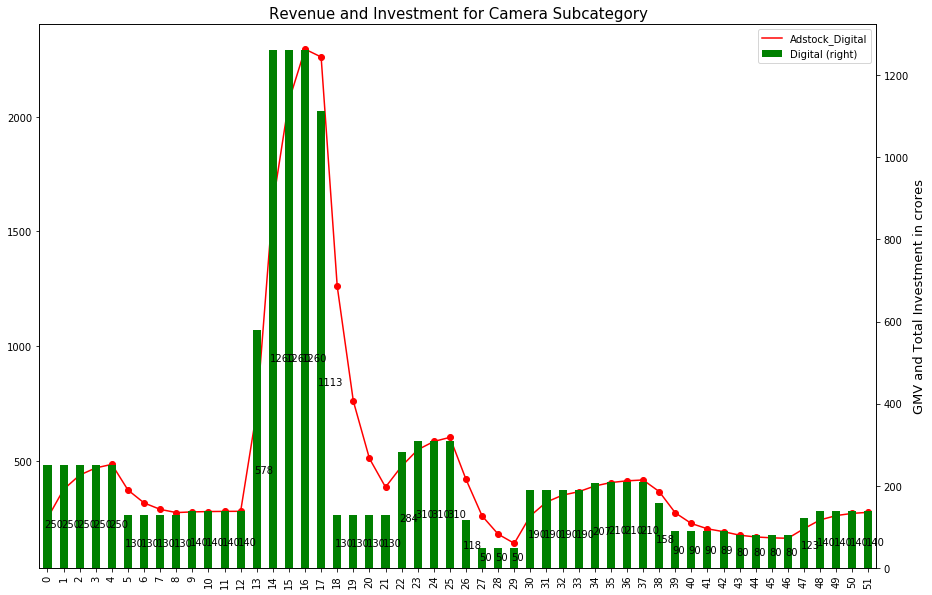

In [812]:
plt.figure(figsize=(15,10))
#Adstock Digital plot for Gaming
ax6 = ConsumerGaming_weekly['Adstock_Digital'].plot(x='Week', linestyle='-',color='Red', marker='o',legend=True)
ax7=ConsumerGaming_weekly[['Digital']].plot(kind='bar',stacked=True,color='Green',secondary_y=True,ax=ax6)
plt.title("Revenue and Investment for Camera Subcategory",fontdict=title_font)
plt.xlabel('Week Number(2015-16)',fontsize=13)
plt.ylabel('GMV and Total Investment in crores',fontsize=13)

for p in ax7.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax7.annotate('{:.0f}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

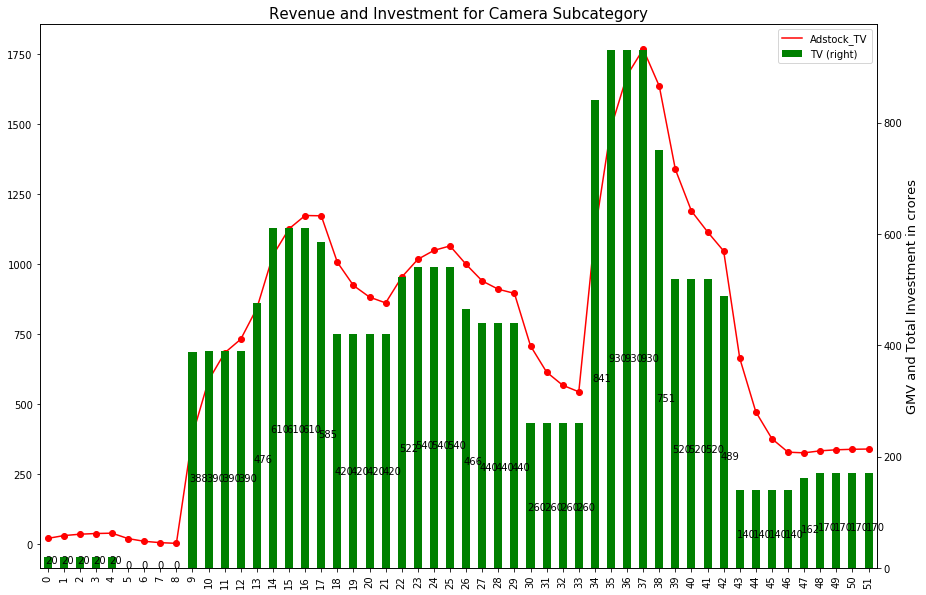

In [813]:
plt.figure(figsize=(15,10))
#Adstock TV plot for gaming
ax6 = ConsumerGaming_weekly['Adstock_TV'].plot(x='Week', linestyle='-',color='Red', marker='o',legend=True)
ax7=ConsumerGaming_weekly[['TV']].plot(kind='bar',stacked=True,color='Green',secondary_y=True,ax=ax6)
plt.title("Revenue and Investment for Camera Subcategory",fontdict=title_font)
plt.xlabel('Week Number(2015-16)',fontsize=13)
plt.ylabel('GMV and Total Investment in crores',fontsize=13)

for p in ax7.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax7.annotate('{:.0f}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

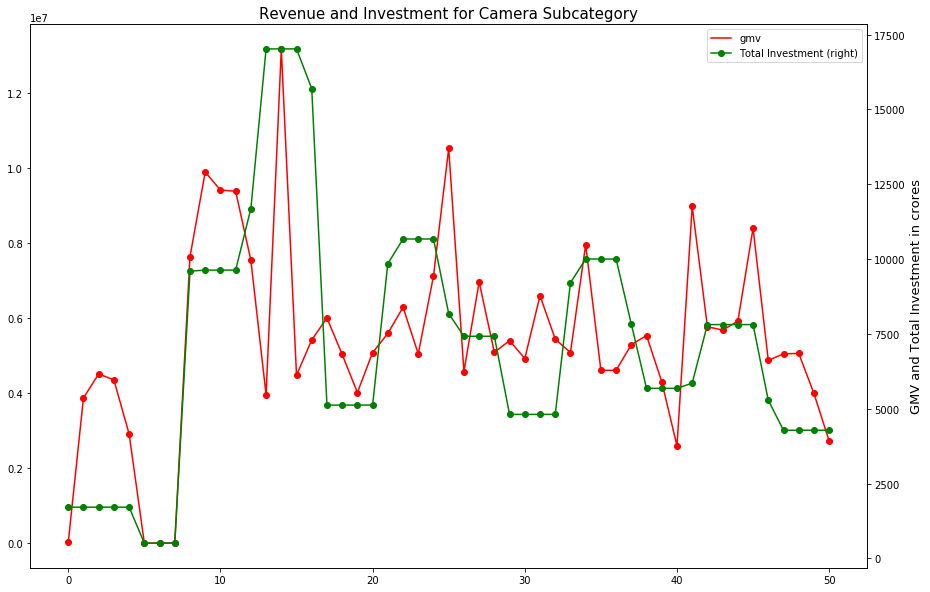

In [814]:
plt.figure(figsize=(15,10))

ax6 = Consumercamera_weekly['gmv'].plot(x='Week', linestyle='-',color='red', marker='o',legend=True)
ax7=Consumercamera_weekly[['Total Investment']].plot(linestyle='-',marker='o',stacked=True,color = 'green',secondary_y=True,ax=ax6)
plt.title("Revenue and Investment for Camera Subcategory",fontdict=title_font)
plt.xlabel('Week Number(2015-16)',fontsize=13)
plt.ylabel('GMV and Total Investment in crores',fontsize=13)

for p in ax7.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax7.annotate('{:.0f}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

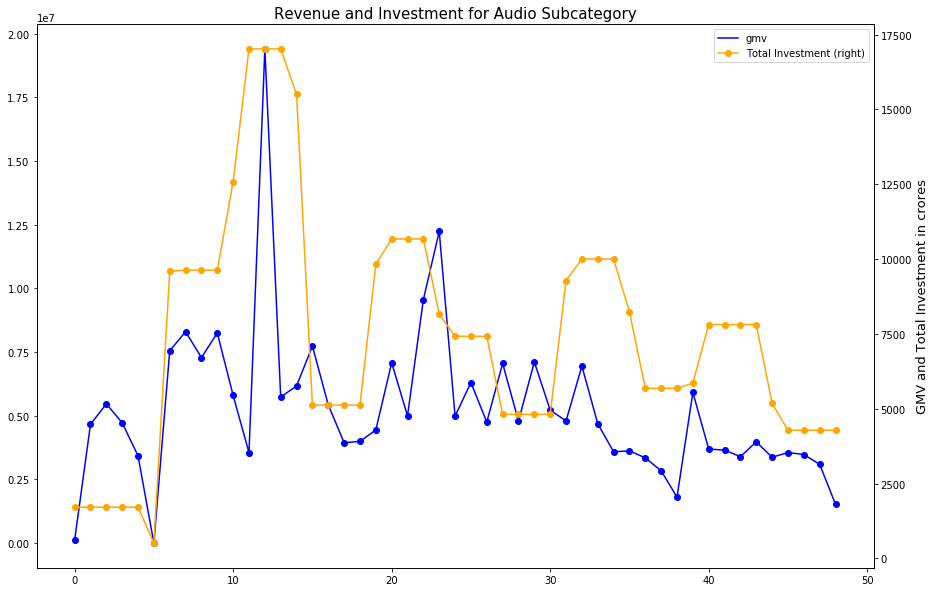

In [815]:
plt.figure(figsize=(15,10))

ax6 = ConsumerAudio_weekly['gmv'].plot(x='Week', linestyle='-',color='blue', marker='o',legend=True)
ax7=ConsumerAudio_weekly[['Total Investment']].plot(linestyle='-',marker='o',stacked=True,color = 'orange',secondary_y=True,ax=ax6)
plt.title("Revenue and Investment for Audio Subcategory",fontdict=title_font)
plt.xlabel('Week Number (2015-16)',fontsize=13)
plt.ylabel('GMV and Total Investment in crores',fontsize=13)

for p in ax7.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax7.annotate('{:.0f}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

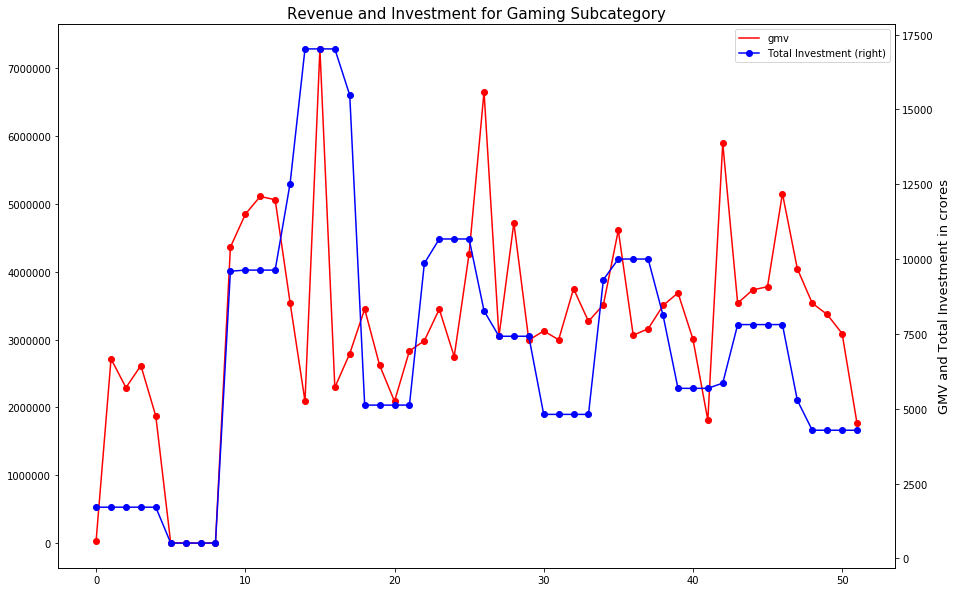

In [816]:
plt.figure(figsize=(15,10))

ax6 = ConsumerGaming_weekly['gmv'].plot(x='Week', linestyle='-',color='red', marker='o',legend=True)
ax7=ConsumerGaming_weekly[['Total Investment']].plot(linestyle='-',color='blue',marker='o',stacked=True,secondary_y=True,ax=ax6)
plt.title("Revenue and Investment for Gaming Subcategory",fontdict=title_font)
plt.xlabel('Week Number(2015-16)',fontsize=13)
plt.ylabel('GMV and Total Investment in crores',fontsize=13)

for p in ax7.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax7.annotate('{:.0f}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

In [817]:
print('gaming',max(ConsumerGaming_weekly['gmv']))
print('camera',max(Consumercamera_weekly['gmv']))
print('audio',max(ConsumerAudio_weekly['gmv']))

gaming 7282119.620678344
camera 13174505.981192987
audio 19395942.0


# MODEL BUILDING

Under model build we build 4 different models for each of the 3 subcategories and the different models are :

1.Basic Linear Model

2.Multiplicative Model

3.Distributed Lag Model

4.Koyck Model

## 1. Basic Linear Model

### LR model for Camera subcategory using Stepwise Selection method

In [818]:
Consumercamera_weekly=Consumercamera_weekly.drop(['Week'],axis=1)
ConsumerGaming_weekly=ConsumerGaming_weekly.drop(['Week'],axis=1)
ConsumerAudio_weekly=ConsumerAudio_weekly.drop(['Week'],axis=1)

In [819]:
Consumercamera_weekly.columns

Index(['units', 'sla', 'product_mrp', 'product_procurement_sla',
       'listing_price', 'NPS', 'Stock Index', 'discount', 'discount_percent',
       'moving_avg_2', 'moving_avg_3', 'nps_lag1', 'nps_lag2', 'holiday_lag1',
       'holiday_lag2', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'SEM', 'Affiliates', 'gmv', 'holiday',
       'product_analytic_vertical_CameraAccessory',
       'product_analytic_vertical_CameraBag',
       'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraBatteryCharger',
       'product_analytic_vertical_CameraBatteryGrip',
       'product_analytic_vertical_CameraEyeCup',
       'product_analytic_vertical_CameraFilmRolls',
       'product_analytic_vertical_CameraHousing',
       'p

In [820]:
ConsumerGaming_weekly=ConsumerGaming_weekly.fillna(0)
ConsumerAudio_weekly=ConsumerAudio_weekly.fillna(0)
Consumercamera_weekly=Consumercamera_weekly.fillna(0)

In [468]:
## MODELBUILDING for 3 subcateogories
#Splitting the dataset into test and train sets
from sklearn.model_selection import train_test_split
np.random.seed(1)
camera_train, camera_test = train_test_split(Consumercamera_weekly, train_size = 0.7, test_size = 0.3, random_state = 100)
gaming_train, gaming_test = train_test_split(ConsumerGaming_weekly, train_size = 0.7, test_size = 0.3, random_state = 100)
audio_train, audio_test = train_test_split(ConsumerAudio_weekly, train_size = 0.7, test_size = 0.3, random_state = 100)

In [469]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler_c = MinMaxScaler()
scaler_g = MinMaxScaler()
scaler_a = MinMaxScaler()
camera_weekly_col=list(Consumercamera_weekly.columns)
gaming_weekly_col=list(ConsumerGaming_weekly.columns)
audio_weekly_col=list(ConsumerAudio_weekly.columns)

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
camera_train[camera_weekly_col] = scaler_c.fit_transform(camera_train[camera_weekly_col])
gaming_train[gaming_weekly_col] = scaler_g.fit_transform(gaming_train[gaming_weekly_col])
audio_train[audio_weekly_col] = scaler_a.fit_transform(audio_train[audio_weekly_col])

camera_train.head()

,units,sla,product_mrp,product_procurement_sla,listing_price,NPS,Stock Index,discount,discount_percent,moving_avg_2,...,product_analytic_vertical_Flash,product_analytic_vertical_FlashShoeAdapter,product_analytic_vertical_Lens,product_analytic_vertical_ReflectorUmbrella,product_analytic_vertical_Softbox,product_analytic_vertical_Strap,product_analytic_vertical_Telescope,s1_fact.order_payment_type_Prepaid,Adstock_Digital,Adstock_TV
47,0.607,0.215,0.562,0.450,0.433,0.391,0.789,0.642,0.810,0.607,...,0.897,0.000,0.386,0.000,0.250,0.635,0.821,0.216,0.048,0.186
43,0.410,0.209,0.627,0.518,0.494,0.186,0.938,0.706,0.787,0.410,...,0.761,0.000,0.355,0.000,0.250,1.000,0.667,0.256,0.013,0.265
36,0.417,0.232,0.535,0.557,0.472,0.295,0.000,0.549,0.377,0.419,...,0.504,0.000,0.208,0.000,0.000,0.846,0.641,0.319,0.130,1.000
17,0.606,0.309,0.763,0.849,0.701,0.167,0.960,0.752,0.333,0.606,...,0.506,0.000,0.301,0.000,0.000,0.481,0.179,0.222,0.527,0.569
7,0.000,1.000,0.000,0.000,0.000,1.000,0.841,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.070,0.000


In [470]:
#DIVIDE INTO X and Y
y_train_c = camera_train.pop('gmv')
X_train_c = camera_train

y_train_g = gaming_train.pop('gmv')
X_train_g = gaming_train

y_train_a = audio_train.pop('gmv')
X_train_a = audio_train

In [471]:
#USing Stepwise Selection to identify the p-values
import statsmodels.api as sm
def stepwise_selection(X,y,
                      initial_list=['units','discount','discount_percent','sla','product_mrp','NPS','Stock Index','Adstock_TV','Adstock_Digital','Total Investment','holiday','moving_avg_2','moving_avg_3','nps_lag1', 'nps_lag2', 'holiday_lag1', 'holiday_lag2'],
                       threshold_in=0.001,
                       threshold_out=0.1,
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y,sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval<threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(best_feature,best_pval)
        model=sm.OLS(y,sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval>threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print(worst_feature,worst_pval)
        if not changed:
            break
    return included
    

In [260]:
#Computing the best model automatically
result = stepwise_selection(X_train_c,y_train_c)
print("Resultant Features ::")
print(list(result))

product_analytic_vertical_Filter 1.0163634322354455e-10
Stock Index 0.8612562088232734
Adstock_TV 0.7492144010923006
Total Investment 0.4805141016305593
sla 0.19386174799851646
Adstock_Digital 0.1502612612103337
listing_price 0.00011497287131324573
Resultant Features ::
['units', 'discount', 'discount_percent', 'product_mrp', 'NPS', 'holiday', 'moving_avg_2', 'moving_avg_3', 'nps_lag1', 'nps_lag2', 'holiday_lag1', 'holiday_lag2', 'product_analytic_vertical_Filter', 'listing_price']


In [261]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_c_new=X_train_c[result]
X_train_cc_new=sm.add_constant(X_train_c_new)
lm_c = sm.OLS(y_train_c,X_train_cc_new).fit()  

In [262]:
#Let's see the summary of our linear model
print(lm_c.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     146.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.45e-17
Time:                        16:07:18   Log-Likelihood:                 89.621
No. Observations:                  35   AIC:                            -151.2
Df Residuals:                      21   BIC:                            -129.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [263]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_cc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_cc_new.values, i) for i in range(X_train_cc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,discount,inf
4,product_mrp,inf
14,listing_price,inf
7,moving_avg_2,16368779619.240
8,moving_avg_3,9208289889.340
1,units,1023072198.960
9,nps_lag1,851399541.970
5,NPS,270497040.300
10,nps_lag2,177593788.030
12,holiday_lag2,270.690


In [264]:
X_train_cc_new=X_train_cc_new.drop(['discount'],axis=1)
lm_c = sm.OLS(y_train_c,X_train_cc_new).fit() 
#Let's see the summary of our linear model
print(lm_c.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     146.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.45e-17
Time:                        16:07:22   Log-Likelihood:                 89.621
No. Observations:                  35   AIC:                            -151.2
Df Residuals:                      21   BIC:                            -129.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [265]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_cc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_cc_new.values, i) for i in range(X_train_cc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,moving_avg_2,16368779619.240
7,moving_avg_3,9208289889.340
1,units,1023072198.960
8,nps_lag1,851399541.970
4,NPS,270497040.300
9,nps_lag2,177593788.030
11,holiday_lag2,270.690
10,holiday_lag1,241.410
0,const,177.700
5,holiday,65.400


In [266]:
X_train_cc_new=X_train_cc_new.drop(['moving_avg_2'],axis=1)
lm_c = sm.OLS(y_train_c,X_train_cc_new).fit() 
#Let's see the summary of our linear model
print(lm_c.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     35.16
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.53e-11
Time:                        16:07:26   Log-Likelihood:                 63.139
No. Observations:                  35   AIC:                            -100.3
Df Residuals:                      22   BIC:                            -80.06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [267]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_cc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_cc_new.values, i) for i in range(X_train_cc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,nps_lag1,836904454.400
4,NPS,265535573.280
8,nps_lag2,175099178.160
6,moving_avg_3,200170.740
1,units,199822.070
9,holiday_lag1,239.490
10,holiday_lag2,238.650
0,const,176.660
12,listing_price,56.920
3,product_mrp,47.330


In [268]:
X_train_cc_new=X_train_cc_new.drop(['units'],axis=1)
lm_c = sm.OLS(y_train_c,X_train_cc_new).fit() 
#Let's see the summary of our linear model
print(lm_c.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     34.48
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.17e-11
Time:                        16:07:34   Log-Likelihood:                 60.639
No. Observations:                  35   AIC:                            -97.28
Df Residuals:                      23   BIC:                            -78.61
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [269]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_cc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_cc_new.values, i) for i in range(X_train_cc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,nps_lag1,836479239.970
3,NPS,265127348.670
7,nps_lag2,175099007.960
9,holiday_lag2,205.770
8,holiday_lag1,197.890
0,const,134.690
11,listing_price,55.870
2,product_mrp,47.310
4,holiday,18.870
1,discount_percent,7.980


In [270]:
X_train_cc_new=X_train_cc_new.drop(['const'],axis=1)
lm_c = sm.OLS(y_train_c,X_train_cc_new).fit() 
#Let's see the summary of our linear model
print(lm_c.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     245.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.37e-22
Time:                        16:07:36   Log-Likelihood:                 59.479
No. Observations:                  35   AIC:                            -96.96
Df Residuals:                      24   BIC:                            -79.85
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
discount

In [271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_cc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_cc_new.values, i) for i in range(X_train_cc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,nps_lag1,2130908575.640
2,NPS,678439322.390
6,nps_lag2,443980561.440
1,product_mrp,833.970
10,listing_price,636.560
8,holiday_lag2,182.350
7,holiday_lag1,151.580
4,moving_avg_3,28.200
3,holiday,24.430
9,product_analytic_vertical_Filter,21.420


In [272]:
X_train_cc_new=X_train_cc_new.drop(['product_mrp'],axis=1)
lm_c = sm.OLS(y_train_c,X_train_cc_new).fit() 
#Let's see the summary of our linear model
print(lm_c.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     261.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.98e-23
Time:                        16:07:37   Log-Likelihood:                 58.280
No. Observations:                  35   AIC:                            -96.56
Df Residuals:                      25   BIC:                            -81.01
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
discount

In [273]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_cc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_cc_new.values, i) for i in range(X_train_cc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,nps_lag1,2051080090.490
1,NPS,655142793.880
5,nps_lag2,427109144.610
7,holiday_lag2,175.690
6,holiday_lag1,145.450
3,moving_avg_3,26.510
2,holiday,24.130
9,listing_price,23.670
8,product_analytic_vertical_Filter,19.460
0,discount_percent,3.200


In [274]:
X_train_cc_new=X_train_cc_new.drop(['moving_avg_3'],axis=1)
lm_c = sm.OLS(y_train_c,X_train_cc_new).fit() 
#Let's see the summary of our linear model
print(lm_c.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     301.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.78e-24
Time:                        16:07:39   Log-Likelihood:                 58.219
No. Observations:                  35   AIC:                            -98.44
Df Residuals:                      26   BIC:                            -84.44
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
discount

In [275]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_cc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_cc_new.values, i) for i in range(X_train_cc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,nps_lag1,2009456810.520
1,NPS,645568799.310
4,nps_lag2,415827716.360
6,holiday_lag2,162.110
5,holiday_lag1,127.820
2,holiday,24.130
7,product_analytic_vertical_Filter,17.530
8,listing_price,12.720
0,discount_percent,3.120


In [276]:
X_train_cc_new=X_train_cc_new.drop(['nps_lag1'],axis=1)
lm_c = sm.OLS(y_train_c,X_train_cc_new).fit() 
#Let's see the summary of our linear model
print(lm_c.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     344.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.98e-25
Time:                        16:07:40   Log-Likelihood:                 57.834
No. Observations:                  35   AIC:                            -99.67
Df Residuals:                      27   BIC:                            -87.23
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
discount

In [277]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_cc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_cc_new.values, i) for i in range(X_train_cc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,nps_lag2,21782586.640
1,NPS,21779957.650
5,holiday_lag2,160.880
4,holiday_lag1,121.180
2,holiday,22.040
6,product_analytic_vertical_Filter,17.060
7,listing_price,12.400
0,discount_percent,2.920


In [278]:
X_train_cc_new=X_train_cc_new.drop(['nps_lag2'],axis=1)
lm_c = sm.OLS(y_train_c,X_train_cc_new).fit() 
#Let's see the summary of our linear model
print(lm_c.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     408.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.90e-26
Time:                        16:07:41   Log-Likelihood:                 57.821
No. Observations:                  35   AIC:                            -101.6
Df Residuals:                      28   BIC:                            -90.76
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
discount

In [279]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_cc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_cc_new.values, i) for i in range(X_train_cc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,holiday_lag2,160.320
3,holiday_lag1,120.910
2,holiday,19.750
5,product_analytic_vertical_Filter,15.440
6,listing_price,11.620
1,NPS,3.710
0,discount_percent,2.920


In [280]:
y_train_gmv_c = lm_c.predict(X_train_cc_new)

In [281]:
X_train_cc_new=X_train_cc_new.drop(['holiday_lag2'],axis=1)
lm_c = sm.OLS(y_train_c,X_train_cc_new).fit() 
#Let's see the summary of our linear model
print(lm_c.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     463.3
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.99e-27
Time:                        16:07:47   Log-Likelihood:                 56.738
No. Observations:                  35   AIC:                            -101.5
Df Residuals:                      29   BIC:                            -92.14
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
discount

In [282]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_cc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_cc_new.values, i) for i in range(X_train_cc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,13.700
4,product_analytic_vertical_Filter,12.310
3,holiday_lag1,10.230
5,listing_price,7.260
1,NPS,2.740
0,discount_percent,2.650


In [283]:
X_train_cc_new=X_train_cc_new.drop(['holiday'],axis=1)
lm_c = sm.OLS(y_train_c,X_train_cc_new).fit() 
#Let's see the summary of our linear model
print(lm_c.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     430.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.80e-27
Time:                        16:07:49   Log-Likelihood:                 51.710
No. Observations:                  35   AIC:                            -93.42
Df Residuals:                      30   BIC:                            -85.64
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
discount

In [284]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_cc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_cc_new.values, i) for i in range(X_train_cc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,product_analytic_vertical_Filter,6.720
4,listing_price,5.490
0,discount_percent,2.650
1,NPS,2.170
2,holiday_lag1,2.090


Text(0.5, 0, 'Errors')

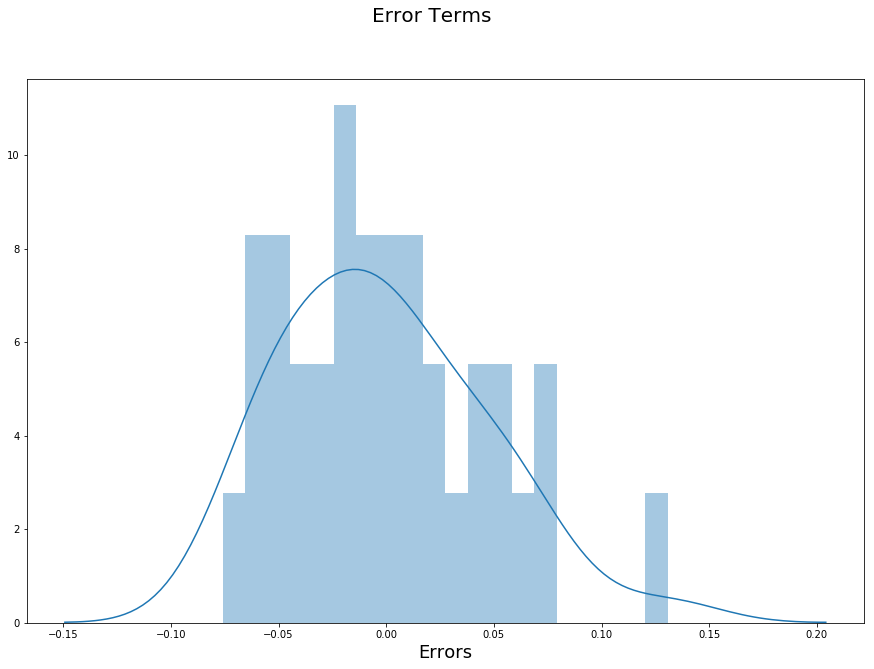

In [285]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Plot the histogram of the error terms
fig = plt.figure(figsize=(15,10))
sns.distplot((y_train_c - y_train_gmv_c), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   


In [286]:
camera_test[camera_weekly_col] = scaler_c.transform(camera_test[camera_weekly_col])

In [287]:
camera_test.head(5)

,units,sla,product_mrp,product_procurement_sla,listing_price,NPS,Stock Index,discount,discount_percent,moving_avg_2,...,product_analytic_vertical_Flash,product_analytic_vertical_FlashShoeAdapter,product_analytic_vertical_Lens,product_analytic_vertical_ReflectorUmbrella,product_analytic_vertical_Softbox,product_analytic_vertical_Strap,product_analytic_vertical_Telescope,s1_fact.order_payment_type_Prepaid,Adstock_Digital,Adstock_TV
6,0.000,0.275,0.626,-0.666,-0.105,1.000,0.841,1.343,2.445,0.000,...,0.000,0.000,-0.002,0.000,0.000,0.000,0.000,-0.001,0.083,0.003
32,0.420,0.346,0.588,0.427,0.466,0.378,0.912,0.658,0.589,0.420,...,0.786,0.000,0.249,0.000,0.250,0.750,0.577,0.230,0.106,0.306
37,0.511,0.205,0.550,0.533,0.493,0.385,0.503,0.554,0.449,0.511,...,0.570,0.000,0.254,0.000,0.250,0.615,0.551,0.601,0.102,0.910
35,0.395,0.285,0.645,0.506,0.520,0.295,0.000,0.714,0.621,0.393,...,0.588,0.000,0.239,2.000,0.000,0.654,0.551,0.211,0.128,0.946
33,0.431,0.303,0.521,0.609,0.487,0.308,0.139,0.504,0.313,0.431,...,0.553,1.000,0.245,0.000,0.000,0.846,0.564,0.238,0.117,0.622


In [288]:
#Dividing into train and test sets
y_test_c = camera_test.pop('gmv')
X_test_c = camera_test

In [289]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_c_new = X_test_c[X_train_cc_new.columns]

In [290]:
# Making predictions
X_test_cc_new=sm.add_constant(X_test_c)
y_pred_c = lm_c.predict(X_test_c_new)

Text(0, 0.5, 'y_pred')

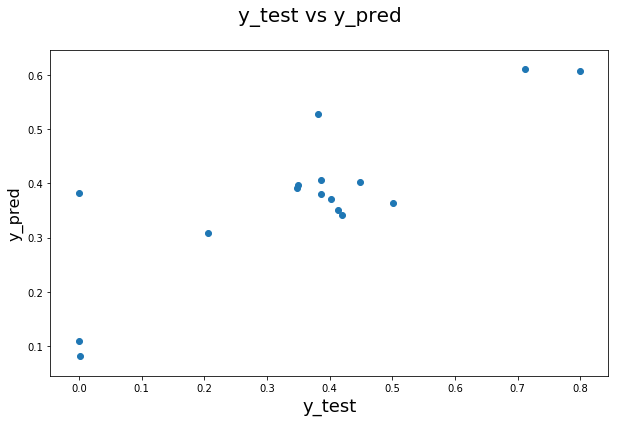

In [291]:
#Model Evaluation for Camera Subcategory
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test_c,y_pred_c)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [292]:
from sklearn.metrics import r2_score
r2_score(y_test_c, y_pred_c)

0.6329079641808215

In [293]:
## RMSE and MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test_c, y_pred_c)
rmse = sqrt(mean_squared_error(y_test_c, y_pred_c))
print(mse)
print(rmse)

0.017568804162611067
0.13254736573244702


### We observe that the R2 score for the camera subcategory is 0.63

## LR model for Gaming accessory subcategory using Stepwise selection

In [294]:
#Computing the best model automatically
result = stepwise_selection(X_train_g,y_train_g)
print("Resultant Features ::")
print(list(result))

product_analytic_vertical_GamePad 5.90500207699164e-07
Adstock_TV 0.9937835127863844
units 0.9568267230811924
NPS 0.5182740658316121
product_analytic_vertical_TVOutCableAccessory 0.0008522165103111855
Total Investment 0.7523716396014819
listing_price 6.441202019848907e-05
product_mrp 0.5749926542691424
Adstock_Digital 0.4543924323655649
holiday_lag2 0.1516853980770363
Stock Index 0.14722359683002878
sla 0.19696534843925761
product_analytic_vertical_GamingHeadset 0.000830869549209683
discount 0.13258982563996508
Resultant Features ::
['discount_percent', 'holiday', 'moving_avg_2', 'moving_avg_3', 'nps_lag1', 'nps_lag2', 'holiday_lag1', 'product_analytic_vertical_GamePad', 'product_analytic_vertical_TVOutCableAccessory', 'listing_price', 'product_analytic_vertical_GamingHeadset']


In [295]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_g_new=X_train_g[result]
X_train_gc_new=sm.add_constant(X_train_g_new)
lm_g = sm.OLS(y_train_g,X_train_gc_new).fit()   # Running the linear model

In [296]:
#Printing the summary of the model
print(lm_g.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     124.8
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.11e-18
Time:                        16:11:06   Log-Likelihood:                 82.176
No. Observations:                  36   AIC:                            -140.4
Df Residuals:                      24   BIC:                            -121.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [297]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_gc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_gc_new.values, i) for i in range(X_train_gc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,nps_lag1,27166611.100
6,nps_lag2,27165233.150
4,moving_avg_3,437469.020
3,moving_avg_2,437423.570
0,const,61.290
11,product_analytic_vertical_GamingHeadset,7.280
1,discount_percent,5.640
9,product_analytic_vertical_TVOutCableAccessory,5.330
2,holiday,5.230
8,product_analytic_vertical_GamePad,5.090


In [298]:
X_train_gc_new=X_train_gc_new.drop(['nps_lag1'],axis=1)
lm_g= sm.OLS(y_train_g,X_train_gc_new).fit() 
#Let's see the summary of our linear model
print(lm_g.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     96.90
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.93e-17
Time:                        16:11:19   Log-Likelihood:                 75.321
No. Observations:                  36   AIC:                            -128.6
Df Residuals:                      25   BIC:                            -111.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [299]:
vif = pd.DataFrame()
vif['Features'] = X_train_gc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_gc_new.values, i) for i in range(X_train_gc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,moving_avg_3,429910.850
3,moving_avg_2,429828.950
0,const,57.780
10,product_analytic_vertical_GamingHeadset,6.920
8,product_analytic_vertical_TVOutCableAccessory,5.230
2,holiday,5.170
1,discount_percent,5.120
7,product_analytic_vertical_GamePad,4.930
6,holiday_lag1,3.450
5,nps_lag2,1.910


In [300]:
X_train_gc_new=X_train_gc_new.drop(['moving_avg_3'],axis=1)
lm_g= sm.OLS(y_train_g,X_train_gc_new).fit() 

In [301]:
vif = pd.DataFrame()
vif['Features'] = X_train_gc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_gc_new.values, i) for i in range(X_train_gc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.980
9,product_analytic_vertical_GamingHeadset,6.230
2,holiday,5.110
6,product_analytic_vertical_GamePad,4.830
7,product_analytic_vertical_TVOutCableAccessory,4.610
1,discount_percent,4.580
5,holiday_lag1,3.440
4,nps_lag2,1.890
3,moving_avg_2,1.790
8,listing_price,1.650


In [303]:
X_train_gc_new=X_train_gc_new.drop(['const'],axis=1)
lm_g= sm.OLS(y_train_g,X_train_gc_new).fit() 

In [304]:
vif = pd.DataFrame()
vif['Features'] = X_train_gc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_gc_new.values, i) for i in range(X_train_gc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,product_analytic_vertical_GamePad,26.290
8,product_analytic_vertical_GamingHeadset,21.680
6,product_analytic_vertical_TVOutCableAccessory,18.220
7,listing_price,15.560
0,discount_percent,14.770
2,moving_avg_2,9.770
1,holiday,5.890
4,holiday_lag1,4.610
3,nps_lag2,4.080


In [305]:
X_train_gc_new=X_train_gc_new.drop(['product_analytic_vertical_GamePad'],axis=1)
lm_g= sm.OLS(y_train_g,X_train_gc_new).fit() 

In [306]:
vif = pd.DataFrame()
vif['Features'] = X_train_gc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_gc_new.values, i) for i in range(X_train_gc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,product_analytic_vertical_GamingHeadset,21.330
6,listing_price,15.560
0,discount_percent,14.670
5,product_analytic_vertical_TVOutCableAccessory,7.970
2,moving_avg_2,7.620
1,holiday,5.770
4,holiday_lag1,4.600
3,nps_lag2,4.070


In [307]:
X_train_gc_new=X_train_gc_new.drop(['product_analytic_vertical_GamingHeadset'],axis=1)
lm_g= sm.OLS(y_train_g,X_train_gc_new).fit() 

In [308]:
vif = pd.DataFrame()
vif['Features'] = X_train_gc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_gc_new.values, i) for i in range(X_train_gc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,listing_price,13.880
2,moving_avg_2,7.000
5,product_analytic_vertical_TVOutCableAccessory,6.010
1,holiday,5.110
0,discount_percent,4.690
4,holiday_lag1,4.520
3,nps_lag2,3.000


In [309]:
X_train_gc_new=X_train_gc_new.drop(['listing_price'],axis=1)
lm_g= sm.OLS(y_train_g,X_train_gc_new).fit() 

In [310]:
vif = pd.DataFrame()
vif['Features'] = X_train_gc_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_gc_new.values, i) for i in range(X_train_gc_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,4.710
2,moving_avg_2,4.680
4,holiday_lag1,4.480
0,discount_percent,4.050
5,product_analytic_vertical_TVOutCableAccessory,3.910
3,nps_lag2,2.850


In [311]:
#Making prediction
y_train_gmv_g = lm_g.predict(X_train_gc_new)

Text(0.5, 0, 'Errors')

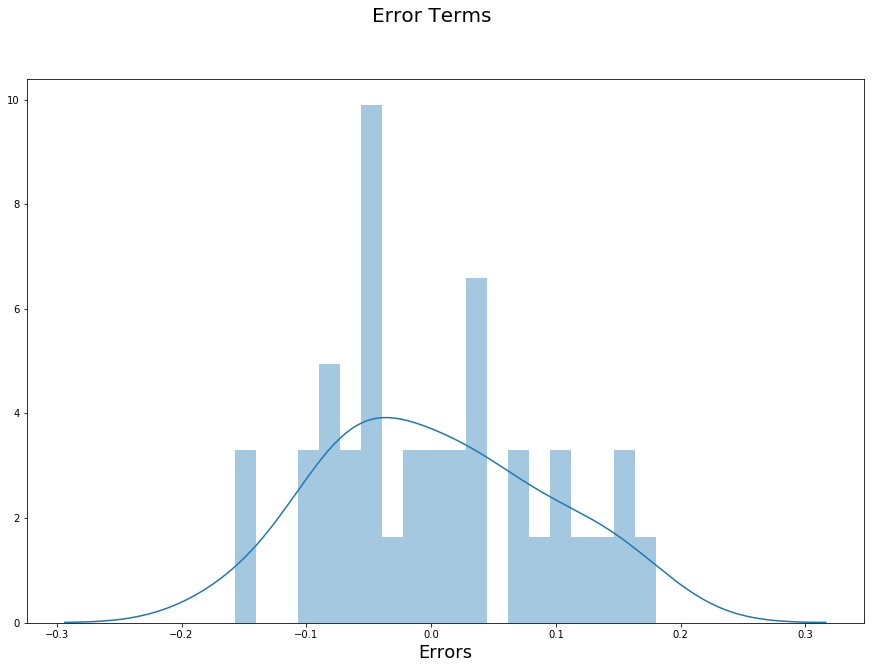

In [312]:
# Histogram plot indicating the error terms
fig = plt.figure(figsize=(15,10))
sns.distplot((y_train_g - y_train_gmv_g), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)


In [313]:
gaming_test[gaming_weekly_col] = scaler_g.transform(gaming_test[gaming_weekly_col])

In [314]:
gaming_test.head()

,units,sla,product_mrp,product_procurement_sla,listing_price,NPS,Stock Index,discount,discount_percent,moving_avg_2,...,product_analytic_vertical_GamingMemoryCard,product_analytic_vertical_GamingMouse,product_analytic_vertical_GamingMousePad,product_analytic_vertical_GamingSpeaker,product_analytic_vertical_JoystickGamingWheel,product_analytic_vertical_MotionController,product_analytic_vertical_TVOutCableAccessory,s1_fact.order_payment_type_Prepaid,Adstock_Digital,Adstock_TV
6,0.000,0.868,0.449,0.436,1.204,1.000,0.841,0.282,0.035,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.082,0.004
32,0.376,0.718,0.285,0.566,0.433,0.378,0.912,0.243,0.857,0.376,...,0.668,0.329,0.350,0.085,0.053,0.152,0.316,0.281,0.098,0.320
38,0.362,0.811,0.240,0.412,0.920,0.373,0.436,0.096,0.282,0.362,...,0.121,0.139,0.196,0.119,0.383,0.333,0.362,0.511,0.105,0.925
35,0.315,0.690,0.201,0.470,0.672,0.295,0.000,0.099,0.654,0.315,...,0.095,0.245,0.335,0.102,0.133,0.455,0.410,0.342,0.123,0.841
33,0.250,0.868,0.193,0.430,0.447,0.378,0.912,0.135,0.819,0.250,...,0.338,0.158,0.245,0.051,0.090,0.333,0.393,0.224,0.104,0.307


In [315]:
#Dividing into train and test sets
y_test_g = gaming_test.pop('gmv')
X_test_g = gaming_test

In [316]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_g = X_test_g[X_train_gc_new.columns]

In [317]:
# Making predictions


X_test_gc_new=sm.add_constant(X_test_g)
y_pred_g = lm_g.predict(X_test_g)

Text(0, 0.5, 'y_pred')

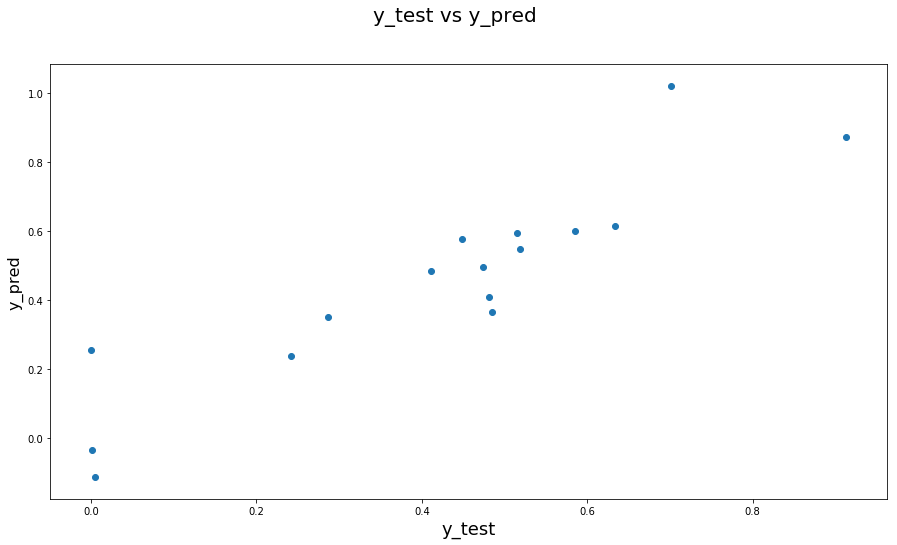

In [318]:
#Model evaluation for the gaming subcategory
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(15,8))
plt.scatter(y_test_g,y_pred_g)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [319]:
from sklearn.metrics import r2_score
r2_score(y_test_g, y_pred_g)

0.7640590719976361

In [321]:
## RMSE and MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test_g, y_pred_g)
rmse = sqrt(mean_squared_error(y_test_g, y_pred_g))
print(mse)
print(rmse)

0.014744712024973867
0.12142780581470566


### The R2 score for gaming subcategory is 0.764

## LR model for Audio sub category using Stepwise Selection

In [445]:
#Computing the best model automatically
result = stepwise_selection(X_train_a,y_train_a)
print("Resultant Features ::")
print(list(result))

product_analytic_vertical_HomeAudioSpeaker 1.3327758521855532e-09
nps_lag2 0.9836084848791802
product_analytic_vertical_FMRadio 8.264131866590762e-07
units 0.9593101377451271
listing_price 0.00021863408241082192
Adstock_Digital 0.8502241703504825
product_mrp 0.9163639001967547
Adstock_TV 0.6764606947273064
holiday_lag2 0.707320295617665
Stock Index 0.5048071421299292
Total Investment 0.48096698054076537
moving_avg_2 0.370270591951088
moving_avg_3 0.9570500579004242
nps_lag2 0.0005306699569595684
nps_lag1 0.8086889047269007
Resultant Features ::
['discount', 'discount_percent', 'sla', 'NPS', 'holiday', 'holiday_lag1', 'product_analytic_vertical_HomeAudioSpeaker', 'product_analytic_vertical_FMRadio', 'listing_price', 'nps_lag2']


In [446]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_a_new=X_train_a[result]
X_train_ac_new=sm.add_constant(X_train_a_new)
lm_a = sm.OLS(y_train_a,X_train_ac_new).fit()   # Running the linear model

In [447]:
#Let's see the summary of our linear model
print(lm_a.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1580.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.66e-30
Time:                        16:37:45   Log-Likelihood:                 121.34
No. Observations:                  34   AIC:                            -220.7
Df Residuals:                      23   BIC:                            -203.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [448]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_ac_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_ac_new.values, i) for i in range(X_train_ac_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,nps_lag2,1478986.910
4,NPS,1478621.540
0,const,118.430
2,discount_percent,20.220
1,discount,18.820
5,holiday,16.110
7,product_analytic_vertical_HomeAudioSpeaker,14.730
8,product_analytic_vertical_FMRadio,7.580
6,holiday_lag1,6.410
9,listing_price,6.390


In [449]:
X_train_ac_new=X_train_ac_new.drop(['nps_lag2'],axis=1)
lm_a= sm.OLS(y_train_a,X_train_ac_new).fit() 
#Let's see the summary of our linear model
print(lm_a.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1074.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.91e-29
Time:                        16:37:48   Log-Likelihood:                 112.28
No. Observations:                  34   AIC:                            -204.6
Df Residuals:                      24   BIC:                            -189.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [450]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_ac_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_ac_new.values, i) for i in range(X_train_ac_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,99.010
1,discount,17.870
2,discount_percent,17.770
5,holiday,16.040
7,product_analytic_vertical_HomeAudioSpeaker,13.240
8,product_analytic_vertical_FMRadio,6.460
6,holiday_lag1,6.330
9,listing_price,4.880
3,sla,2.270
4,NPS,1.890


In [451]:
X_train_ac_new=X_train_ac_new.drop(['const'],axis=1)
lm_a= sm.OLS(y_train_a,X_train_ac_new).fit() 
#Let's see the summary of our linear model
print(lm_a.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1717.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.33e-32
Time:                        16:37:55   Log-Likelihood:                 102.98
No. Observations:                  34   AIC:                            -188.0
Df Residuals:                      25   BIC:                            -174.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [452]:
vif = pd.DataFrame()
vif['Features'] = X_train_ac_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_ac_new.values, i) for i in range(X_train_ac_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,product_analytic_vertical_HomeAudioSpeaker,36.190
0,discount,28.600
1,discount_percent,26.570
4,holiday,17.830
7,product_analytic_vertical_FMRadio,13.830
5,holiday_lag1,8.430
2,sla,8.270
8,listing_price,7.370
3,NPS,5.240


In [453]:
X_train_ac_new=X_train_ac_new.drop(['product_analytic_vertical_HomeAudioSpeaker'],axis=1)
lm_a= sm.OLS(y_train_a,X_train_ac_new).fit() 
#Let's see the summary of our linear model
print(lm_a.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     167.3
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.33e-20
Time:                        16:38:00   Log-Likelihood:                 61.023
No. Observations:                  34   AIC:                            -106.0
Df Residuals:                      26   BIC:                            -93.83
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
discou

In [454]:
vif = pd.DataFrame()
vif['Features'] = X_train_ac_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_ac_new.values, i) for i in range(X_train_ac_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,discount,27.540
1,discount_percent,24.920
2,sla,8.190
7,listing_price,7.370
4,holiday,7.250
6,product_analytic_vertical_FMRadio,6.970
5,holiday_lag1,6.040
3,NPS,5.090


In [455]:
X_train_ac_new=X_train_ac_new.drop(['discount'],axis=1)
lm_a= sm.OLS(y_train_a,X_train_ac_new).fit() 
#Let's see the summary of our linear model
print(lm_a.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     191.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.53e-21
Time:                        16:38:04   Log-Likelihood:                 60.427
No. Observations:                  34   AIC:                            -106.9
Df Residuals:                      27   BIC:                            -96.17
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
discou

In [456]:
vif = pd.DataFrame()
vif['Features'] = X_train_ac_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_ac_new.values, i) for i in range(X_train_ac_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,sla,7.630
3,holiday,6.020
5,product_analytic_vertical_FMRadio,6.000
6,listing_price,5.920
4,holiday_lag1,5.670
0,discount_percent,4.430
2,NPS,4.180


In [457]:
y_train_gmv_a = lm_a.predict(X_train_ac_new)

Text(0.5, 0, 'Errors')

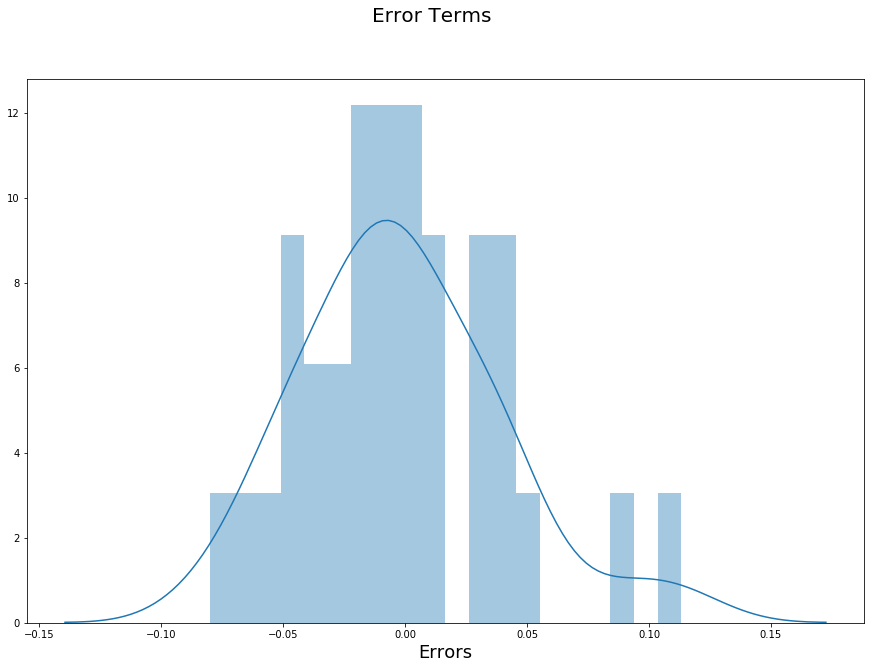

In [458]:
# Histogram plot indicating the error terms
fig = plt.figure(figsize=(15,10))
sns.distplot((y_train_a - y_train_gmv_a), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)


In [459]:
audio_test[audio_weekly_col] = scaler_a.transform(audio_test[audio_weekly_col])
audio_test.head()

,units,sla,product_mrp,product_procurement_sla,listing_price,NPS,Stock Index,discount,discount_percent,moving_avg_2,...,product_analytic_vertical_FMRadio,product_analytic_vertical_HiFiSystem,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SlingBox,product_analytic_vertical_SoundMixer,product_analytic_vertical_VoiceRecorder,s1_fact.order_payment_type_Prepaid,Adstock_Digital,Adstock_TV
6,0.086,0.427,0.377,0.949,0.374,0.251,0.381,0.342,0.387,0.086,...,0.606,0.836,0.305,0.000,0.000,0.000,0.710,0.325,0.087,0.212
20,0.085,0.222,1.064,1.040,0.627,0.137,0.101,1.177,1.110,0.085,...,0.255,0.269,0.354,0.000,0.000,0.000,0.232,0.127,0.189,0.568
33,0.073,0.346,0.278,0.779,0.400,0.451,0.000,0.186,0.350,0.073,...,0.264,0.224,0.190,0.000,0.000,0.429,0.362,0.095,0.127,0.946
28,0.101,0.332,0.456,0.935,0.372,0.578,0.912,0.456,0.547,0.101,...,0.257,0.254,0.204,0.000,0.000,0.429,0.239,0.075,0.084,0.336
42,0.094,0.246,0.350,0.781,0.589,0.284,0.938,0.182,0.382,0.094,...,0.154,0.090,0.093,0.000,0.000,0.571,0.543,0.022,0.012,0.199


In [460]:
#Dividing into train and test sets
y_test_a = audio_test.pop('gmv')
X_test_a = audio_test

In [461]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_a = X_test_a[X_train_ac_new.columns]

In [462]:
# Making predictions
X_test_ac_new=sm.add_constant(X_test_a)
y_pred_a = lm_a.predict(X_test_a)

Text(0, 0.5, 'y_pred')

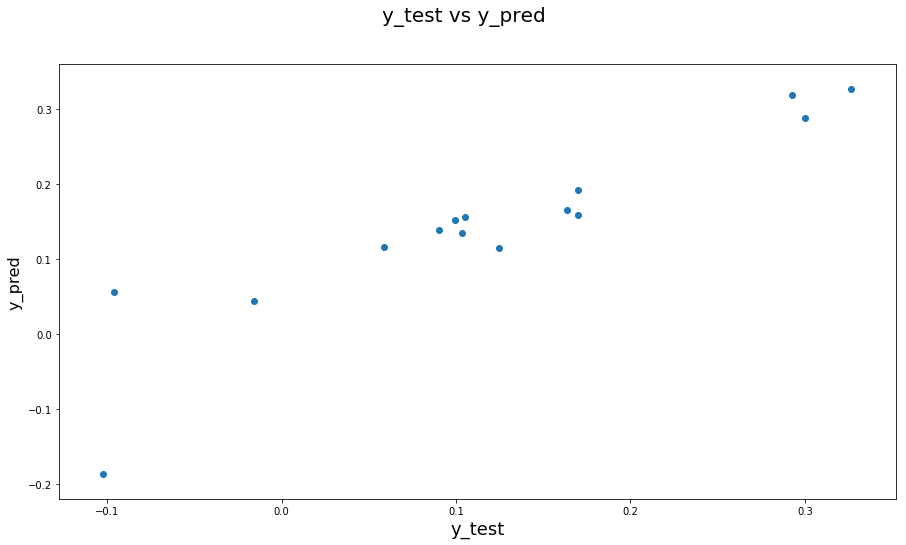

In [463]:
#Model evaluation for the audio subcategory
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(15,8))
plt.scatter(y_test_a,y_pred_a)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [466]:
from sklearn.metrics import r2_score
r2_score(y_test_a, y_pred_a)

0.7966418766872561

In [467]:
## RMSE and MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test_a, y_pred_a)
rmse = sqrt(mean_squared_error(y_test_a, y_pred_a))
print(mse)
print(rmse)

0.003145194645359767
0.05608203496093706


### The R2 score for the audio subcategory is 0.7966

## 2. Multiplicative Model

In [472]:
ConsumerGaming_weekly_m = ConsumerGaming_weekly
ConsumerAudio_weekly_m = ConsumerAudio_weekly
Consumercamera_weekly_m = Consumercamera_weekly

### Multiplicative model for the Camera Subcategory

In [534]:
#Multiplicative(log) Transformation
Consumercamera_weekly_m = np.log(ConsumerGaming_weekly_m)
Consumercamera_weekly_m = Consumercamera_weekly_m.fillna(0)
Consumercamera_weekly_m = Consumercamera_weekly_m.replace([np.inf , -np.inf], 0 )

#Getting column names
names = Consumercamera_weekly.columns

#Scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

#Fitting data
scaled_df  = scalar.fit_transform(Consumercamera_weekly)
scaled_df = pd.DataFrame(scaled_df, columns=names)

X=scaled_df.drop(columns=['gmv'])


In [535]:
#Computing the best model automatically
#splitting and calculating the best features
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,scaled_df.gmv)
x_train,x_cv,y_train,y_cv = train_test_split(X,Consumercamera_weekly.gmv)
result = stepwise_selection(x_train,y_train)
print("Resultant Features ::")
print(result)

product_analytic_vertical_Filter 9.738371080933507e-10
Adstock_Digital 0.892768808978448
NPS 0.8676807843214092
Total Investment 0.5377409375354875
nps_lag1 0.4169357392548504
nps_lag2 0.9420893973644039
holiday_lag2 0.19628270649321564
Resultant Features ::
['units', 'discount', 'discount_percent', 'sla', 'product_mrp', 'Stock Index', 'Adstock_TV', 'holiday', 'moving_avg_2', 'moving_avg_3', 'holiday_lag1', 'product_analytic_vertical_Filter']


In [536]:
#Building model
x_train1=x_train[result]
X_train_new=sm.add_constant(x_train1)
model = sm.OLS(y_train,X_train_new)
results = model.fit()
#results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     112.3
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.21e-18
Time:                        19:59:40   Log-Likelihood:                -540.88
No. Observations:                  38   AIC:                             1108.
Df Residuals:                      25   BIC:                             1129.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [538]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,moving_avg_2,12606879330.660
10,moving_avg_3,7084584667.640
1,units,790403609.810
2,discount,31.910
5,product_mrp,25.940
8,holiday,22.660
11,holiday_lag1,13.310
3,discount_percent,9.570
12,product_analytic_vertical_Filter,6.240
4,sla,2.470


In [539]:
X_train_new=X_train_new.drop(['moving_avg_2'],axis=1)
results= sm.OLS(y_train,X_train_new).fit() 
#Let's see the summary of our linear model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     33.94
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.31e-12
Time:                        20:00:14   Log-Likelihood:                -565.08
No. Observations:                  38   AIC:                             1154.
Df Residuals:                      26   BIC:                             1174.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [540]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,units,118635.020
9,moving_avg_3,118568.280
2,discount,25.670
5,product_mrp,20.850
8,holiday,12.420
10,holiday_lag1,9.130
3,discount_percent,8.970
11,product_analytic_vertical_Filter,6.190
4,sla,2.200
7,Adstock_TV,1.610


In [541]:
X_train_new=X_train_new.drop(['units'],axis=1)
results= sm.OLS(y_train,X_train_new).fit() 
#Let's see the summary of our linear model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     38.21
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.43e-13
Time:                        20:00:46   Log-Likelihood:                -565.34
No. Observations:                  38   AIC:                             1153.
Df Residuals:                      27   BIC:                             1171.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [542]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,discount,25.670
4,product_mrp,20.830
7,holiday,12.380
9,holiday_lag1,9.100
2,discount_percent,8.960
10,product_analytic_vertical_Filter,6.180
8,moving_avg_3,3.400
3,sla,2.180
6,Adstock_TV,1.610
5,Stock Index,1.400


In [543]:
X_train_new=X_train_new.drop(['discount'],axis=1)
results= sm.OLS(y_train,X_train_new).fit() 
#Let's see the summary of our linear model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     29.79
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.89e-12
Time:                        20:01:08   Log-Likelihood:                -572.17
No. Observations:                  38   AIC:                             1164.
Df Residuals:                      28   BIC:                             1181.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [544]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,holiday,8.900
8,holiday_lag1,6.880
9,product_analytic_vertical_Filter,4.830
7,moving_avg_3,3.400
3,product_mrp,2.300
1,discount_percent,2.170
2,sla,1.980
5,Adstock_TV,1.610
4,Stock Index,1.370
0,const,1.020


In [545]:
X_train_new=X_train_new.drop(['const'],axis=1)
#Prediction
# Creating X_test_new dataframe by dropping variables from X_test
x_cv = x_cv[X_train_new.columns]
#x_cv2 = x_cv[result]
x_cv=sm.add_constant(x_cv)
y_pred = results.predict(x_cv)

In [553]:
#RMSE and MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_cv, y_pred)/1000000000000
rmse = sqrt(mean_squared_error(y_cv, y_pred))/1000000
print(mse)
print(rmse)

1.3726540444093192
1.1716031940931704


In [547]:
#r2-score
from sklearn.metrics import r2_score
r2_score(y_cv, y_pred)

0.6211365472757733

### Multiplicative model for Gaming subcategory

In [514]:
#Multiplicative(log) Transformation
ConsumerGaming_weekly_m = np.log(ConsumerGaming_weekly_m)
ConsumerGaming_weekly_m = ConsumerGaming_weekly_m.fillna(0)
ConsumerGaming_weekly_m = ConsumerGaming_weekly_m.replace([np.inf , -np.inf], 0 )

#Getting column names
names = ConsumerGaming_weekly.columns

#Scaling
scalar = StandardScaler()

#Fitting data
scaled_df  = scalar.fit_transform(ConsumerGaming_weekly)
scaled_df = pd.DataFrame(scaled_df, columns=names)

X=scaled_df.drop(columns=['gmv'])


In [515]:
#splitting and calculating the best features
x_train,x_cv,y_train,y_cv = train_test_split(X,scaled_df.gmv)
x_train,x_cv,y_train,y_cv = train_test_split(X,ConsumerGaming_weekly.gmv)
#Computing the best model automatically
result = stepwise_selection(x_train,y_train)
print("Resultant Features ::")
print(result)

product_analytic_vertical_TVOutCableAccessory 8.19426340159004e-08
Stock Index 0.9174231826614048
listing_price 1.5907474055126373e-05
nps_lag2 0.8325349317082373
product_analytic_vertical_GamePad 0.0008316786872625178
units 0.8264578778093232
Total Investment 0.36662533770527006
Adstock_Digital 0.48868937145027946
NPS 0.12947602790965307
nps_lag1 0.9659723838822857
Resultant Features ::
['discount', 'discount_percent', 'sla', 'product_mrp', 'Adstock_TV', 'holiday', 'moving_avg_2', 'moving_avg_3', 'holiday_lag1', 'holiday_lag2', 'product_analytic_vertical_TVOutCableAccessory', 'listing_price', 'product_analytic_vertical_GamePad']


In [516]:
#Building model
x_train1=x_train[result]
X_train_new=sm.add_constant(x_train1)
model = sm.OLS(y_train,X_train_new)
results = model.fit()
#results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     130.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.70e-20
Time:                        19:51:54   Log-Likelihood:                -526.03
No. Observations:                  39   AIC:                             1078.
Df Residuals:                      26   BIC:                             1100.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [517]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,discount,inf
4,product_mrp,inf
12,listing_price,inf
7,moving_avg_2,249950.670
8,moving_avg_3,249752.690
9,holiday_lag1,91.260
10,holiday_lag2,84.680
6,holiday,14.100
13,product_analytic_vertical_GamePad,6.570
11,product_analytic_vertical_TVOutCableAccessory,4.940


In [518]:
X_train_new=X_train_new.drop(['discount'],axis=1)
results= sm.OLS(y_train,X_train_new).fit() 
#Let's see the summary of our linear model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     130.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.70e-20
Time:                        19:52:19   Log-Likelihood:                -526.03
No. Observations:                  39   AIC:                             1078.
Df Residuals:                      26   BIC:                             1100.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [519]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,moving_avg_2,249950.670
7,moving_avg_3,249752.690
8,holiday_lag1,91.260
9,holiday_lag2,84.680
5,holiday,14.100
12,product_analytic_vertical_GamePad,6.570
10,product_analytic_vertical_TVOutCableAccessory,4.940
3,product_mrp,4.020
1,discount_percent,3.120
11,listing_price,2.750


In [520]:
X_train_new=X_train_new.drop(['moving_avg_3'],axis=1)
results= sm.OLS(y_train,X_train_new).fit() 
#Let's see the summary of our linear model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     102.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.93e-19
Time:                        19:52:50   Log-Likelihood:                -533.13
No. Observations:                  39   AIC:                             1090.
Df Residuals:                      27   BIC:                             1110.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [521]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,holiday_lag1,90.440
8,holiday_lag2,84.510
5,holiday,13.590
11,product_analytic_vertical_GamePad,6.370
9,product_analytic_vertical_TVOutCableAccessory,4.720
3,product_mrp,3.870
1,discount_percent,3.120
6,moving_avg_2,2.950
10,listing_price,2.750
2,sla,2.400


In [522]:
X_train_new=X_train_new.drop(['holiday_lag1'],axis=1)
results= sm.OLS(y_train,X_train_new).fit() 
#Let's see the summary of our linear model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     82.08
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.88e-18
Time:                        19:53:17   Log-Likelihood:                -539.73
No. Observations:                  39   AIC:                             1101.
Df Residuals:                      28   BIC:                             1120.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [523]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,holiday,12.840
7,holiday_lag2,6.350
10,product_analytic_vertical_GamePad,6.340
8,product_analytic_vertical_TVOutCableAccessory,4.700
3,product_mrp,3.530
1,discount_percent,3.090
9,listing_price,2.720
2,sla,2.240
4,Adstock_TV,2.200
6,moving_avg_2,2.110


In [524]:
X_train_new=X_train_new.drop(['holiday'],axis=1)
results= sm.OLS(y_train,X_train_new).fit() 
#Let's see the summary of our linear model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     40.48
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.88e-14
Time:                        19:56:26   Log-Likelihood:                -555.41
No. Observations:                  39   AIC:                             1131.
Df Residuals:                      29   BIC:                             1147.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [525]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,product_analytic_vertical_GamePad,5.220
7,product_analytic_vertical_TVOutCableAccessory,4.630
8,listing_price,2.560
1,discount_percent,2.460
5,moving_avg_2,2.070
3,product_mrp,1.880
2,sla,1.700
4,Adstock_TV,1.590
6,holiday_lag2,1.480
0,const,1.120


In [526]:
X_train_new=X_train_new.drop(['const'],axis=1)

In [527]:
#Prediction
# Creating X_test_new dataframe by dropping variables from X_test
x_cv = x_cv[X_train_new.columns]
#x_cv2 = x_cv[result]
x_cv=sm.add_constant(x_cv)
y_pred = results.predict(x_cv)

In [533]:
#RMSE and MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_cv, y_pred)/100000000000
rmse = sqrt(mean_squared_error(y_cv, y_pred))/10000
print(mse)
print(rmse)

5.847518839266048
76.46907112856836


In [529]:
#r2-score
from sklearn.metrics import r2_score
r2_score(y_cv, y_pred)

0.841228720794675

### Multiplicative model for the Audio subcategory

In [477]:
#Multiplicative(log) Transformation
ConsumerAudio_weekly = np.log(ConsumerAudio_weekly)
ConsumerAudio_weekly = ConsumerAudio_weekly.fillna(0)
ConsumerAudio_weekly = Consumercamera_weekly.replace([np.inf , -np.inf], 0 )

#Getting column names
names = ConsumerAudio_weekly.columns

#Scaling
scalar = StandardScaler()

#Fitting data
scaled_df  = scalar.fit_transform(ConsumerAudio_weekly)
scaled_df = pd.DataFrame(scaled_df, columns=names)

X=scaled_df.drop(columns=['gmv'])


In [478]:
#splitting and calculating the best features
x_train,x_cv,y_train,y_cv = train_test_split(X,scaled_df.gmv)
x_train,x_cv,y_train,y_cv = train_test_split(X,ConsumerAudio_weekly.gmv)
#Computing the best model automatically
result = stepwise_selection(x_train,y_train)
print("Resultant Features ::")
print(result)

product_analytic_vertical_Filter 3.871721622836739e-09
Total Investment 0.9046851879046609
product_analytic_vertical_CameraTripod 9.407819377920823e-05
Stock Index 0.3371610234869218
listing_price 2.484311847469745e-06
Resultant Features ::
['units', 'discount', 'discount_percent', 'sla', 'product_mrp', 'NPS', 'Adstock_TV', 'Adstock_Digital', 'holiday', 'moving_avg_2', 'moving_avg_3', 'nps_lag1', 'nps_lag2', 'holiday_lag1', 'holiday_lag2', 'product_analytic_vertical_Filter', 'product_analytic_vertical_CameraTripod', 'listing_price']


In [479]:
#Building model
x_train1=x_train[result]
X_train_new=sm.add_constant(x_train1)
model = sm.OLS(y_train,X_train_new)
results = model.fit()
#results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     283.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.23e-20
Time:                        19:32:46   Log-Likelihood:                -512.22
No. Observations:                  38   AIC:                             1060.
Df Residuals:                      20   BIC:                             1090.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [480]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,units,inf
11,moving_avg_3,inf
10,moving_avg_2,inf
0,const,1286742750677284.500
5,product_mrp,1235902150.160
6,NPS,358095736.740
2,discount,326041886.740
13,nps_lag2,159369504.070
12,nps_lag1,61969562.090
18,listing_price,34329095.270


In [483]:
X_train_new=X_train_new.drop(['moving_avg_3'],axis=1)
results= sm.OLS(y_train,X_train_new).fit() 
#Let's see the summary of our linear model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     29.87
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.57e-11
Time:                        19:35:00   Log-Likelihood:                -558.30
No. Observations:                  38   AIC:                             1149.
Df Residuals:                      22   BIC:                             1175.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [484]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,listing_price,inf
1,discount,inf
4,product_mrp,inf
10,nps_lag1,1286742750677284.500
11,nps_lag2,321685687669321.125
5,NPS,321685687669321.125
0,const,320326610.500
12,holiday_lag1,97.730
13,holiday_lag2,63.080
2,discount_percent,24.840


In [486]:
X_train_new=X_train_new.drop(['listing_price'],axis=1)
results= sm.OLS(y_train,X_train_new).fit() 
#Let's see the summary of our linear model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     29.87
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.57e-11
Time:                        19:35:38   Log-Likelihood:                -558.30
No. Observations:                  38   AIC:                             1149.
Df Residuals:                      22   BIC:                             1175.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [487]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,nps_lag1,1286742750677284.500
5,NPS,321685687669321.125
11,nps_lag2,321685687669321.125
0,const,320326610.500
12,holiday_lag1,97.730
13,holiday_lag2,63.080
1,discount,55.540
4,product_mrp,44.970
2,discount_percent,24.840
8,holiday,23.460


In [488]:
X_train_new=X_train_new.drop(['nps_lag1'],axis=1)
results= sm.OLS(y_train,X_train_new).fit() 
#Let's see the summary of our linear model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     31.91
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.89e-12
Time:                        19:36:06   Log-Likelihood:                -559.15
No. Observations:                  38   AIC:                             1148.
Df Residuals:                      23   BIC:                             1173.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [489]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,nps_lag2,17050628.990
5,NPS,17043170.820
11,holiday_lag1,82.990
1,discount,55.270
12,holiday_lag2,53.610
4,product_mrp,44.500
2,discount_percent,23.030
0,const,21.530
8,holiday,21.390
13,product_analytic_vertical_Filter,13.370


In [490]:
X_train_new=X_train_new.drop(['nps_lag2'],axis=1)
results= sm.OLS(y_train,X_train_new).fit() 
#Let's see the summary of our linear model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     35.36
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.87e-12
Time:                        19:36:32   Log-Likelihood:                -559.41
No. Observations:                  38   AIC:                             1147.
Df Residuals:                      24   BIC:                             1170.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [491]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,holiday_lag1,82.850
1,discount,54.450
11,holiday_lag2,51.090
4,product_mrp,44.460
2,discount_percent,22.460
8,holiday,20.170
12,product_analytic_vertical_Filter,12.990
13,product_analytic_vertical_CameraTripod,9.730
3,sla,7.300
5,NPS,4.640


In [492]:
X_train_new=X_train_new.drop(['holiday_lag1'],axis=1)
results= sm.OLS(y_train,X_train_new).fit() 
#Let's see the summary of our linear model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     39.63
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.11e-13
Time:                        19:37:01   Log-Likelihood:                -559.54
No. Observations:                  38   AIC:                             1145.
Df Residuals:                      25   BIC:                             1166.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [493]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,discount,49.070
4,product_mrp,41.850
2,discount_percent,22.160
11,product_analytic_vertical_Filter,10.450
12,product_analytic_vertical_CameraTripod,9.490
8,holiday,8.510
10,holiday_lag2,6.580
5,NPS,4.530
9,moving_avg_2,3.590
6,Adstock_TV,2.080


In [494]:
X_train_new=X_train_new.drop(['discount'],axis=1)
results= sm.OLS(y_train,X_train_new).fit() 
#Let's see the summary of our linear model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     33.44
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.57e-12
Time:                        19:37:26   Log-Likelihood:                -564.84
No. Observations:                  38   AIC:                             1154.
Df Residuals:                      26   BIC:                             1173.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [495]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,product_analytic_vertical_Filter,9.940
11,product_analytic_vertical_CameraTripod,6.820
7,holiday,6.640
9,holiday_lag2,5.280
4,NPS,4.320
8,moving_avg_2,3.510
3,product_mrp,2.950
5,Adstock_TV,2.050
1,discount_percent,2.010
6,Adstock_Digital,1.670


In [501]:
X_train_new=X_train_new.drop(['const'],axis=1)

In [502]:
#Prediction
# Creating X_test_new dataframe by dropping variables from X_test
x_cv = x_cv[X_train_new.columns]
#x_cv2 = x_cv[result]
x_cv=sm.add_constant(x_cv)
y_pred = results.predict(x_cv)

In [513]:
#RMSE and MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_cv, y_pred)/1000000000000
rmse = sqrt(mean_squared_error(y_cv, y_pred))/100000
print(mse)
print(rmse)

0.7668090227685165
8.756763230603626


In [504]:
#r2-score
from sklearn.metrics import r2_score
r2_score(y_cv, y_pred)

0.8309401320926235

## 3. Koyck Model

In [506]:
ConsumerGaming_weekly_k = ConsumerGaming_weekly
ConsumerAudio_weekly_k = ConsumerAudio_weekly
Consumercamera_weekly_k = Consumercamera_weekly

### Koyck model for Camera

In [507]:
#Koyck model (Lag 1 of GMV)
Consumercamera_weekly_k['gmv1']=Consumercamera_weekly_k['gmv'].shift(-1)
Consumercamera_weekly_k=Consumercamera_weekly_k.fillna(0)

names = Consumercamera_weekly_k.columns
scalar = StandardScaler()
scaled_df = scalar.fit_transform(Consumercamera_weekly_k)
scaled_df = pd.DataFrame(scaled_df,columns = names)

X = scaled_df.drop(columns=['gmv'])

In [508]:
#splitting and calculating the best features
x_train,x_cv,y_train,y_cv = train_test_split(X,scaled_df.gmv)

result = stepwise_selection(x_train,y_train)
print(result)

product_analytic_vertical_CameraRemoteControl 1.4686360859189836e-07
Adstock_Digital 0.7635757510666299
Stock Index 0.6032254452881558
Adstock_TV 0.3926367322421932
Total Investment 0.13143102013461386
nps_lag2 0.1197181554863805
['units', 'discount', 'discount_percent', 'sla', 'product_mrp', 'NPS', 'holiday', 'moving_avg_2', 'moving_avg_3', 'nps_lag1', 'holiday_lag1', 'holiday_lag2', 'product_analytic_vertical_CameraRemoteControl']


In [509]:
#Building model
x_train1=x_train.loc[:,['units', 'discount_percent', 'Adstock_Digital', 'Total Investment', 'holiday', 'moving_avg_2', 'moving_avg_3', 'holiday_lag1', 'product_analytic_vertical_Filter','gmv1']]
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     58.47
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.45e-16
Time:                        16:47:12   Log-Likelihood:                 5.9446
No. Observations:                  38   AIC:                             8.111
Df Residuals:                      28   BIC:                             24.49
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
units   

In [510]:
#Prediction
x_cv2 = x_cv.loc[:,['units', 'discount_percent', 'Adstock_Digital', 'Total Investment', 'holiday', 'moving_avg_2', 'moving_avg_3', 'holiday_lag1', 'product_analytic_vertical_Filter','gmv1']]
y_pred = results.predict(x_cv2)

In [511]:
from sklearn.metrics import mean_squared_error

from math import sqrt
#RMSE and MSE
mse = mean_squared_error(y_cv, y_pred)
rmse = sqrt(mean_squared_error(y_cv, y_pred))
print(mse)
print(rmse)

0.3219293459800128
0.5673881792741304


In [512]:
#r2-score
from sklearn.metrics import r2_score
r2_score(y_cv, y_pred)

0.7108385758933004

### Koyck model for Gaming

In [494]:
#Koyck model (Lag 1 of GMV)
ConsumerGaming_weekly_k['gmv1']=ConsumerGaming_weekly_k['gmv'].shift(-1)
ConsumerGaming_weekly_k=ConsumerGaming_weekly_k.fillna(0)

names = ConsumerGaming_weekly_k.columns
scalar = StandardScaler()
scaled_df = scalar.fit_transform(ConsumerGaming_weekly_k)
scaled_df = pd.DataFrame(scaled_df,columns = names)
X = scaled_df.drop(columns=['gmv'])


In [495]:
#splitting and calculating the best features
x_train,x_cv,y_train,y_cv = train_test_split(X,scaled_df.gmv)

result = stepwise_selection(x_train,y_train)
print(result)

product_analytic_vertical_GamePad 1.2884638463034178e-09
nps_lag2 0.9684329789834778
Stock Index 0.9137525575923772
listing_price 0.0009250365211942649
product_mrp 0.9955750546295611
moving_avg_2 0.8946466357212708
holiday_lag2 0.8223724659702375
nps_lag1 0.820937804328435
Adstock_Digital 0.8142285708820107
Adstock_TV 0.5353365108908927
sla 0.31143440303669834
Total Investment 0.305669009548707
discount 0.17545320656190336
['units', 'discount_percent', 'NPS', 'holiday', 'moving_avg_3', 'holiday_lag1', 'product_analytic_vertical_GamePad', 'listing_price']


In [496]:
#Building model
x_train1=x_train.loc[:,['discount_percent', 'Adstock_TV', 'Total Investment', 'holiday', 'moving_avg_3', 'holiday_lag2', 'product_analytic_vertical_GamePad', 'listing_price', 'product_analytic_vertical_GamingAccessoryKit', 'product_analytic_vertical_GamingHeadset','gmv1']]

model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     167.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.69e-22
Time:                        16:44:43   Log-Likelihood:                 26.499
No. Observations:                  39   AIC:                            -31.00
Df Residuals:                      28   BIC:                            -12.70
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [497]:
#Prediction
x_cv2 = x_cv.loc[:,['discount_percent', 'Adstock_TV', 'Total Investment', 'holiday', 'moving_avg_3', 'holiday_lag2', 'product_analytic_vertical_GamePad', 'listing_price', 'product_analytic_vertical_GamingAccessoryKit', 'product_analytic_vertical_GamingHeadset','gmv1']]
y_pred = results.predict(x_cv2)

In [498]:
#RMSE and MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_cv, y_pred)
rmse = sqrt(mean_squared_error(y_cv, y_pred))
print(mse)
print(rmse)

0.09198249145227838
0.30328615440253515


In [499]:
#r2-score
from sklearn.metrics import r2_score
r2_score(y_cv, y_pred)

0.9058182757968016

### Koyck model for Audio

In [500]:
#Koyck model (Lag 1 of GMV)
ConsumerAudio_weekly_k['gmv1']=ConsumerAudio_weekly_k['gmv'].shift(-1)
ConsumerAudio_weekly_k=ConsumerAudio_weekly_k.fillna(0)

names = ConsumerAudio_weekly_k.columns
scalar = StandardScaler()
scaled_df = scalar.fit_transform(ConsumerAudio_weekly_k)
scaled_df = pd.DataFrame(scaled_df,columns = names)

X = scaled_df.drop(columns=['gmv'])


In [501]:
#splitting and calculating the best features
x_train,x_cv,y_train,y_cv = train_test_split(X,scaled_df.gmv)

result = stepwise_selection(x_train,y_train)
print(result)

product_analytic_vertical_HomeAudioSpeaker 3.0312622079783675e-09
nps_lag2 0.9730830741838635
SEM 1.6158381692733078e-05
product_mrp 0.9321228583675472
units 0.44758759713139673
moving_avg_2 0.29921039738142713
holiday_lag1 0.32407597595438664
Online marketing 0.0009439810692784208
NPS 0.6424981893598543
Adstock_Digital 0.4507576879665154
['discount', 'discount_percent', 'sla', 'Stock Index', 'Adstock_TV', 'Total Investment', 'holiday', 'moving_avg_3', 'nps_lag1', 'holiday_lag2', 'product_analytic_vertical_HomeAudioSpeaker', 'SEM', 'Online marketing']


In [502]:
#Building model
x_train1=x_train.loc[:,['discount', 'discount_percent', 'sla', 'holiday', 'moving_avg_3', 'nps_lag1', 'nps_lag2', 'holiday_lag2', 'product_analytic_vertical_HomeAudioSpeaker', 'product_analytic_vertical_FMRadio', 'listing_price','gmv1']]
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1501.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.90e-31
Time:                        16:44:57   Log-Likelihood:                 64.730
No. Observations:                  36   AIC:                            -105.5
Df Residuals:                      24   BIC:                            -86.46
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [503]:
#Prediction
x_cv2 = x_cv.loc[:,['discount', 'discount_percent', 'sla', 'holiday', 'moving_avg_3', 'nps_lag1', 'nps_lag2', 'holiday_lag2', 'product_analytic_vertical_HomeAudioSpeaker', 'product_analytic_vertical_FMRadio', 'listing_price','gmv1']]
y_pred = results.predict(x_cv2)

In [504]:
#RMSE and MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_cv, y_pred)
rmse = sqrt(mean_squared_error(y_cv, y_pred))
print(mse)
print(rmse)

0.016138413347885613
0.12703705501894166


In [505]:
#r2-score
from sklearn.metrics import r2_score
r2_score(y_cv, y_pred)

0.9564130595618135

## 4. Distributed Lag Model

### Distributed Lag model for Gaming

In [618]:
ConsumerGaming_weekly_lag = ConsumerGaming_weekly
ConsumerAudio_weekly_lag = ConsumerAudio_weekly
Consumercamera_weekly_lag = Consumercamera_weekly

In [554]:
#Calculating lag
ConsumerGaming_weekly_lag['gmv1']=ConsumerGaming_weekly_lag['gmv'].shift(-1)
ConsumerGaming_weekly_lag['gmv2']=ConsumerGaming_weekly_lag['gmv'].shift(-2)
ConsumerGaming_weekly_lag['gmv3']=ConsumerGaming_weekly_lag['gmv'].shift(-3)
ConsumerGaming_weekly_lag=ConsumerGaming_weekly_lag.fillna(0)
mean_gmv = ConsumerGaming_weekly_lag['gmv'].mean()

names = ConsumerGaming_weekly_lag.columns
#Scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scaled_df = scalar.fit_transform(ConsumerGaming_weekly_lag)
scaled_df = pd.DataFrame(scaled_df,columns = names)
X = scaled_df.drop(columns=['gmv'])


In [555]:
#splitting and calculating the best features
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,scaled_df.gmv)
#result
result = stepwise_selection(x_train,y_train)
print(result)

product_analytic_vertical_GamePad 3.119605582057425e-11
units 0.7808978591974167
Total Investment 0.7166727609217218
Adstock_TV 0.41472770196136977
['discount', 'discount_percent', 'sla', 'product_mrp', 'NPS', 'Stock Index', 'Adstock_Digital', 'holiday', 'moving_avg_2', 'moving_avg_3', 'nps_lag1', 'nps_lag2', 'holiday_lag1', 'holiday_lag2', 'product_analytic_vertical_GamePad']


In [556]:
#Building model
x_train1=x_train.loc[:,['discount_percent', 'sla', 'product_mrp', 'NPS', 'Stock Index', 'Adstock_Digital', 'Total Investment', 'nps_lag1', 'holiday_lag1', 'product_analytic_vertical_GamingAccessoryKit', 'product_analytic_vertical_GamingKeyboard', 'product_analytic_vertical_GamingChargingStation','gmv1', 'gmv2', 'gmv3']]
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     40.22
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.41e-13
Time:                        20:23:24   Log-Likelihood:                 11.440
No. Observations:                  39   AIC:                             7.120
Df Residuals:                      24   BIC:                             32.07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [559]:
#Calculating elasticity for recommendation
coeff = dict(results.params)
mean_dict = {}
mean_list = ['discount_percent', 'sla', 'product_mrp', 'NPS', 'Stock Index', 'Adstock_Digital', 'Total Investment', 'nps_lag1', 'holiday_lag1', 'product_analytic_vertical_GamingAccessoryKit', 'product_analytic_vertical_GamingKeyboard', 'product_analytic_vertical_GamingChargingStation','gmv1', 'gmv2', 'gmv3']
for each in mean_list:
    mean_dict[each] = ConsumerGaming_weekly_lag[each].mean()

In [560]:
mean_dict

{'discount_percent': 44.581814707564185,
 'sla': 5.595515139725491,
 'product_mrp': 1960.550012985317,
 'NPS': 49.5994196225829,
 'Stock Index': 1160.865785517817,
 'Adstock_Digital': 491.6322954491782,
 'Total Investment': 7003.923783113389,
 'nps_lag1': 49.59948308759297,
 'holiday_lag1': 0.17877265385445462,
 'product_analytic_vertical_GamingAccessoryKit': 174.98076923076923,
 'product_analytic_vertical_GamingKeyboard': 128.40384615384616,
 'product_analytic_vertical_GamingChargingStation': 0.9038461538461539,
 'gmv1': 3194819.023786669,
 'gmv2': 3142586.427632823,
 'gmv3': 3098511.055340556}

In [595]:
elast_dict = {}
for each in coeff.keys():
    m = mean_dict[each]
    c = coeff[each]
    elasticity_cal = (c * m)/mean_gmv
    elast_dict[each] = elasticity_cal

In [596]:
elast_dict

{'discount_percent': 8.14172045428246e-07,
 'sla': -3.3538930141645195e-08,
 'product_mrp': 1.3832722972253865e-06,
 'NPS': 0.0048867079940655665,
 'Stock Index': 3.8070203656076025e-05,
 'Adstock_Digital': -4.2410648490378295e-05,
 'Total Investment': 0.0005784522462349519,
 'nps_lag1': -0.004887582390817414,
 'holiday_lag1': 1.089168394857788e-08,
 'product_analytic_vertical_GamingAccessoryKit': 3.318032213975846e-05,
 'product_analytic_vertical_GamingKeyboard': 1.0768154474052023e-05,
 'product_analytic_vertical_GamingChargingStation': 4.020094128300284e-08,
 'gmv1': -0.0495705892787716,
 'gmv2': 0.02929142268448128,
 'gmv3': -0.06588887836178504}

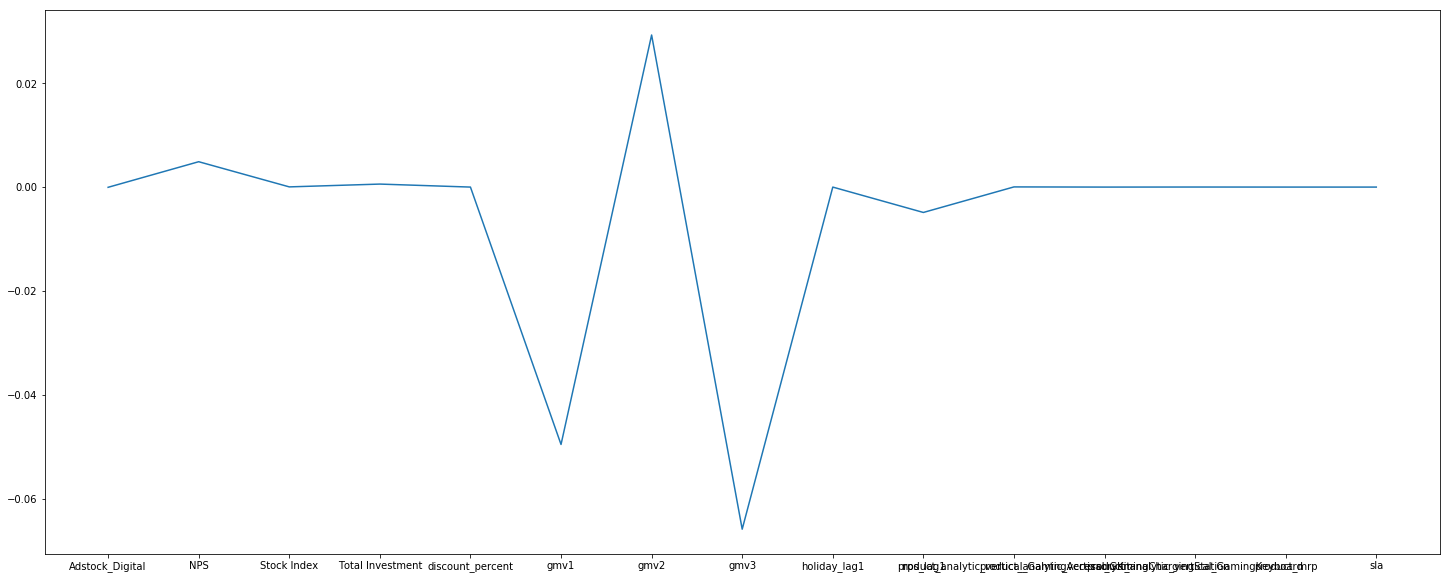

In [598]:
import matplotlib.pylab as plt
fig = plt.figure(figsize=(25,10))
lists = sorted(elast_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x,y)
plt.show()

In [599]:
#Prediction
x_cv2 = x_cv.loc[:,['discount_percent', 'sla', 'product_mrp', 'NPS', 'Stock Index', 'Adstock_Digital', 'Total Investment', 'nps_lag1', 'holiday_lag1', 'product_analytic_vertical_GamingAccessoryKit', 'product_analytic_vertical_GamingKeyboard', 'product_analytic_vertical_GamingChargingStation','gmv1', 'gmv2', 'gmv3']]
y_pred = results.predict(x_cv2)

In [600]:
#RMSE and MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_cv, y_pred)
rmse = sqrt(mean_squared_error(y_cv, y_pred))
print(mse)
print(rmse)

0.1659642157570504
0.4073870588973714


In [601]:
#r2-score
from sklearn.metrics import r2_score
r2_score(y_cv, y_pred)

0.8831219999593378

### Distributed lag model for Audio

In [836]:
#Calculating lag
ConsumerAudio_weekly_lag['gmv1']=ConsumerAudio_weekly_lag['gmv'].shift(-1)
ConsumerAudio_weekly_lag['gmv2']=ConsumerAudio_weekly_lag['gmv'].shift(-2)
ConsumerAudio_weekly_lag['gmv3']=ConsumerAudio_weekly_lag['gmv'].shift(-3)
ConsumerAudio_weekly_lag=ConsumerAudio_weekly_lag.fillna(0)

names = ConsumerAudio_weekly_lag.columns
scalar = StandardScaler()
scaled_df = scalar.fit_transform(ConsumerAudio_weekly_lag)
scaled_df = pd.DataFrame(scaled_df,columns = names)
X = scaled_df.drop(columns=['gmv'])


In [837]:
#splitting and calculating the best features
x_train,x_cv,y_train,y_cv = train_test_split(X,scaled_df.gmv)
#result
result = stepwise_selection(x_train,y_train)
print(result)

product_analytic_vertical_Filter 3.863744479570302e-08
Stock Index 0.9988468230323522
Adstock_TV 0.9348098425358202
NPS 0.7712766319272303
discount 0.7479540820896948
nps_lag1 0.7274340958200496
Adstock_Digital 0.32573283418266286
Total Investment 0.46795498825163895
holiday_lag2 0.10534330570785846
['units', 'discount_percent', 'sla', 'product_mrp', 'holiday', 'moving_avg_2', 'moving_avg_3', 'nps_lag2', 'holiday_lag1', 'product_analytic_vertical_Filter']


In [851]:
#Building model
x_train1=x_train.loc[:,['units', 'discount', 'discount_percent', 'sla', 'product_mrp', 'NPS', 'Adstock_TV', 'holiday', 'moving_avg_2', 'nps_lag2', 'holiday_lag1', 'holiday_lag2', 'product_analytic_vertical_CameraRemoteControl', 'listing_price','gmv1', 'gmv2', 'gmv3']]
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     72.83
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.49e-15
Time:                        21:15:10   Log-Likelihood:                 21.330
No. Observations:                  38   AIC:                            -10.66
Df Residuals:                      22   BIC:                             15.54
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [843]:
##Calculating elasticity for recommendation
coeff = dict(results.params)
mean_dict = {}
mean_list = ['units','discount','discount_percent','sla','product_mrp','NPS','Adstock_TV','holiday', 'moving_avg_2', 'nps_lag2', 'holiday_lag1', 'holiday_lag2','listing_price']
for each in mean_list:
    mean_dict[each] = ConsumerGaming_weekly_lag[each].mean()

In [844]:
elast_dict = {}
for each in coeff.keys():
    if each in mean_dict.keys():
        m = mean_dict[each]
    c = coeff[each]
    elasticity_cal = (c * m)/mean_gmv
    elast_dict[each] = elasticity_cal

In [849]:
elast_dict

{'units': -1.0782743780292311e-05,
 'discount': -0.00014644737956349773,
 'discount_percent': 1.357879529346697e-05,
 'sla': 1.0019755272709347e-06,
 'product_mrp': 0.0001279253515049476,
 'NPS': -0.0007001384101760133,
 'Adstock_TV': 2.2536751743200166e-05,
 'holiday': 0.0002951263858333854,
 'moving_avg_2': 1.0784864907464029e-05,
 'nps_lag2': 0.000703865865773401,
 'holiday_lag1': -9.801103746940879e-08,
 'holiday_lag2': 5.5494299270499436e-08,
 'product_analytic_vertical_CameraRemoteControl': 3.321443911588405e-08,
 'listing_price': 0.00015484331192684868,
 'gmv1': 5.675136620090472e-06,
 'gmv2': 1.9494006703719245e-05,
 'gmv3': 2.670387757234513e-05}

In [846]:
#Prediction
x_cv2 = x_cv.loc[:,['units', 'discount', 'discount_percent', 'sla', 'product_mrp', 'NPS', 'Adstock_TV', 'holiday', 'moving_avg_2', 'nps_lag2', 'holiday_lag1', 'holiday_lag2', 'listing_price','product_analytic_vertical_CameraRemoteControl','gmv1', 'gmv2', 'gmv3']]
y_pred = results.predict(x_cv2)

In [847]:
#RMSE and MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_cv, y_pred)
rmse = sqrt(mean_squared_error(y_cv, y_pred))
print(mse)
print(rmse)

0.6769927552875935
0.8227956947429863


In [848]:
#r2-score
from sklearn.metrics import r2_score
r2_score(y_cv, y_pred)

0.2501010401385637

### Distributed lag model for Camera

In [909]:
#Calculating lag
Consumercamera_weekly_lag['gmv1']=Consumercamera_weekly_lag['gmv'].shift(-1)
Consumercamera_weekly_lag['gmv2']=Consumercamera_weekly_lag['gmv'].shift(-2)
Consumercamera_weekly_lag['gmv3']=Consumercamera_weekly_lag['gmv'].shift(-3)
Consumercamera_weekly_lag=Consumercamera_weekly_lag.fillna(0)

names = Consumercamera_weekly_lag.columns
scalar = StandardScaler()
scaled_df = scalar.fit_transform(Consumercamera_weekly_lag)
scaled_df = pd.DataFrame(scaled_df,columns = names)
X = scaled_df.drop(columns=['gmv'])


In [910]:
#splitting and calculating the best features
x_train,x_cv,y_train,y_cv = train_test_split(X,scaled_df.gmv)
#result
result = stepwise_selection(x_train,y_train)
print(result)

product_analytic_vertical_Filter 1.6465866745832983e-05
Stock Index 0.9705814385250868
discount 0.6796421682829374
Adstock_TV 0.21862337748950839
Total Investment 0.14365369931298286
Adstock_Digital 0.21852479484700565
holiday_lag2 0.12014614701408101
['units', 'discount_percent', 'sla', 'product_mrp', 'NPS', 'holiday', 'moving_avg_2', 'moving_avg_3', 'nps_lag1', 'nps_lag2', 'holiday_lag1', 'product_analytic_vertical_Filter']


In [911]:
#Building model
x_train1=x_train.loc[:,['units', 'discount_percent', 'sla', 'NPS', 'holiday', 'moving_avg_2', 'moving_avg_3', 'nps_lag1', 'holiday_lag1', 'holiday_lag2', 'product_analytic_vertical_Filter', 'product_analytic_vertical_CameraBattery', 'listing_price','gmv1', 'gmv2', 'gmv3']]
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     71.87
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.88e-15
Time:                        21:20:16   Log-Likelihood:                 22.295
No. Observations:                  38   AIC:                            -12.59
Df Residuals:                      22   BIC:                             13.61
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [912]:
#Calculating elasticity for recommendation
coeff = dict(results.params)
mean_dict = {}
mean_list = ['units', 'discount_percent', 'sla', 'NPS', 'holiday', 'moving_avg_2', 'moving_avg_3', 'nps_lag1', 'holiday_lag1', 'holiday_lag2', 'listing_price']
for each in mean_list:
    mean_dict[each] = ConsumerGaming_weekly_lag[each].mean()

In [913]:
elast_dict = {}
for each in coeff.keys():
    if each in mean_dict.keys():
        m = mean_dict[each]
    c = coeff[each]
    elasticity_cal = (c * m)/mean_gmv
    elast_dict[each] = elasticity_cal

In [914]:
elast_dict

{'units': -0.001553501010330698,
 'discount_percent': 4.205456963955068e-06,
 'sla': 2.9384394549327457e-07,
 'NPS': -0.0005539760239064583,
 'holiday': 0.00019685550987836006,
 'moving_avg_2': 0.006199737991217101,
 'moving_avg_3': -0.004646285884285589,
 'nps_lag1': 0.0005554586080459198,
 'holiday_lag1': -4.121589958062321e-08,
 'holiday_lag2': 1.3161682455675514e-08,
 'product_analytic_vertical_Filter': 3.277516247454549e-08,
 'product_analytic_vertical_CameraBattery': 1.0071539138732328e-08,
 'listing_price': 6.272228559816141e-05,
 'gmv1': -9.752835102769306e-06,
 'gmv2': 1.135691384310757e-05,
 'gmv3': 5.454147410279351e-06}

In [915]:
#Prediction
x_cv2 = x_cv.loc[:,['units', 'discount_percent', 'sla', 'NPS', 'holiday', 'moving_avg_2', 'moving_avg_3', 'nps_lag1', 'holiday_lag1', 'holiday_lag2', 'product_analytic_vertical_Filter', 'product_analytic_vertical_CameraBattery', 'listing_price','gmv1', 'gmv2', 'gmv3']]
y_pred = results.predict(x_cv2)

In [916]:
#RMSE and MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_cv, y_pred)
rmse = sqrt(mean_squared_error(y_cv, y_pred))
print(mse)
print(rmse)

0.349809626852152
0.5914470617495297


In [917]:
#r2-score
from sklearn.metrics import r2_score
r2_score(y_cv, y_pred)

0.6810296676060226

## CONCLUSIONS AND RECOMMENDATIONS

From the above study, we can draw a few conclusions and make some recommendations to the business
1. On the whole the Distributed lag model, performs better in comparison to the other three models used in this study
This is closely followed by the Basic Linear model
2. We also observe that the multiplicative model does not perform well in comparison with the other three models
3We consider a good model to have low MSE value and good R squared value and a high R 2 score( 1 RSS/TSS)

RECOMMENDATIONS :
1. For Gaming subcategory, NPS score and total investment have strong positive impact on the revenue and on the
other hand, we see that Adstock_Digital has a negative impact on the revenue and our recommendation would be to
invest the money spent on advertising on digital platforms into other channels
2. For Camera subcategory, we see that discount,NPS and holiday have a positive impact on revenue and we also see
that holiday_lag and sla have a negative impact Our recommendation would be to not invest in these segments
3. For Audio subcategory,we see that product_MRP and holiday have the strongest positive impact on the revenue This
means that customers are most likely to shop products of the audio subcategory during holidays and based on the
product MRP We also see that discount and NPS score have a negative impact on GMV Hence our recommendation
would be to cut down on offering product discounts and instead market the products well during holidays or paydays
to improve sales